In [2]:
pip install -U scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
pip install statsmodels

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import random

In [5]:
df = pd.read_csv('2023-PUDB.csv')

In [6]:
df.head(5).T

0           1           2  \
Year                                   2023        2023        2023   
LoanCharacteristicsID               2749708     2749709     2749710   
Bank                                 Boston      Boston      Boston   
FIPSStateNumericCode                      9           9          44   
FIPSCountyCode                            3           3           1   
CoreBasedStatisticalAreaCode          25540       25540       39300   
CensusTractIdentifier                4901.0      4963.0      309.02   
CensusTractMinorityRatioPercent      30.787      31.863       8.197   
CensusTractMedFamIncomeAmount         87445      128059      131779   
LocalAreaMedianIncomeAmount          106293      106293       94723   
TotalMonthlyIncomeAmount              11042       32499        7992   
HUDMedianIncomeAmount                118700      118700      108300   
LoanAcquisitionActualUPBAmt          360000      345000      409500   
LTVRatioPercent                        80.0        75.0        80.0   
NoteDate                               2023        2023        2023   
LoanAcquisitionDate                    2023        2023        2023   
LoanPurposeType                           1           1           1   
ProductCategoryName                       1           1           1   
MortgageType                              0           0           0   
ScheduledTotalPaymentCount              360         180         360   
LoanAmortizationMaxTermMonths           360         180         360   
MortgageLoanSellerInstType                1           1           1   
BorrowerCount                             2           2           1   
BorrowerFirstTimeHomebuyer                1           0           0   
Borrower1Race1Type                        2           5           5   
Borrower2Race1Type                        2           6           8   
Borrower1SexType                          1           1           2   
Borrower2SexType                          2           2           4   
Borrower1AgeAtApplicationYears           26          36          57   
Borrower2AgeAtApplicationYears           27          32         998   
PropertyUsageType                         1           1           1   
PropertyUnitCount                         1           1           2   
NoteRatePercent                       6.375       6.375       6.125   
NoteAmount                           360000      345000      409500   
HousingExpenseRatioPercent            28.91       13.47       39.69   
TotalDebtExpenseRatioPercent          29.83       28.26       49.38   
Borrower1CreditScoreValue                 4           5           4   
Borrower2CreditScoreValue                 4           5           9   
PMICoveragePercent                      0.0         0.0         0.0   
EmploymentBorrowerSelfEmployed            0           0           1   
PropertyType                           PT01        PT07        PT04   
IndexSourceType                          99          99          99   
MarginRatePercent                      9999        9999        9999   
PrepaymentPenaltyExpirationDate  12/31/9999  12/31/9999  12/31/9999   
Borrower1EthnicityType                    2           2           2   
Borrower1Race2Type                        7           7           7   
Borrower1Race3Type                        7           7           7   
Borrower1Race4Type                        7           7           7   
Borrower1Race5Type                        7           7           7   
Borrower2EthnicityType                    2           3           5   
Borrower2Race2Type                        7           7           8   
Borrower2Race3Type                        7           7           8   
Borrower2Race4Type                        7           7           8   
Borrower2Race5Type                        7           7           8   
HOEPALoanStatusType                       2           2           2   
LienPriorityType                          1           1           

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34273 entries, 0 to 34272
Data columns (total 56 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Year                             34273 non-null  int64  
 1   LoanCharacteristicsID            34273 non-null  int64  
 2   Bank                             34273 non-null  object 
 3   FIPSStateNumericCode             34273 non-null  int64  
 4   FIPSCountyCode                   34273 non-null  int64  
 5   CoreBasedStatisticalAreaCode     34273 non-null  int64  
 6   CensusTractIdentifier            34273 non-null  float64
 7   CensusTractMinorityRatioPercent  34273 non-null  float64
 8   CensusTractMedFamIncomeAmount    34273 non-null  int64  
 9   LocalAreaMedianIncomeAmount      34273 non-null  int64  
 10  TotalMonthlyIncomeAmount         34273 non-null  int64  
 11  HUDMedianIncomeAmount            34273 non-null  int64  
 12  LoanAcquisitionAct

In [8]:
df.describe().T

count          mean            std  \
Year                             34273.0  2.023000e+03       0.000000   
LoanCharacteristicsID            34273.0  2.771294e+06   16056.741181   
FIPSStateNumericCode             34273.0  3.079558e+01      14.344956   
FIPSCountyCode                   34273.0  9.431722e+01      87.450196   
CoreBasedStatisticalAreaCode     34273.0  3.834461e+04   26977.738168   
CensusTractIdentifier            34273.0  2.861779e+03    3814.961322   
CensusTractMinorityRatioPercent  34273.0  2.097108e+01      17.082932   
CensusTractMedFamIncomeAmount    34273.0  9.662512e+04   34693.929393   
LocalAreaMedianIncomeAmount      34273.0  8.499761e+04   13048.229243   
TotalMonthlyIncomeAmount         34273.0  1.319576e+04   13676.245661   
HUDMedianIncomeAmount            34273.0  9.621413e+04   14716.786842   
LoanAcquisitionActualUPBAmt      34273.0  3.040125e+05  156099.301202   
LTVRatioPercent                  34273.0  7.608370e+01      17.193833   
NoteDate                         34273.0  2.022966e+03       0.268882   
LoanAcquisitionDate              34273.0  2.023000e+03       0.000000   
LoanPurposeType                  34273.0  1.630992e+00       1.555653   
ProductCategoryName              34273.0  1.000000e+00       0.000000   
MortgageType                     34273.0  5.826744e-02       0.365190   
ScheduledTotalPaymentCount       34273.0  3.481944e+02      42.919091   
LoanAmortizationMaxTermMonths    34273.0  3.481944e+02      42.919091   
MortgageLoanSellerInstType       34273.0  1.006302e+00       0.224456   
BorrowerCount                    34273.0  1.602136e+00       0.521277   
BorrowerFirstTimeHomebuyer       34273.0  2.459954e-01       0.430682   
Borrower1Race1Type               34273.0  4.910104e+00       0.779494   
Borrower2Race1Type               34273.0  6.208065e+00       1.601831   
Borrower1SexType                 34273.0  1.419426e+00       0.586669   
Borrower2SexType                 34273.0  2.679077e+00       1.181616   
Borrower1AgeAtApplicationYears   34273.0  4.244017e+01      13.773755   
Borrower2AgeAtApplicationYears   34273.0  4.360219e+02     470.470710   
PropertyUsageType                34273.0  1.096402e+00       0.295147   
PropertyUnitCount                34273.0  1.007965e+00       0.106514   
NoteRatePercent                  34273.0  6.647186e+00       0.597269   
NoteAmount                       34273.0  3.043295e+05  156107.385560   
HousingExpenseRatioPercent       34273.0  2.306859e+01       9.129493   
TotalDebtExpenseRatioPercent     34273.0  3.387826e+01       9.320720   
Borrower1CreditScoreValue        34273.0  4.477694e+00       0.801369   
Borrower2CreditScoreValue        34273.0  6.379628e+00       2.277081   
PMICoveragePercent               34273.0  7.721698e+00      12.156411   
EmploymentBorrowerSelfEmployed   34273.0  1.236250e-01       0.329158   
IndexSourceType                  34273.0  9.900000e+01       0.000000   
MarginRatePercent                34273.0  8.514014e+03    3555.778029   
Borrower1EthnicityType           34273.0  2.039302e+00       0.390123   
Borrower1Race2Type               34273.0  6.923847e+00       0.306007   
Borrower1Race3Type               34273.0  6.939632e+00       0.239393   
Borrower1Race4Type               34273.0  6.940215e+00       0.237091   
Borrower1Race5Type               34273.0  6.940215e+00       0.237091   
Borrower2EthnicityType           34273.0  3.269075e+00       1.479164   
Borrower2Race2Type               34273.0  7.368599e+00       0.577969   
Borrower2Race3Type               34273.0  7.377440e+00       0.551911   
Borrower2Race4Type               34273.0  7.377673e+00       0.551116   
Borrower2Race5Type               34273.0  7.377761e+00       0.550818   
HOEPALoanStatusType              34273.0  2.024538e+00       0.155092   
LienPriorityType                 34273.0  1.000000e+00       0.000000   

                                       min          25%          50%  \
Year                

In [9]:
for col in df.columns:
    print(f"Column '{col}': {df[col].nunique()} unique values")

Column 'Year': 1 unique values
Column 'LoanCharacteristicsID': 34273 unique values
Column 'Bank': 9 unique values
Column 'FIPSStateNumericCode': 52 unique values
Column 'FIPSCountyCode': 221 unique values
Column 'CoreBasedStatisticalAreaCode': 753 unique values
Column 'CensusTractIdentifier': 8746 unique values
Column 'CensusTractMinorityRatioPercent': 13722 unique values
Column 'CensusTractMedFamIncomeAmount': 14149 unique values
Column 'LocalAreaMedianIncomeAmount': 1256 unique values
Column 'TotalMonthlyIncomeAmount': 16845 unique values
Column 'HUDMedianIncomeAmount': 480 unique values
Column 'LoanAcquisitionActualUPBAmt': 9949 unique values
Column 'LTVRatioPercent': 493 unique values
Column 'NoteDate': 11 unique values
Column 'LoanAcquisitionDate': 1 unique values
Column 'LoanPurposeType': 3 unique values
Column 'ProductCategoryName': 1 unique values
Column 'MortgageType': 4 unique values
Column 'ScheduledTotalPaymentCount': 17 unique values
Column 'LoanAmortizationMaxTermMonths':

In [10]:
counts = df['Bank'].value_counts(normalize=True)*100
print(counts)

Bank
Chicago         24.666647
Des Moines      22.948093
Indianapolis    14.851341
Topeka          12.344995
Dallas           9.447670
Cincinnati       5.663350
Pittsburgh       4.116943
Boston           3.807662
New York         2.153299
Name: proportion, dtype: float64


In [11]:
counts = df['MarginRatePercent'].value_counts(normalize=True)*100
print(counts)

MarginRatePercent
9999    85.148659
0       14.851341
Name: proportion, dtype: float64


In [12]:
counts = df['NoteDate'].value_counts(normalize=True)*100
print(counts)

NoteDate
2023    97.190208
2022     2.561783
2021     0.128381
2020     0.078779
2013     0.017506
2016     0.008753
2011     0.002918
2010     0.002918
2015     0.002918
2014     0.002918
2019     0.002918
Name: proportion, dtype: float64


In [13]:
df.agg(['count','size','unique'])

Year                              LoanCharacteristicsID  \
count    34273                                              34273   
size     34273                                              34273   
unique  [2023]  [2749708, 2749709, 2749710, 2749711, 2749712, ...   

                                                     Bank  \
count                                               34273   
size                                                34273   
unique  [Boston, Chicago, Cincinnati, Dallas, Des Moin...   

                                     FIPSStateNumericCode  \
count                                               34273   
size                                                34273   
unique  [9, 44, 33, 25, 50, 23, 51, 12, 48, 17, 45, 39...   

                                           FIPSCountyCode  \
count                                               34273   
size                                                34273   
unique  [3, 1, 5, 17, 11, 25, 23, 9, 21, 7, 510, 19, 1...   

                             CoreBasedStatisticalAreaCode  \
count                                               34273   
size                                                34273   
unique  [25540, 39300, 28300, 14460, 15540, 12700, 388...   

                                    CensusTractIdentifier  \
count                                               34273   
size                                                34273   
unique  [4901.0, 4963.0, 309.02, 9704.01, 3563.0, 101....   

                          CensusTractMinorityRatioPercent  \
count                                               34273   
size                                                34273   
unique  [30.787, 31.863, 8.197, 8.824, 32.652, 10.196,...   

                            CensusTractMedFamIncomeAmount  \
count                                               34273   
size                                                34273   
unique  [87445, 128059, 131779, 89571, 97813, 69261, 1...   

                              LocalAreaMedianIncomeAmount  ...  \
count                                               34273  ...   
size                                                34273  ...   
unique  [106293, 94723, 91843, 123334, 100684, 107577,...  ...   

       Borrower1Race3Type Borrower1Race4Type Borrower1Race5Type  \
count               34273              34273              34273   
size                34273              34273              34273   
unique          [7, 5, 6]             [7, 6]             [7, 6]   

       Borrower2EthnicityType        Borrower2Race2Type  Borrower2Race3Type  \
count                   34273                     34273               34273   
size                    34273                     34273               34273   
unique        [2, 3, 5, 1, 4]  [7, 8, 5, 3, 2, 6, 1, 4]  [7, 8, 4, 5, 6, 3]   

       Borrower2Race4Type Borrower2Race5Type HOEPALoanStatusType  \
count               34273              34273               34273   
size                34273              34273               34273   
unique       [7, 8, 6, 4]          [7, 8, 6]           [2, 3, 1]   

       LienPriorityType  
count             34273  
size              34273  
unique              [1]  

[3 rows x 56 columns]

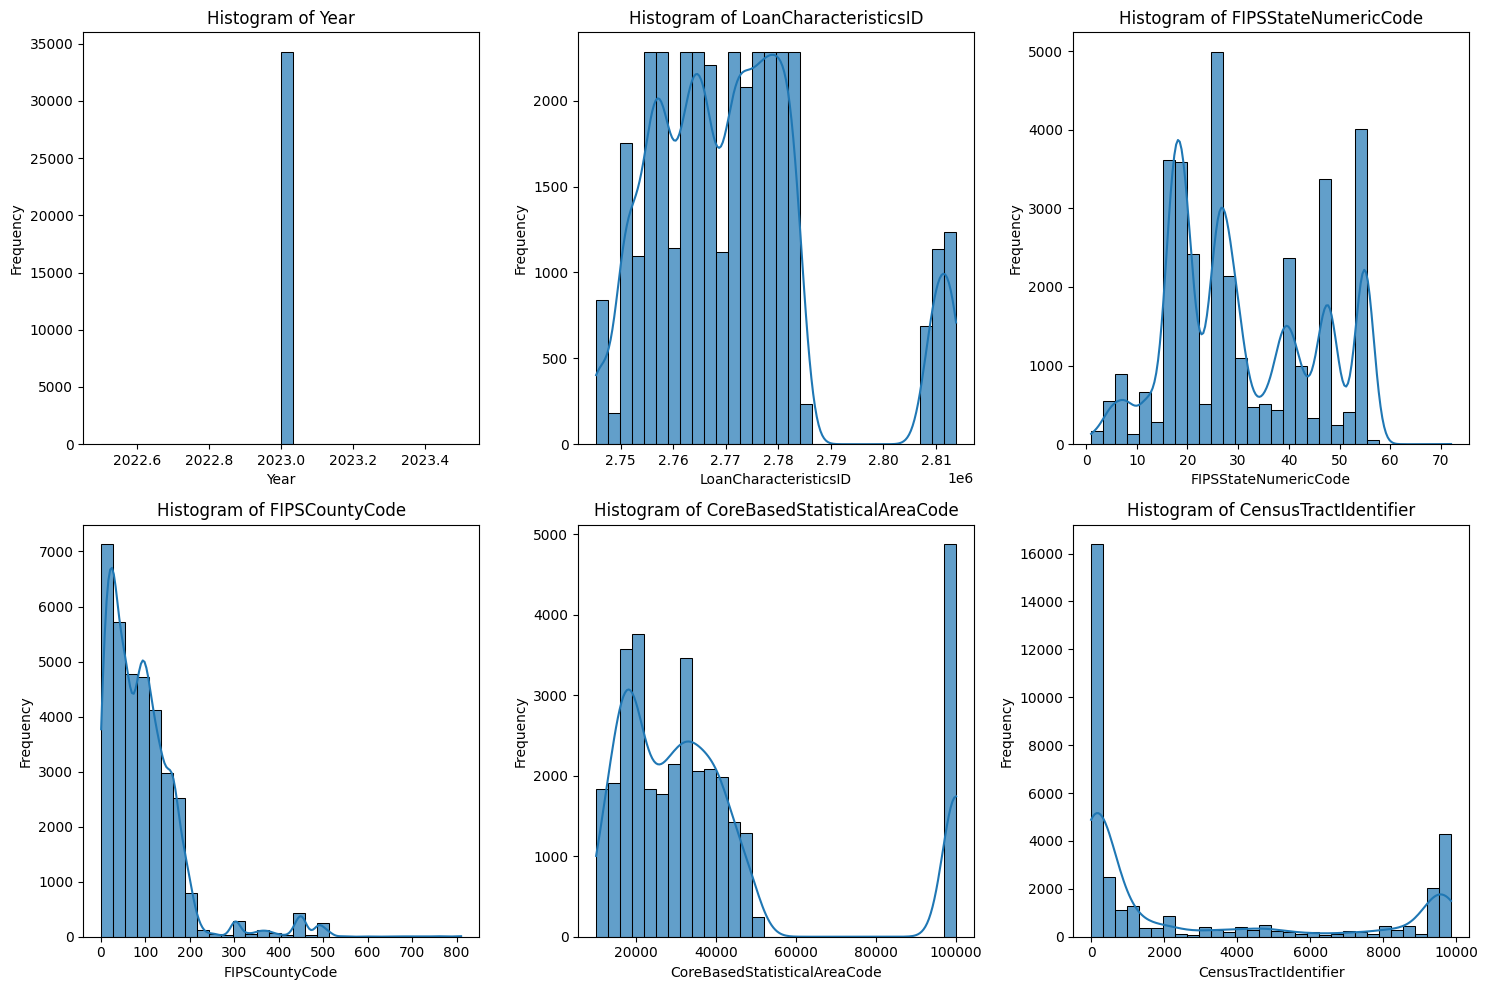

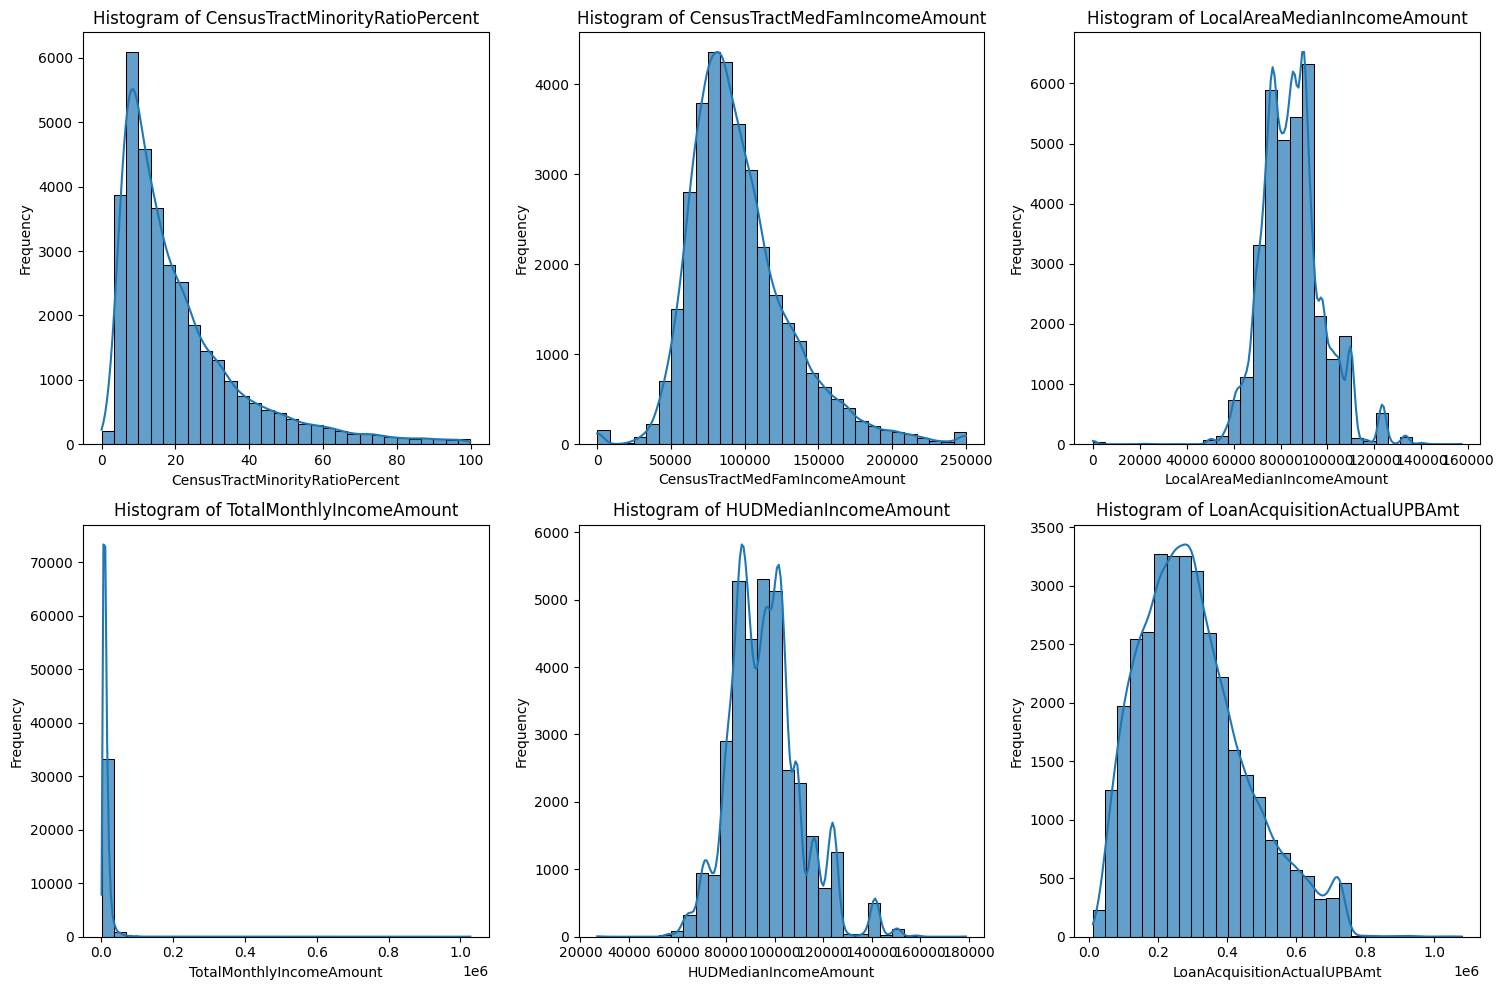

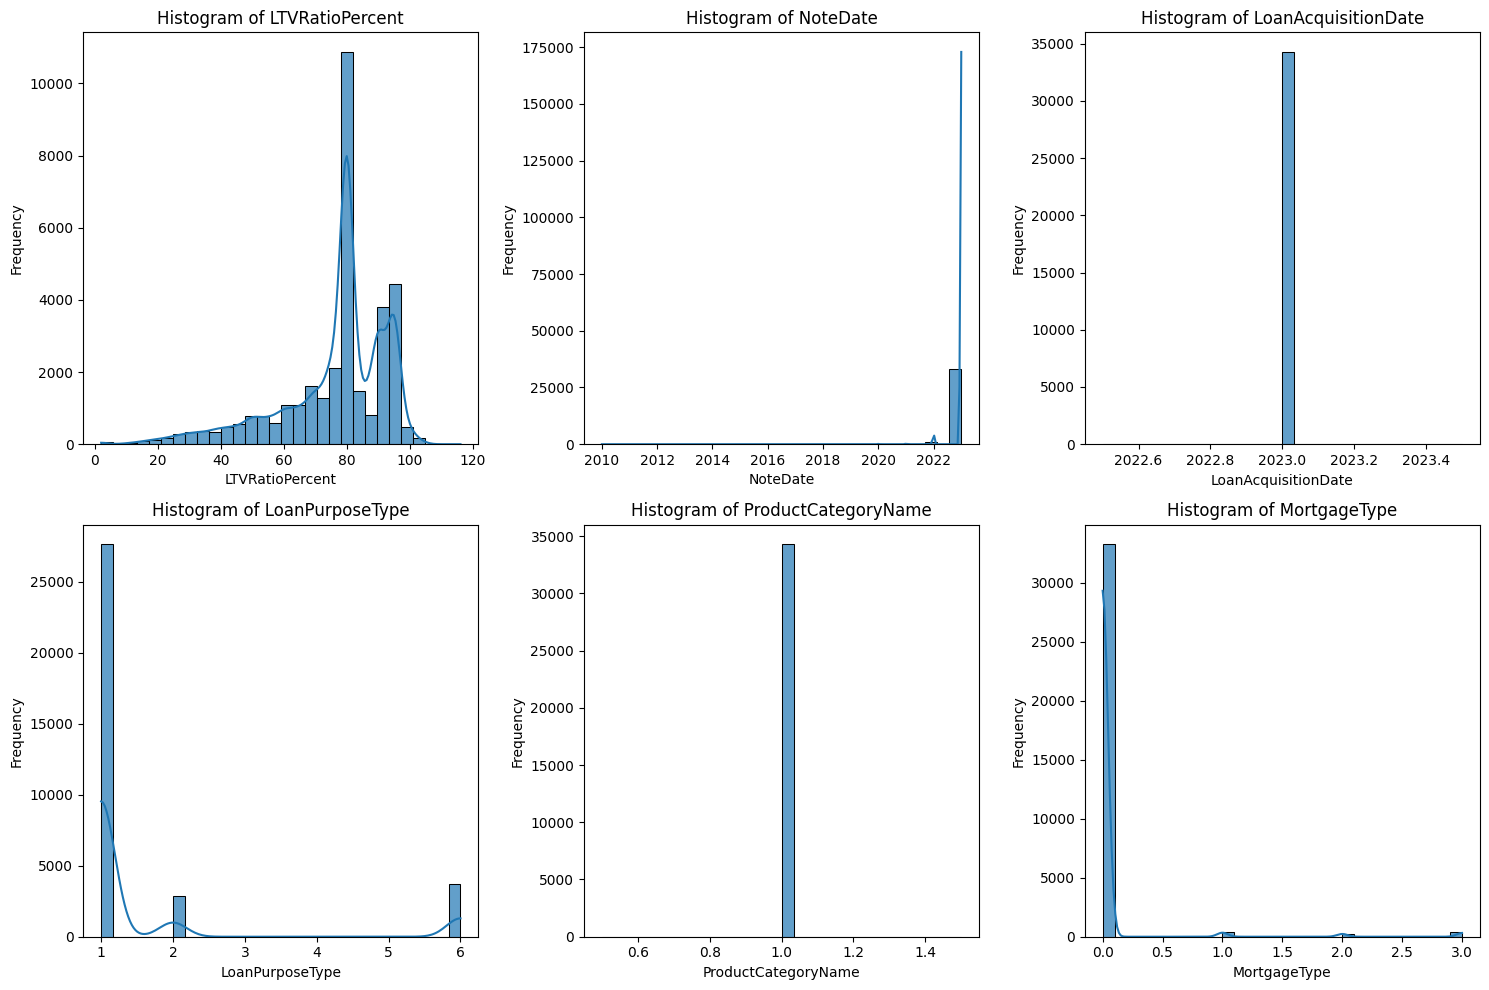

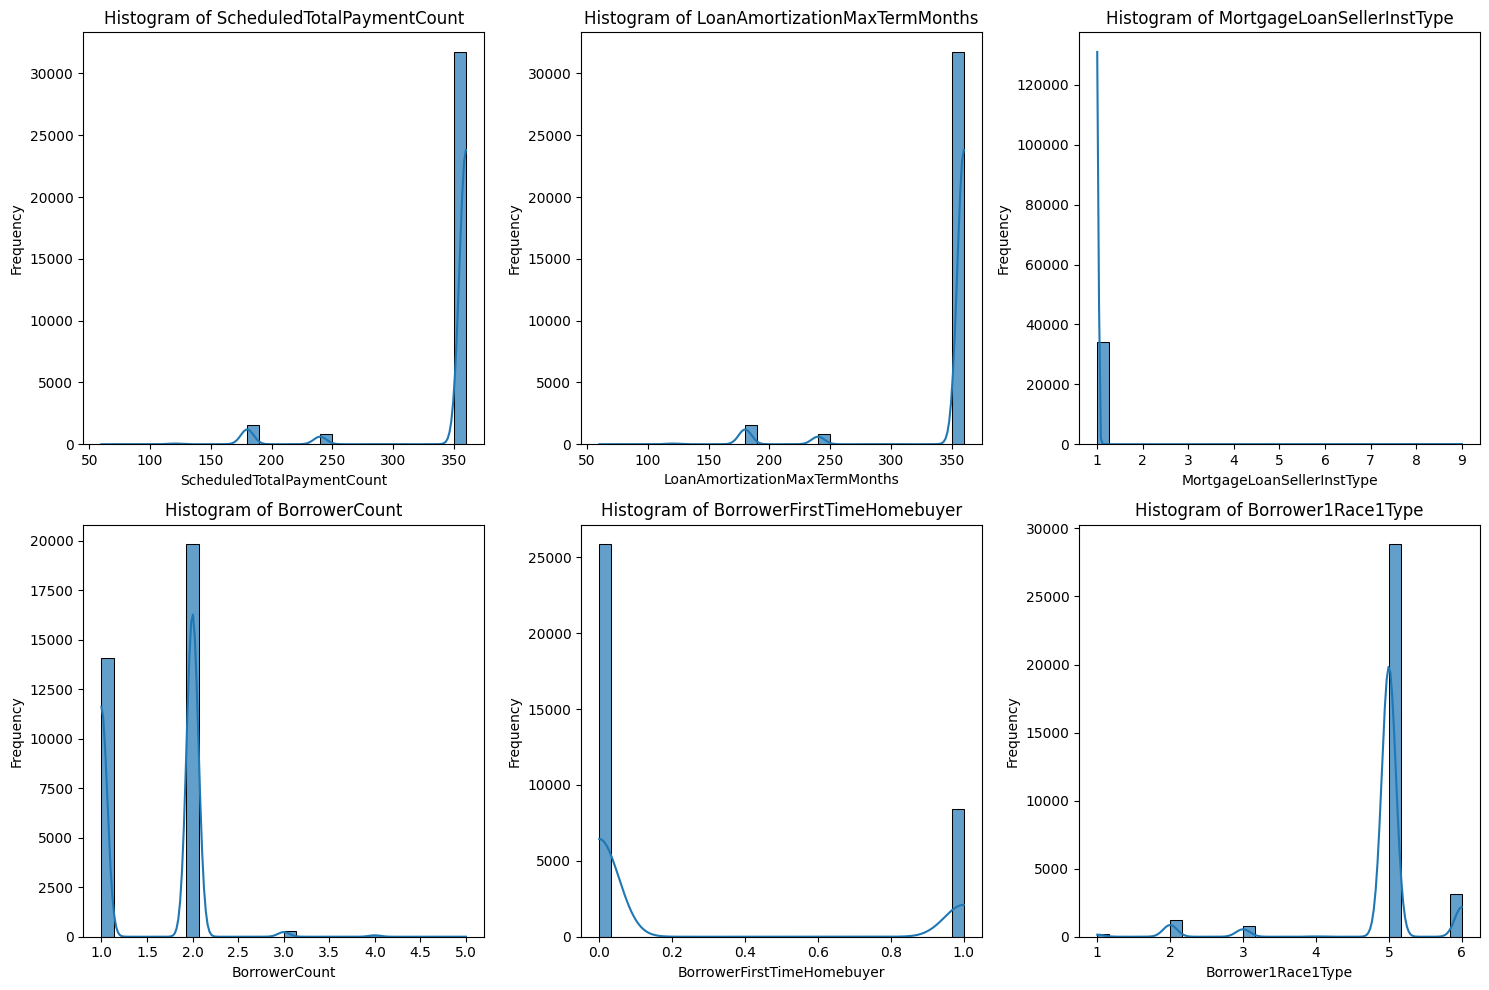

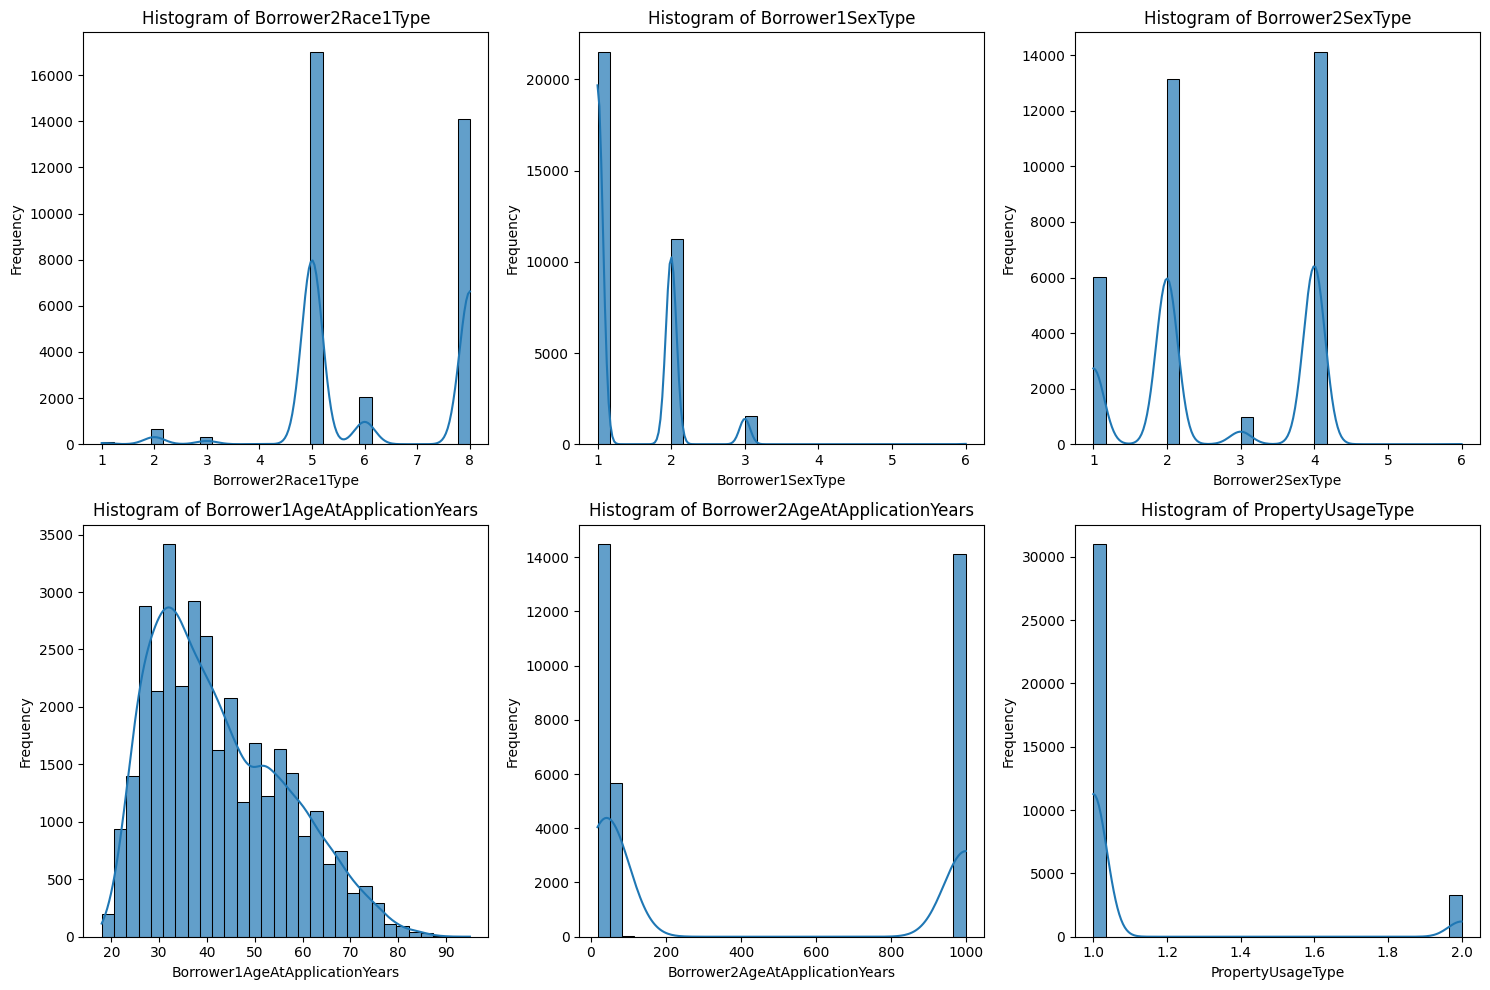

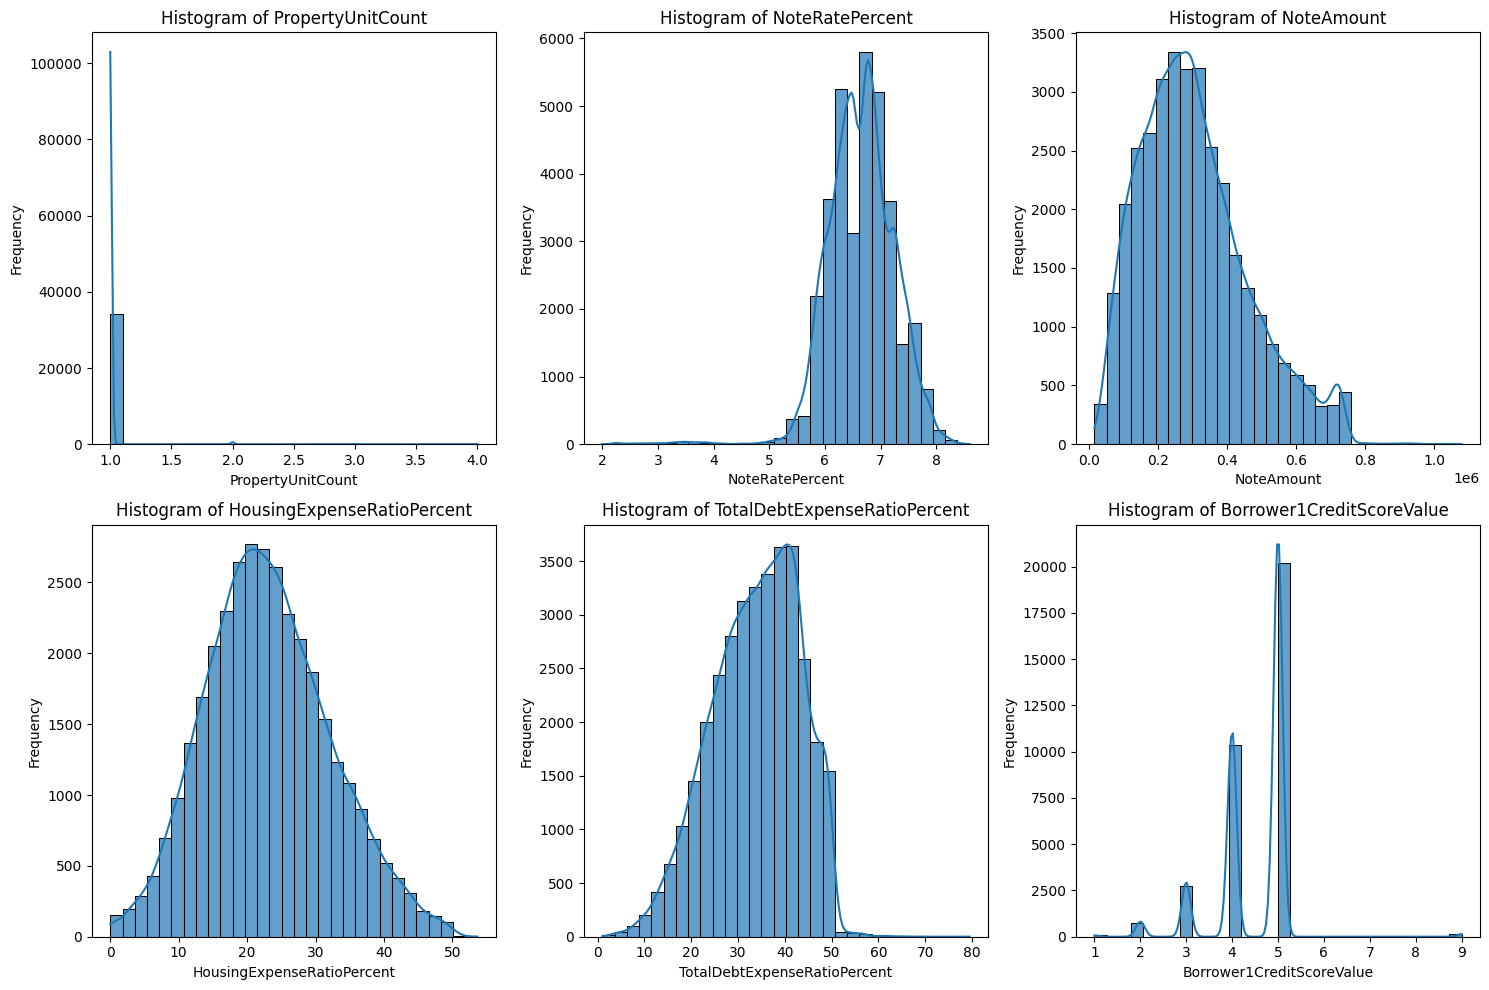

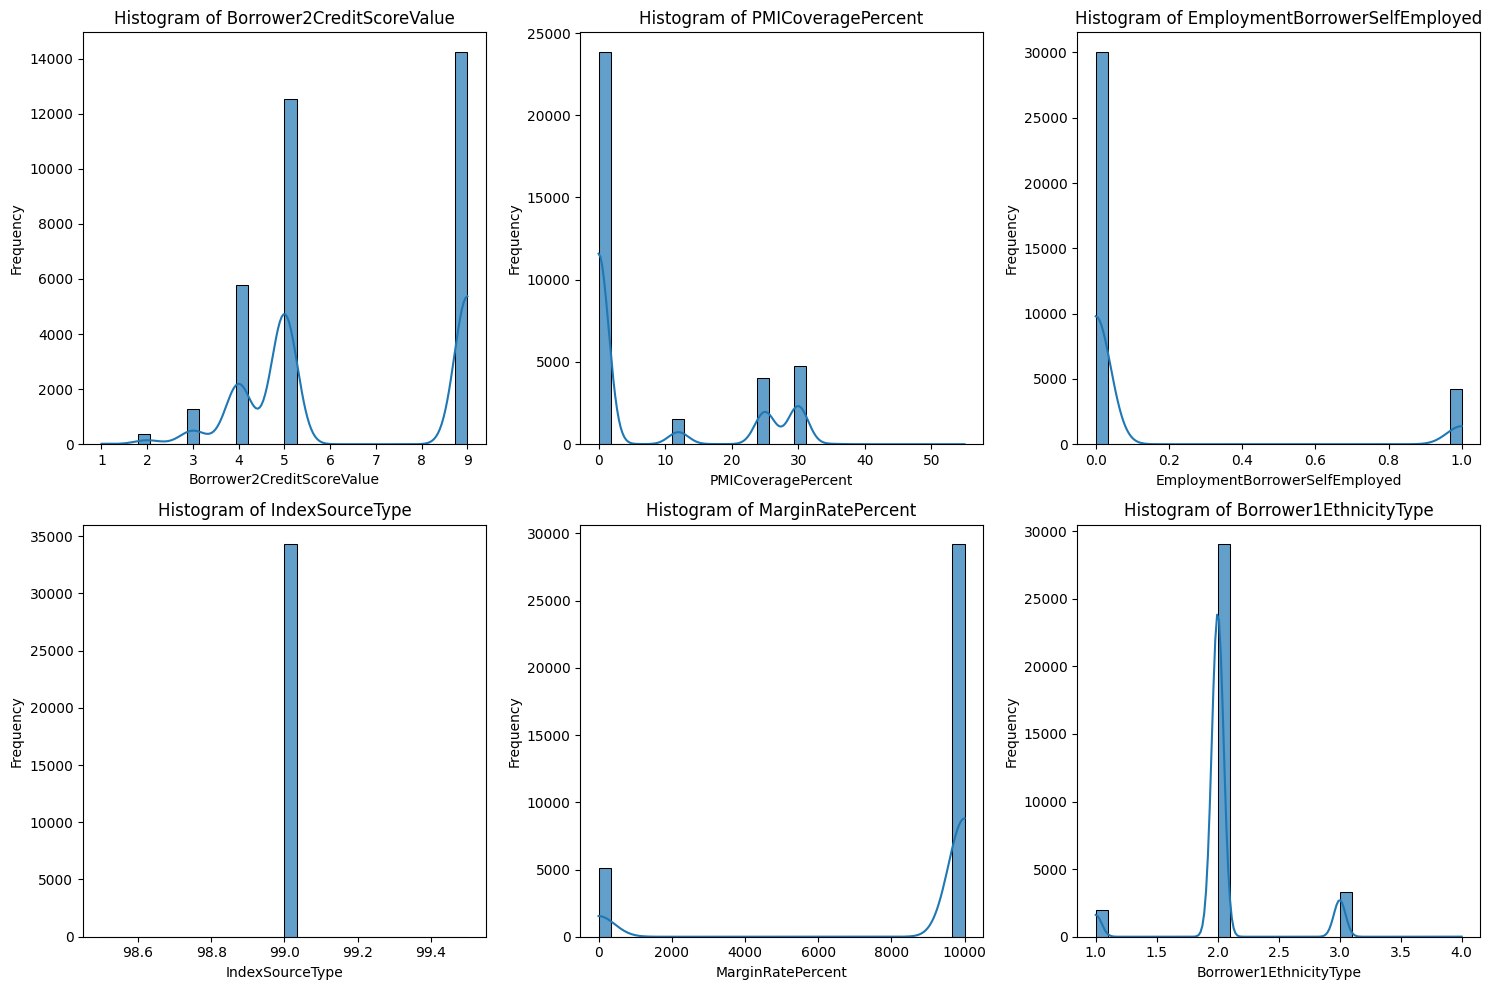

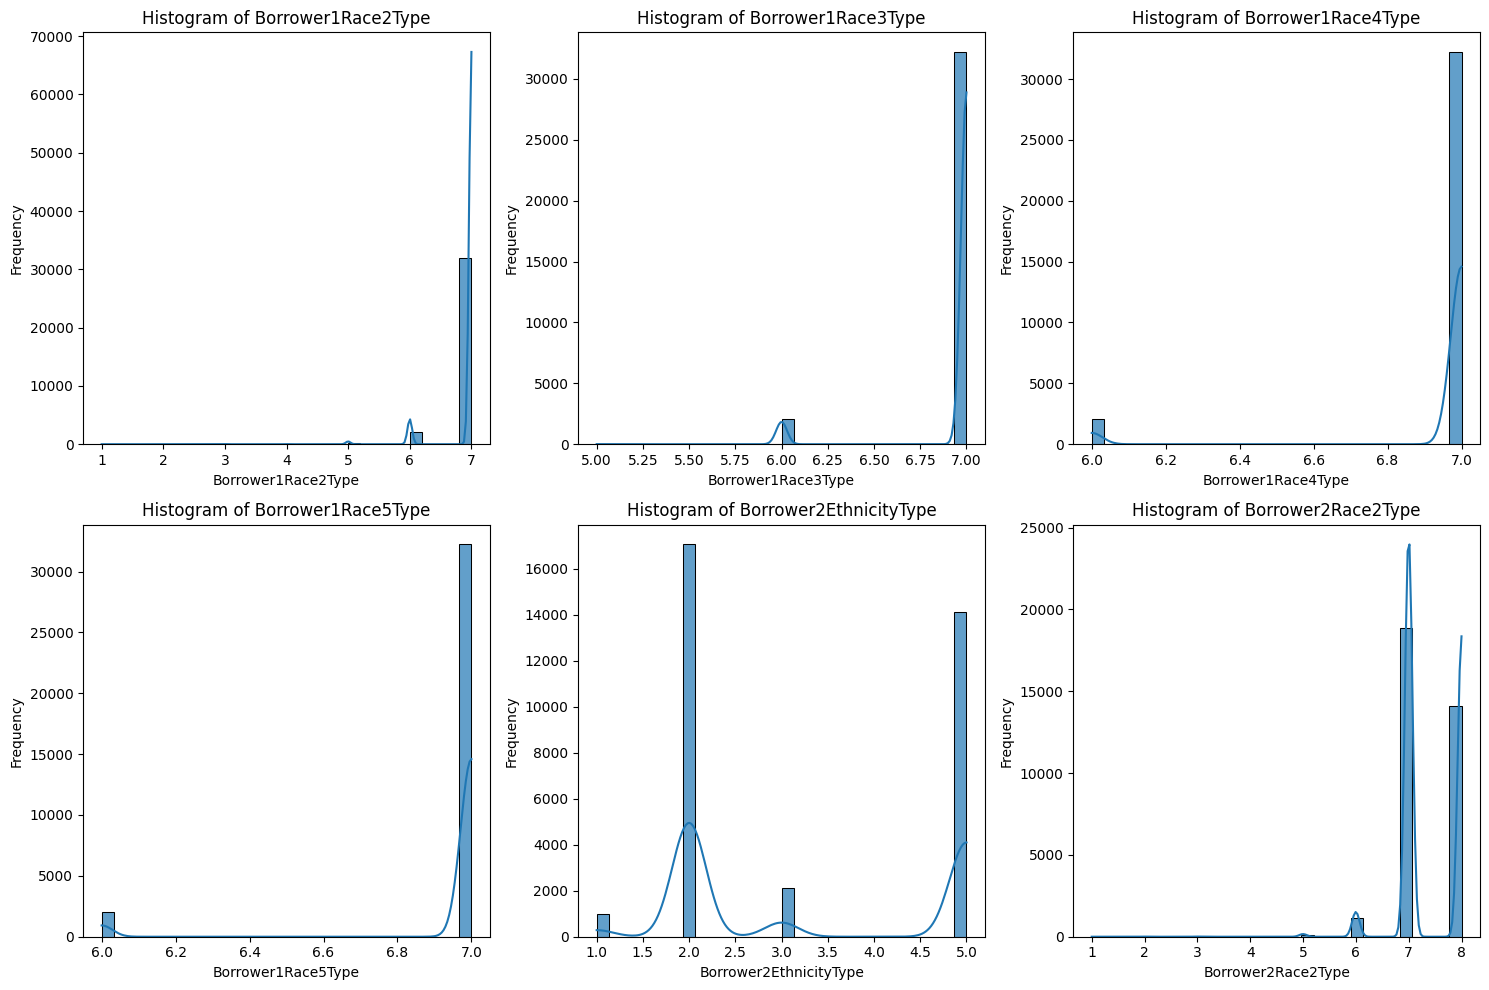

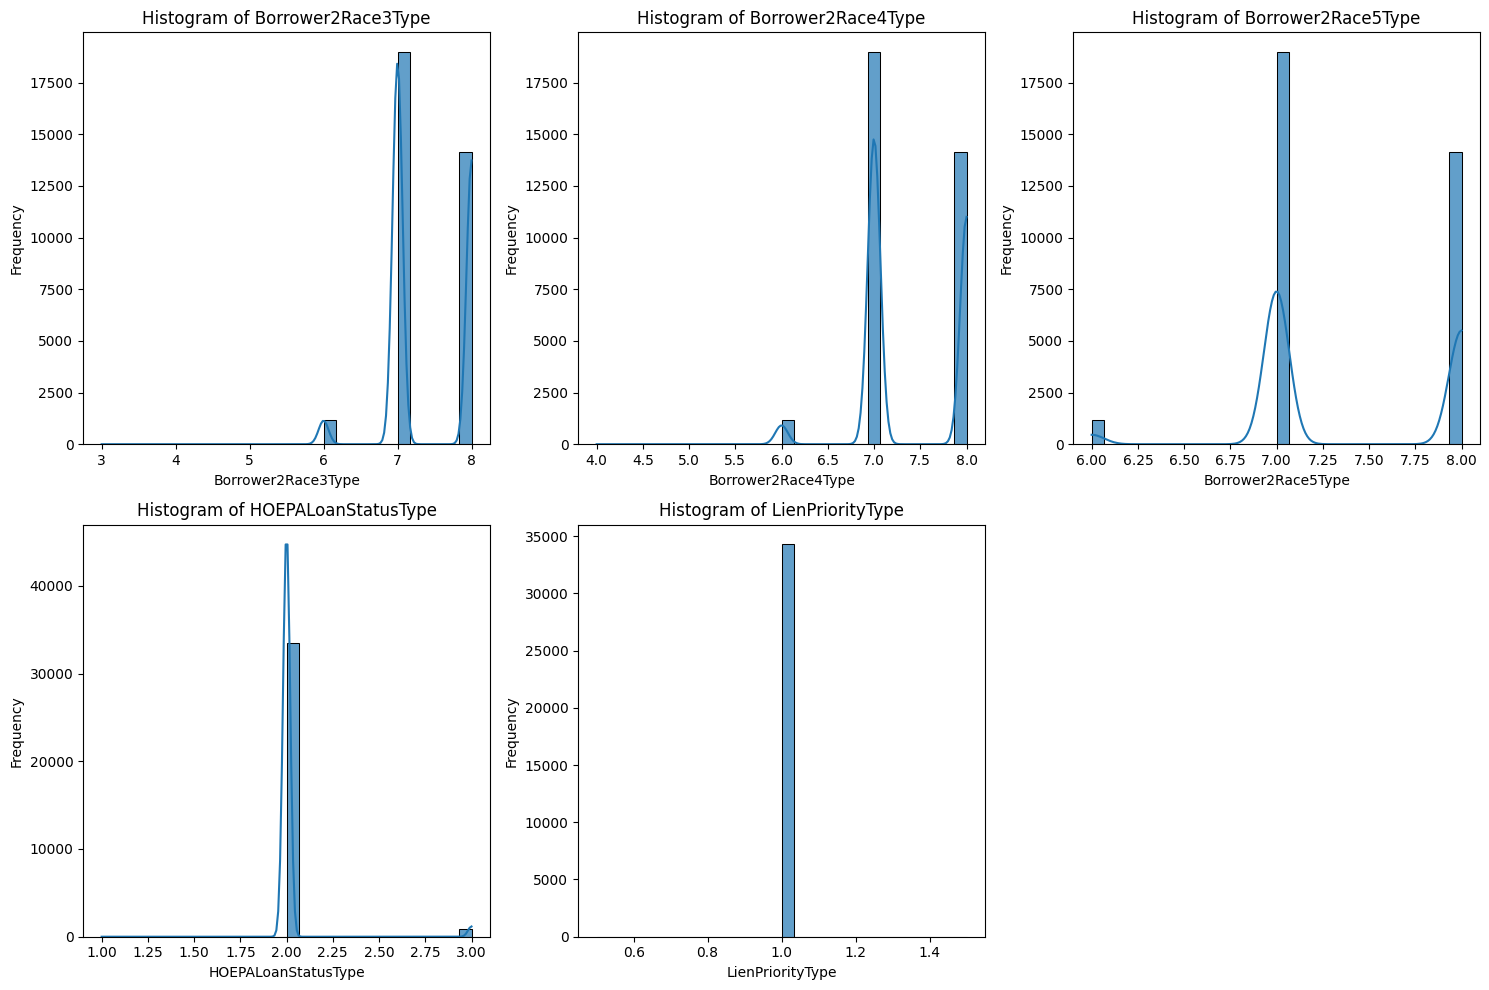

In [14]:
# Select only numeric columns for histogram plotting
numeric_cols = df.select_dtypes(include=[np.number])

# Function to plot histograms in batches
def plot_histograms_in_batches(data, batch_size=6):
    num_batches = (len(data.columns) // batch_size) + 1

    for batch in range(num_batches):
        start_idx = batch * batch_size
        end_idx = min(start_idx + batch_size, len(data.columns))
        cols_to_plot = data.columns[start_idx:end_idx]
        
        if len(cols_to_plot) == 0:
            break

        plt.figure(figsize=(15, 10))
        for i, col in enumerate(cols_to_plot):
            plt.subplot(2, 3, i + 1)
            sns.histplot(data[col].dropna(), bins=30, kde=True,edgecolor='black', alpha=0.7)
            plt.title(f"Histogram of {col}")
            plt.xlabel(col)
            plt.ylabel("Frequency")

        plt.tight_layout()
        plt.show()

# Run the function on the dataset
plot_histograms_in_batches(numeric_cols,batch_size=6)

## histogram description (check skewness)

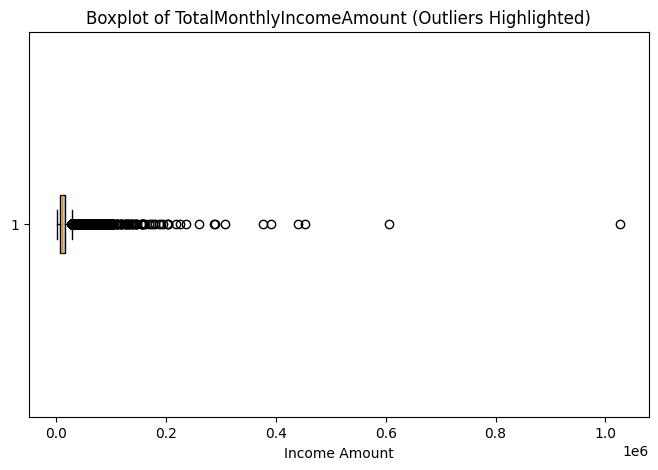

Total Outliers: 216
Outlier Values (First 10): 
410      84471
576     101080
949      86607
1220     77313
1374    105491
1676    225060
2703     99590
2966    156679
3217     72324
3697     76321
Name: TotalMonthlyIncomeAmount, dtype: int64


In [15]:
column_name = "TotalMonthlyIncomeAmount"

if column_name in df.columns:
    data = df[column_name].dropna()
    
    # Calculate Q1, Q3, and IQR
    Q1 = np.percentile(data, 5)
    Q3 = np.percentile(data, 95)
    IQR = Q3 - Q1

    # Define outlier bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = data[(data < lower_bound) | (data > upper_bound)]

    # Plot boxplot
    plt.figure(figsize=(8, 5))
    plt.boxplot(data, vert=False, patch_artist=True, boxprops=dict(facecolor="lightblue"))
    plt.title(f"Boxplot of {column_name} (Outliers Highlighted)")
    plt.xlabel("Income Amount")

    # Show the plot
    plt.show()

    # Print outlier statistics
    print(f"Total Outliers: {len(outliers)}")
    print(f"Outlier Values (First 10): \n{outliers.head(10)}")

else:
    print(f"Column '{column_name}' not found in the dataset.")

### Check duplicates

In [16]:
duplicates = df.duplicated().sum()

print(duplicates)

0


### Dropping colums - 'Year','LoanAcquisitionDate','ProductCategoryName','MortgageLoanSellerInstType','IndexSourceType','MarginRatePercent','PrepaymentPenaltyExpirationDate','LienPriorityType'

In [17]:
df.drop(columns=['Year','LoanAcquisitionDate','ProductCategoryName','MortgageLoanSellerInstType','LoanAmortizationMaxTermMonths','Borrower1Race3Type','Borrower1Race4Type','Borrower1Race5Type'
                 ,'Borrower2Race3Type','Borrower2Race4Type','Borrower2Race5Type','IndexSourceType','MarginRatePercent','PrepaymentPenaltyExpirationDate','LienPriorityType','CoreBasedStatisticalAreaCode'], inplace=True)

In [18]:
len(df.columns) ## 56 to 40

40

In [19]:
# since the columns of borrowerrace type remains similar we decided to drop them 

In [20]:
pd.set_option('display.max_rows',None)
counts = df['Borrower2AgeAtApplicationYears'].value_counts(normalize=True)*100
print(counts)

Borrower2AgeAtApplicationYears
998    41.192776
32      2.188311
30      2.162052
29      2.141628
31      2.135792
33      2.051177
34      2.019082
35      1.887783
28      1.864441
27      1.721472
36      1.709801
37      1.686459
26      1.622268
38      1.558078
39      1.520147
40      1.499723
25      1.397602
41      1.353835
42      1.321740
43      1.132086
45      1.099991
44      1.056225
52      1.032883
24      0.974528
46      0.957022
51      0.942433
48      0.936597
47      0.927844
54      0.922009
56      0.916173
49      0.916173
57      0.898667
55      0.875325
50      0.875325
60      0.837394
53      0.834476
58      0.799463
61      0.784874
63      0.749861
59      0.729437
62      0.697342
23      0.691506
64      0.653576
65      0.580632
66      0.533948
67      0.510606
22      0.425991
68      0.385143
69      0.353048
70      0.353048
71      0.347212
72      0.329706
73      0.262597
74      0.245091
75      0.207160
21      0.192571
76      0.189654


In [21]:
less_than_18 = df['Borrower2AgeAtApplicationYears'].lt(18).any() # checking if any co-signer is a minor

print(less_than_18)  # Output: True if any rows has value less than 18

False


In [22]:
# number of rows with 998 code
df[df['Borrower2AgeAtApplicationYears'] == 998].shape[0]

14118

### Replacing 998 code with 0 as age number for Borrower2AgeAtApplicationYears

In [23]:
df['Borrower2AgeAtApplicationYears'].replace(998, 0, inplace=True)

C:\Users\Chirag\AppData\Local\Temp\ipykernel_47860\4069099505.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Borrower2AgeAtApplicationYears'].replace(998, 0, inplace=True)


In [24]:
df[df['Borrower2AgeAtApplicationYears'] == 998].shape[0]

0

### label encoding 

In [27]:

columns = ['Bank','PropertyType']

label_encoders = {}  # Store encoders for potential inverse transforms

for column in columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])+1

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34273 entries, 0 to 34272
Data columns (total 40 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   LoanCharacteristicsID            34273 non-null  int64  
 1   Bank                             34273 non-null  int64  
 2   FIPSStateNumericCode             34273 non-null  int64  
 3   FIPSCountyCode                   34273 non-null  int64  
 4   CensusTractIdentifier            34273 non-null  float64
 5   CensusTractMinorityRatioPercent  34273 non-null  float64
 6   CensusTractMedFamIncomeAmount    34273 non-null  int64  
 7   LocalAreaMedianIncomeAmount      34273 non-null  int64  
 8   TotalMonthlyIncomeAmount         34273 non-null  int64  
 9   HUDMedianIncomeAmount            34273 non-null  int64  
 10  LoanAcquisitionActualUPBAmt      34273 non-null  int64  
 11  LTVRatioPercent                  34273 non-null  float64
 12  NoteDate          

In [28]:

pd.set_option('display.max_rows',None)

categorical_columns = ['MortgageType', 'Bank', 'PropertyType', 'Borrower2SexType','Borrower2SexType','ScheduledTotalPaymentCount']  # Add more categories as needed

for col in categorical_columns:
    counts = df[col].value_counts()
    print(f"Value distribution for {col}:\n{counts}\n")


Value distribution for MortgageType:
MortgageType
0    33261
1      387
3      360
2      265
Name: count, dtype: int64

Value distribution for Bank:
Bank
2    8454
5    7865
6    5090
9    4231
4    3238
3    1941
8    1411
1    1305
7     738
Name: count, dtype: int64

Value distribution for PropertyType:
PropertyType
1     26248
6      5543
5      1861
3       186
4       121
11      115
2        87
10       73
8        26
9        11
7         2
Name: count, dtype: int64

Value distribution for Borrower2SexType:
Borrower2SexType
4    14120
2    13142
1     6005
3      995
6       11
Name: count, dtype: int64

Value distribution for Borrower2SexType:
Borrower2SexType
4    14120
2    13142
1     6005
3      995
6       11
Name: count, dtype: int64

Value distribution for ScheduledTotalPaymentCount:
ScheduledTotalPaymentCount
360    31732
180     1594
240      815
120       72
348       33
300        9
352        5
156        3
168        2
356        1
350        1
288        1
353  

In [29]:
#remove outliers from borrower count 
#borrower 1 sextype and borrower 2 from 6 to 3

In [30]:
change=['Borrower1SexType', 'Borrower2SexType']
for col in change:
    df[col]= df[col].replace(6, 3)

In [31]:
df['Borrower1CreditScoreValue']=df['Borrower1CreditScoreValue'].replace(9,0)

In [32]:
df['Borrower1CreditScoreValue'].unique()

array([4, 5, 2, 3, 0, 1])

In [33]:
df['PropertyType'].unique()

array([ 1,  6,  3,  5,  9,  8, 11,  4,  2,  7, 10])

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34273 entries, 0 to 34272
Data columns (total 40 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   LoanCharacteristicsID            34273 non-null  int64  
 1   Bank                             34273 non-null  int64  
 2   FIPSStateNumericCode             34273 non-null  int64  
 3   FIPSCountyCode                   34273 non-null  int64  
 4   CensusTractIdentifier            34273 non-null  float64
 5   CensusTractMinorityRatioPercent  34273 non-null  float64
 6   CensusTractMedFamIncomeAmount    34273 non-null  int64  
 7   LocalAreaMedianIncomeAmount      34273 non-null  int64  
 8   TotalMonthlyIncomeAmount         34273 non-null  int64  
 9   HUDMedianIncomeAmount            34273 non-null  int64  
 10  LoanAcquisitionActualUPBAmt      34273 non-null  int64  
 11  LTVRatioPercent                  34273 non-null  float64
 12  NoteDate          

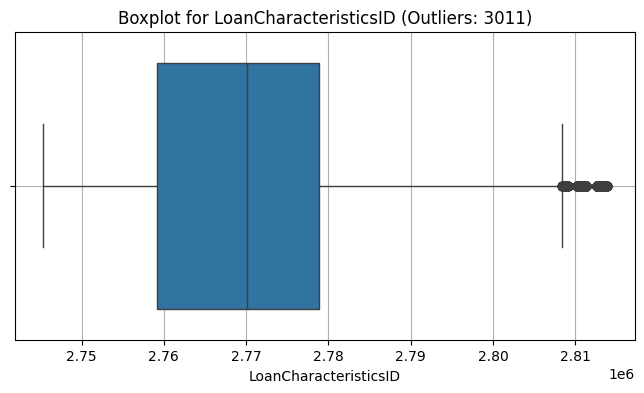

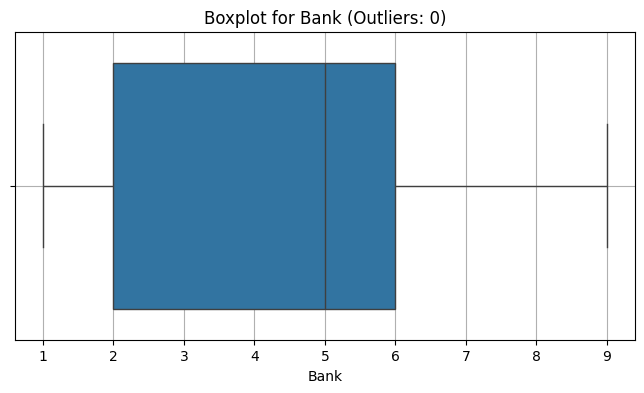

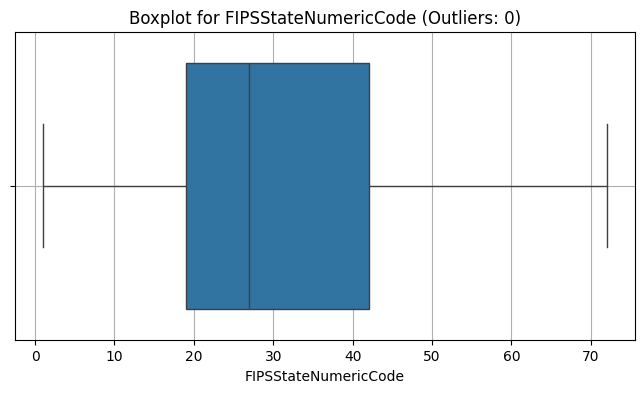

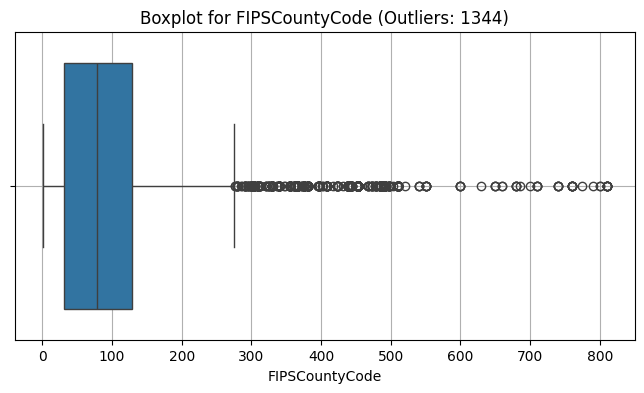

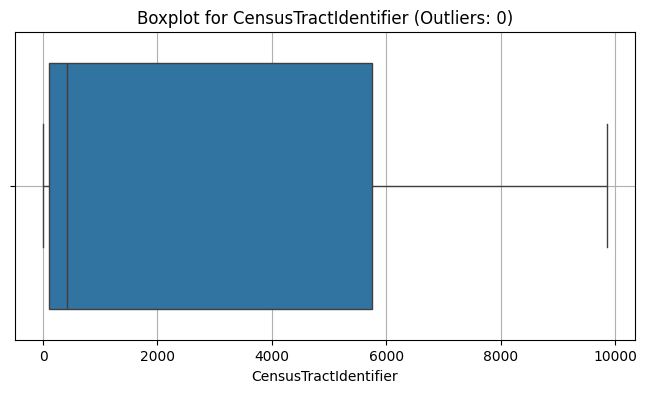

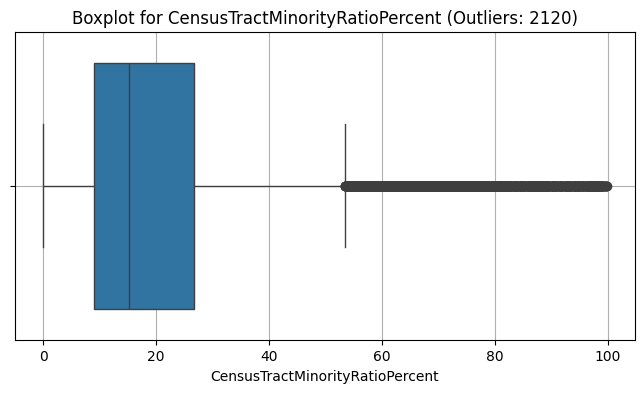

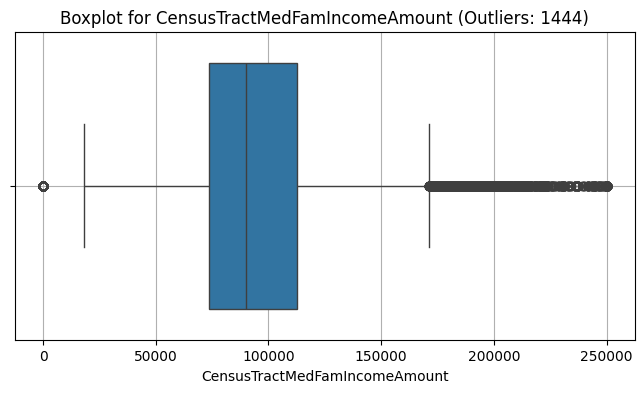

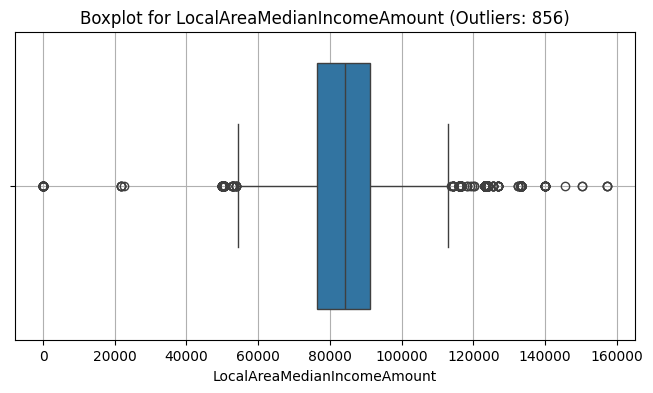

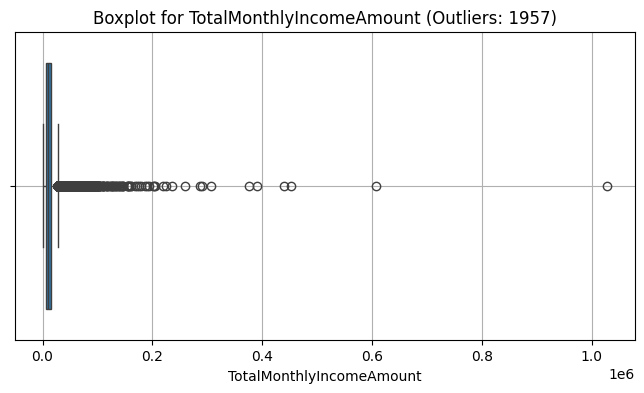

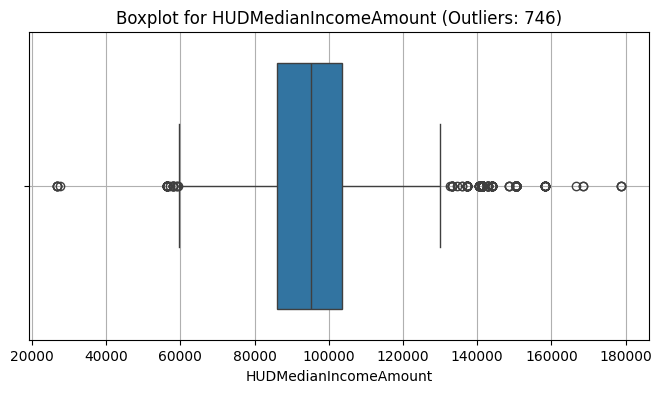

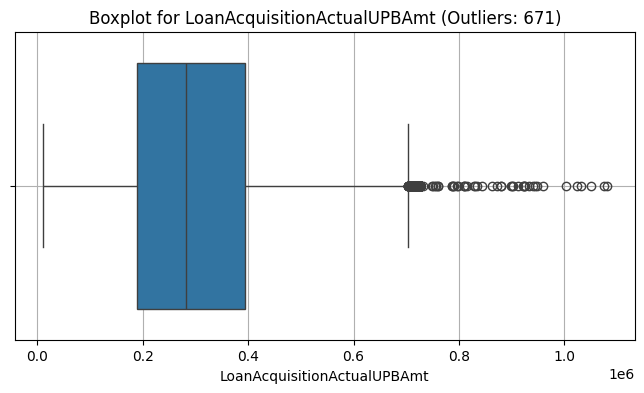

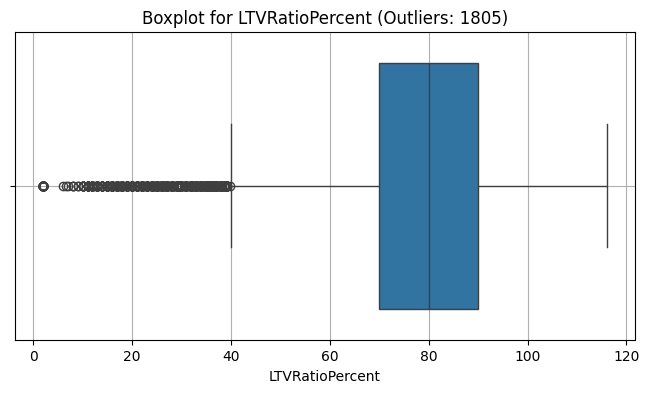

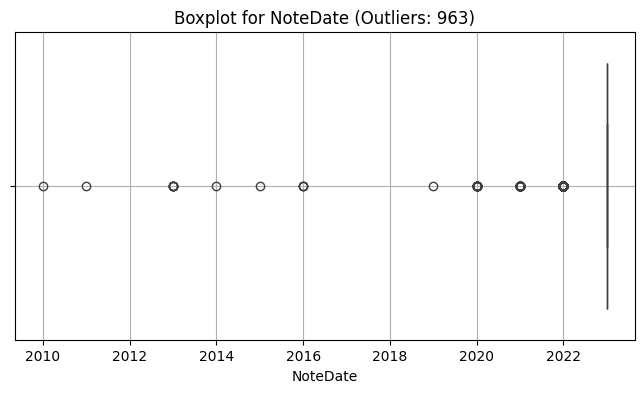

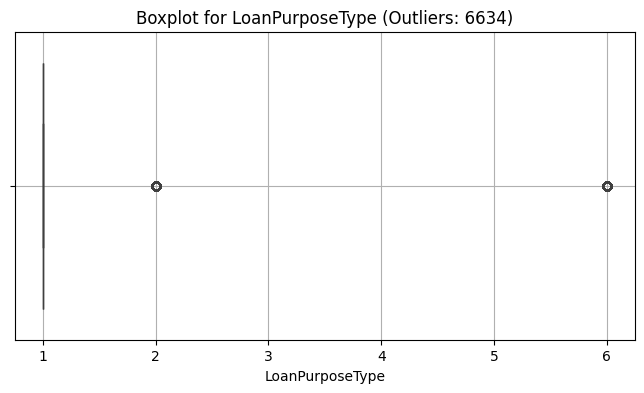

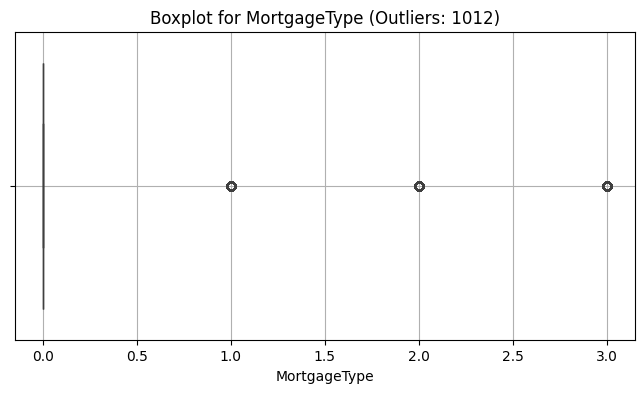

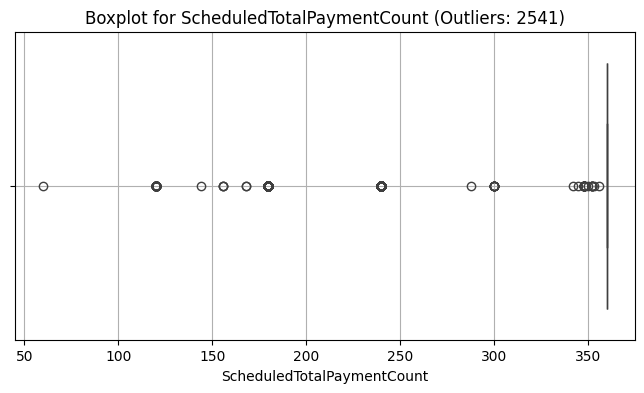

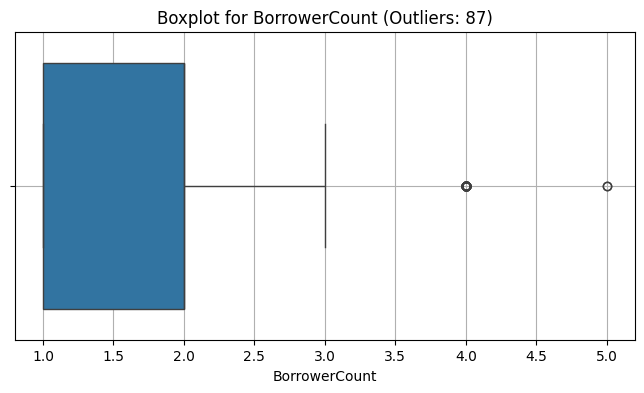

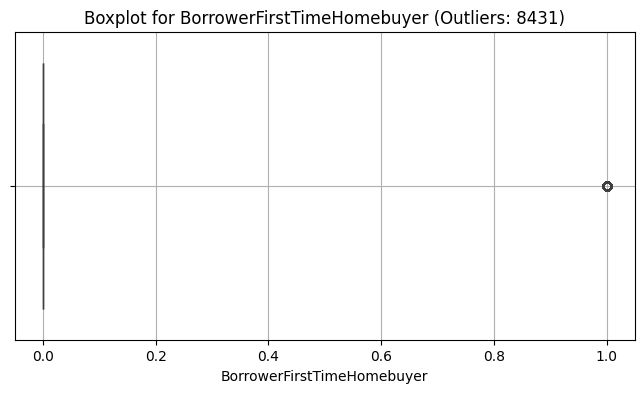

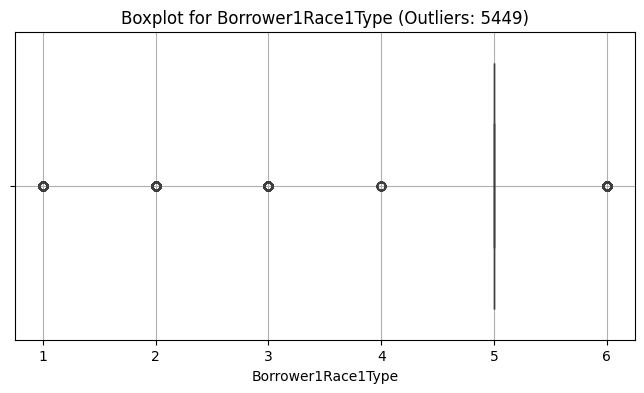

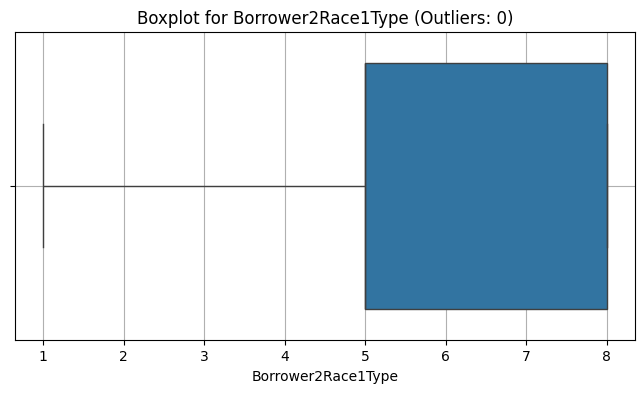

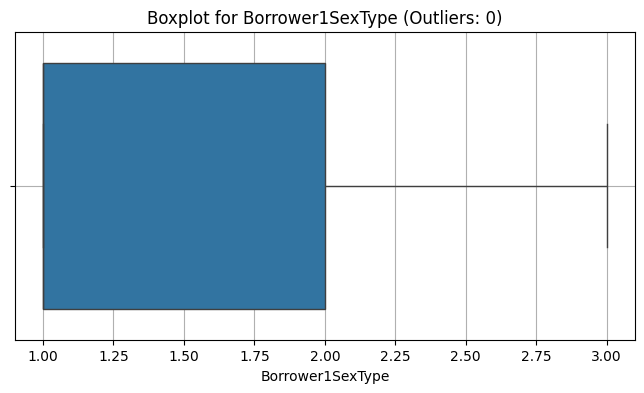

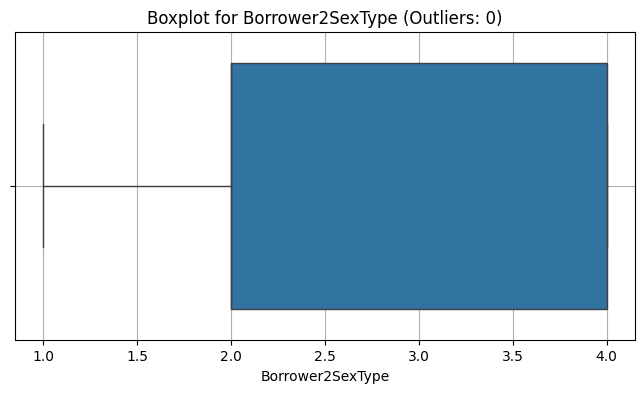

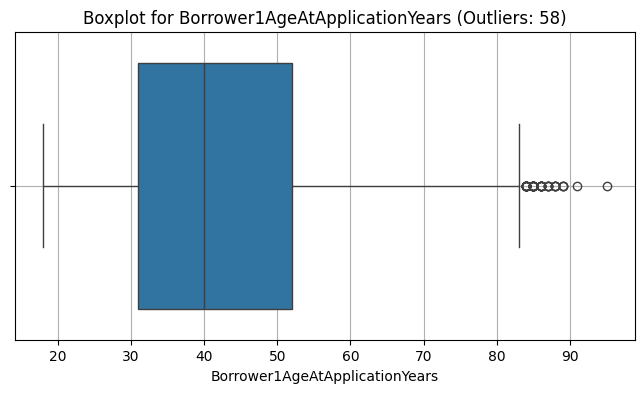

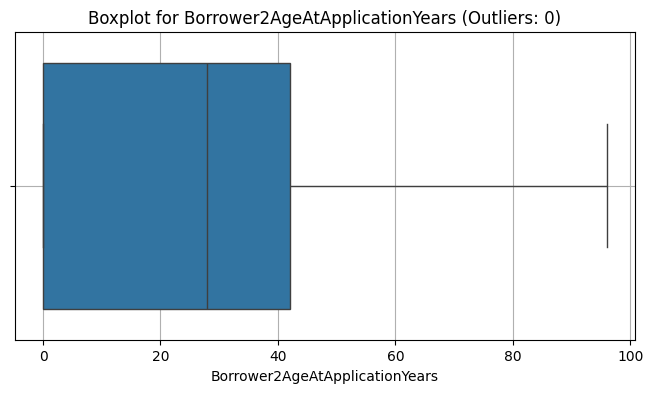

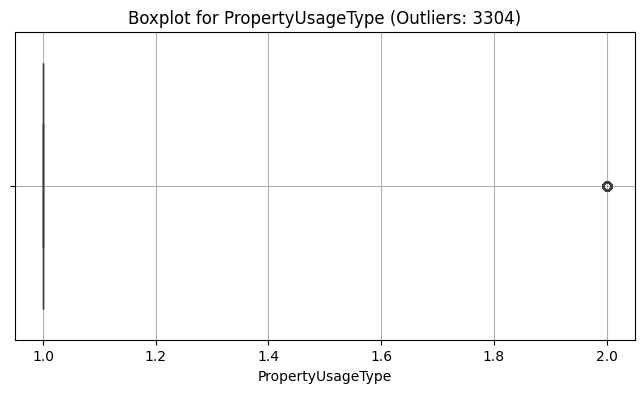

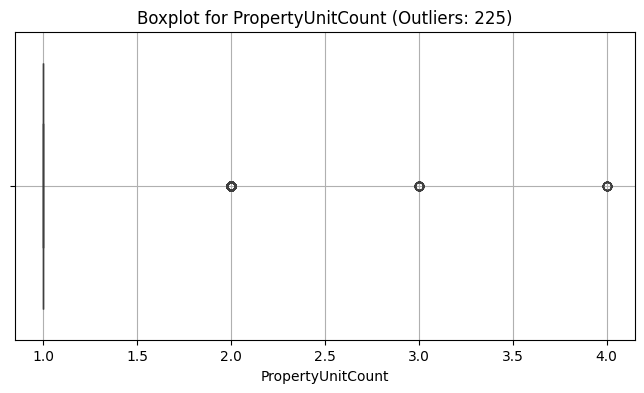

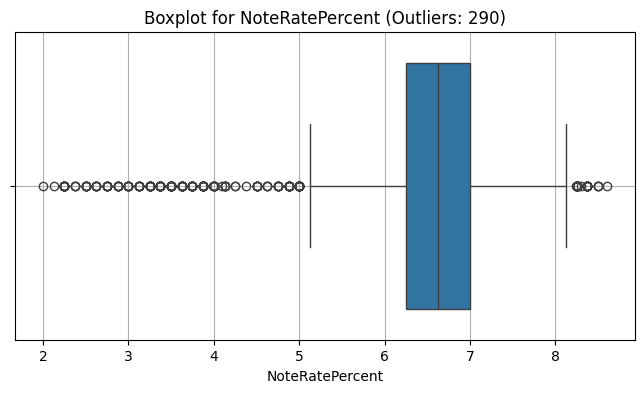

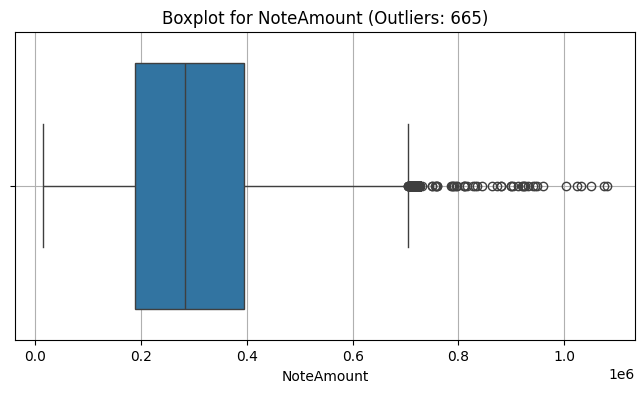

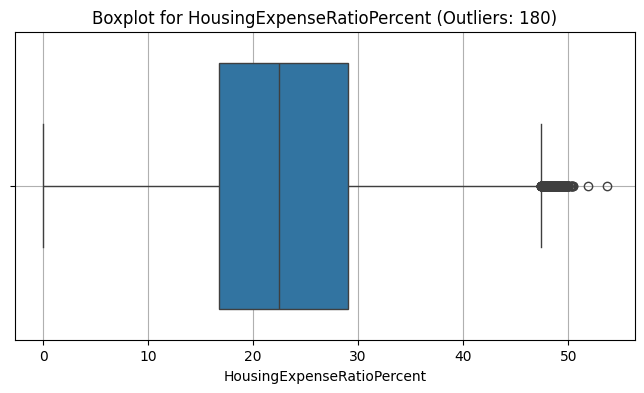

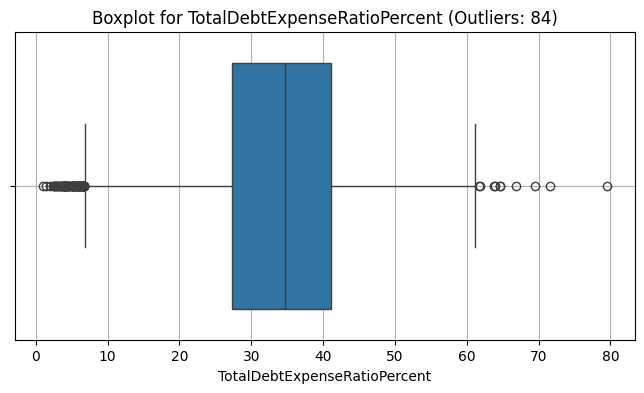

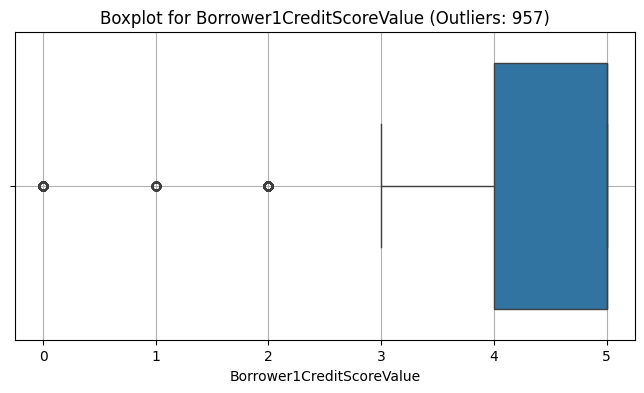

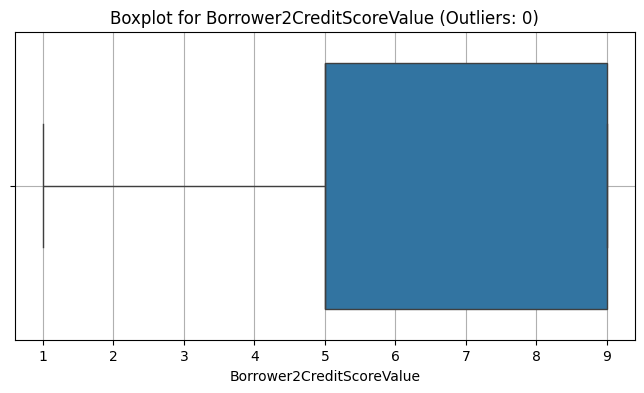

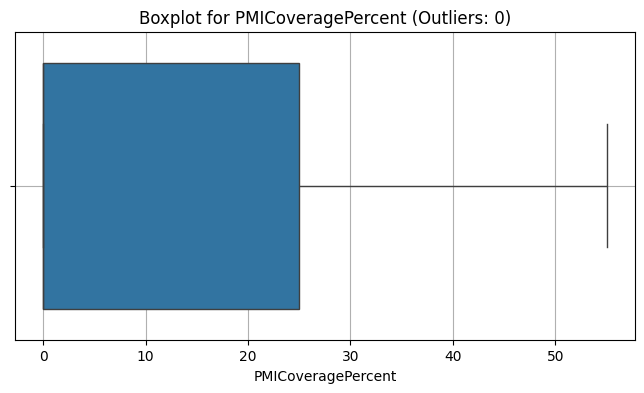

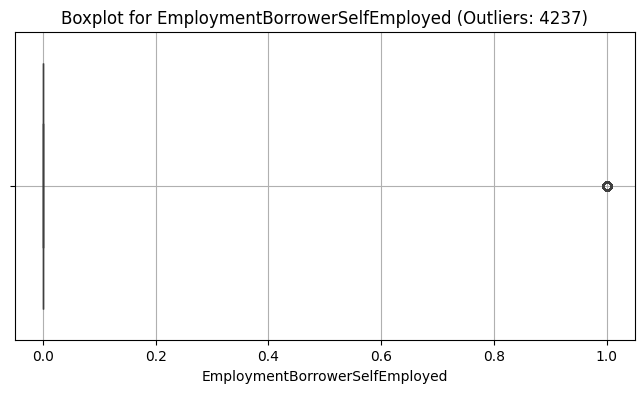

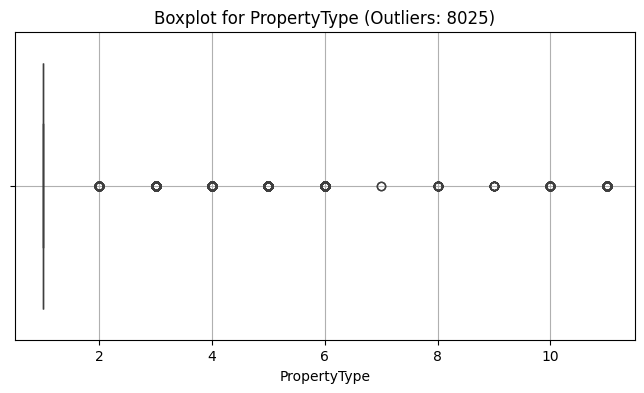

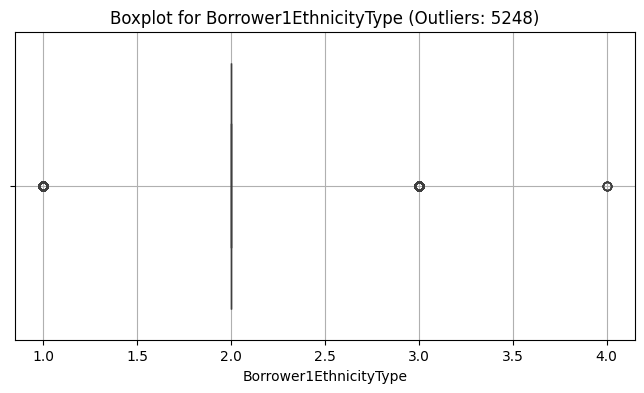

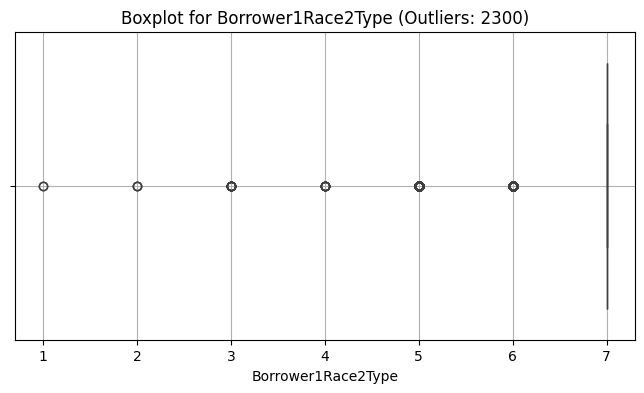

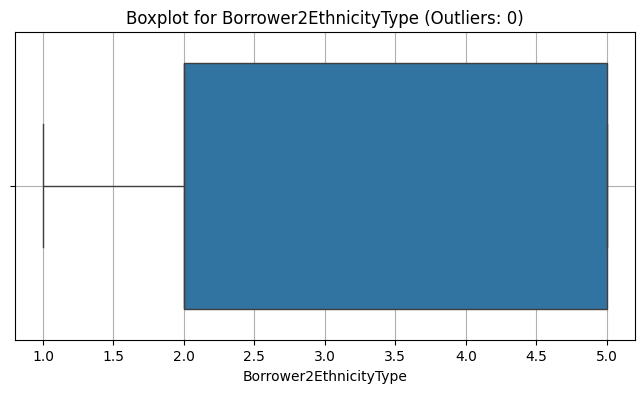

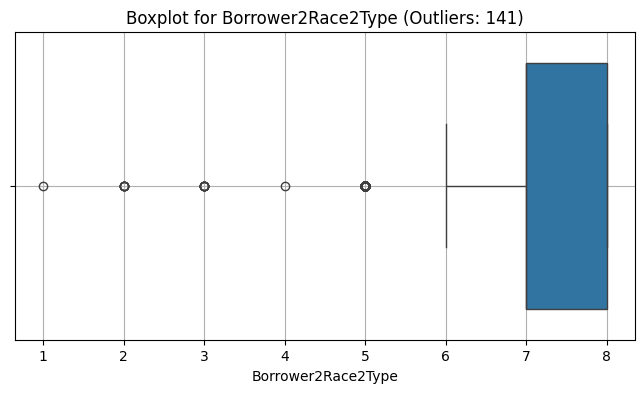

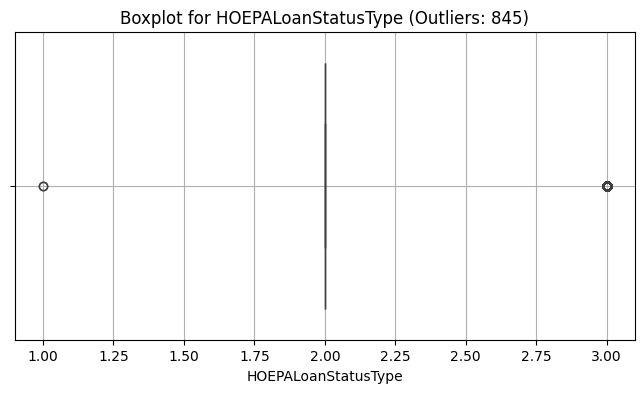

In [35]:

# Select only numerical columns
numerical_columns = df.select_dtypes(include=[np.number]).columns

# Function to count outliers using the IQR method
def count_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return ((data[column] < lower_bound) | (data[column] > upper_bound)).sum()

# Generate boxplots with outlier counts
for col in numerical_columns:
    outlier_count = count_outliers_iqr(df, col)
    
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col], orient="h")
    plt.title(f'Boxplot for {col} (Outliers: {outlier_count})')
    plt.xlabel(col)
    plt.grid(True)
    plt.show()


Column: FIPSCountyCode
Lower Bound: -295.0, Upper Bound: 505.0
Outliers Before: 127, Outliers After: 0

Column: CensusTractMinorityRatioPercent
Lower Bound: -73.736, Upper Bound: 136.592
Outliers Before: 0, Outliers After: 0

Column: CensusTractMedFamIncomeAmount
Lower Bound: -110549.49999999997, Upper Bound: 327529.69999999995
Outliers Before: 0, Outliers After: 0

Column: LocalAreaMedianIncomeAmount
Lower Bound: 1479.5, Upper Bound: 174779.5
Outliers Before: 42, Outliers After: 0

Column: TotalMonthlyIncomeAmount
Lower Bound: -33872.999999999985, Upper Bound: 67086.99999999997
Outliers Before: 216, Outliers After: 0

Column: LoanAcquisitionActualUPBAmt
Lower Bound: -698659.9999999997, Upper Bound: 1399099.9999999995
Outliers Before: 0, Outliers After: 0

Column: HUDMedianIncomeAmount
Lower Bound: -1700.0, Upper Bound: 199900.0
Outliers Before: 0, Outliers After: 0



C:\Users\Chirag\AppData\Local\Temp\ipykernel_47860\1123755331.py:24: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1479.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data_capped[data_capped < lower_bound] = lower_bound
C:\Users\Chirag\AppData\Local\Temp\ipykernel_47860\1123755331.py:25: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '67086.99999999997' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data_capped[data_capped > upper_bound] = upper_bound


Column: HousingExpenseRatioPercent
Lower Bound: -36.77499999999999, Upper Bound: 84.881
Outliers Before: 0, Outliers After: 0

Column: TotalDebtExpenseRatioPercent
Lower Bound: -28.55999999999999, Upper Bound: 94.01599999999999
Outliers Before: 0, Outliers After: 0


Outlier Summary:
                            Feature  Outliers Before  Outliers After
0                   FIPSCountyCode              127               0
1  CensusTractMinorityRatioPercent                0               0
2    CensusTractMedFamIncomeAmount                0               0
3      LocalAreaMedianIncomeAmount               42               0
4         TotalMonthlyIncomeAmount              216               0
5      LoanAcquisitionActualUPBAmt                0               0
6            HUDMedianIncomeAmount                0               0
7       HousingExpenseRatioPercent                0               0
8     TotalDebtExpenseRatioPercent                0               0


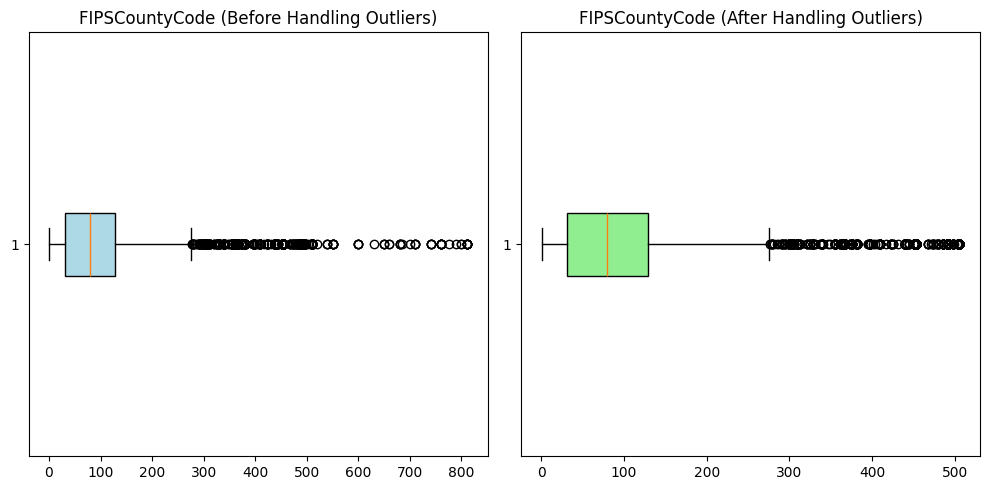

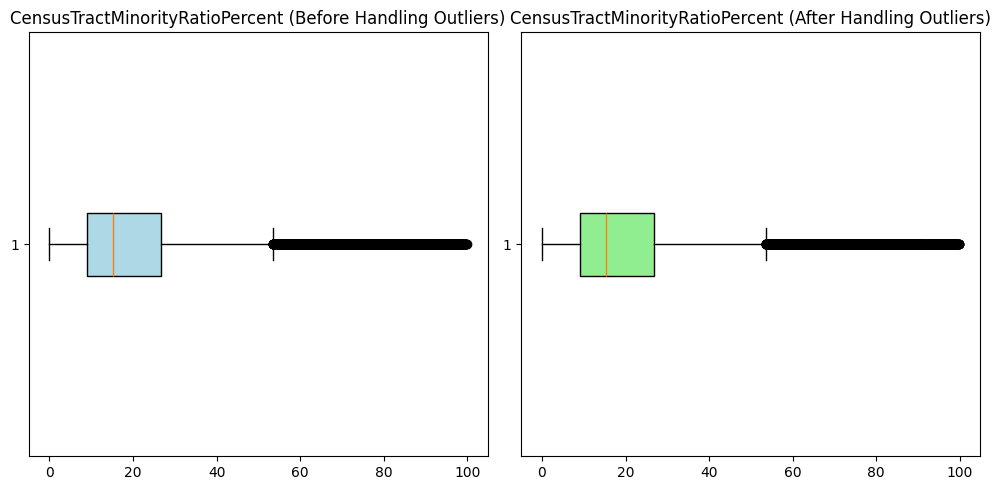

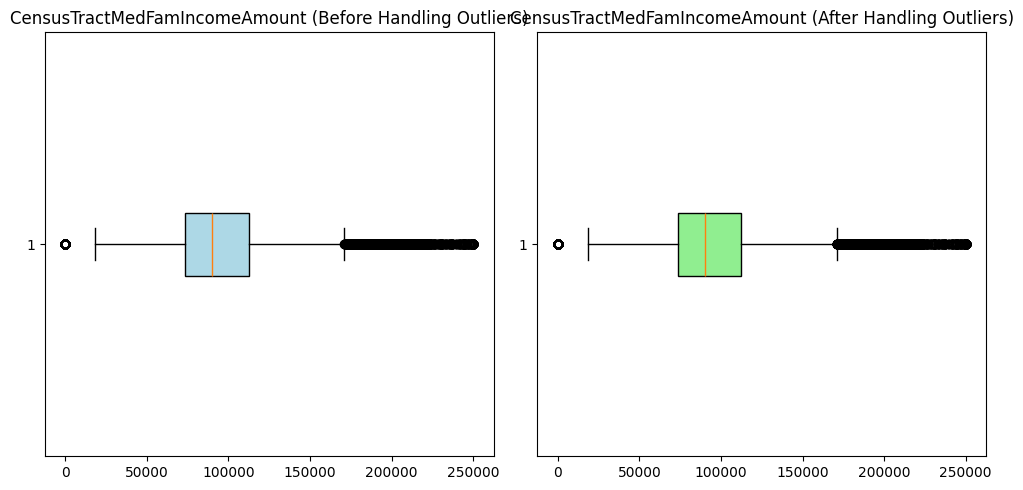

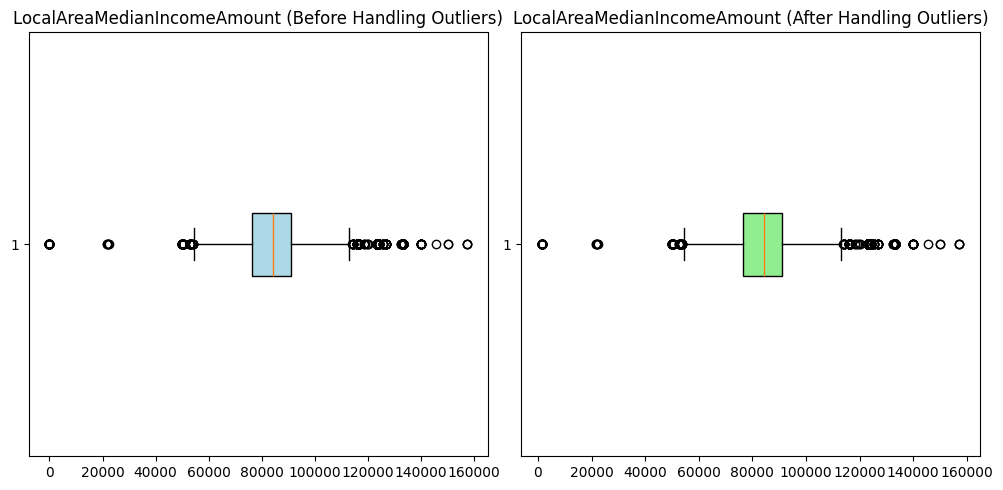

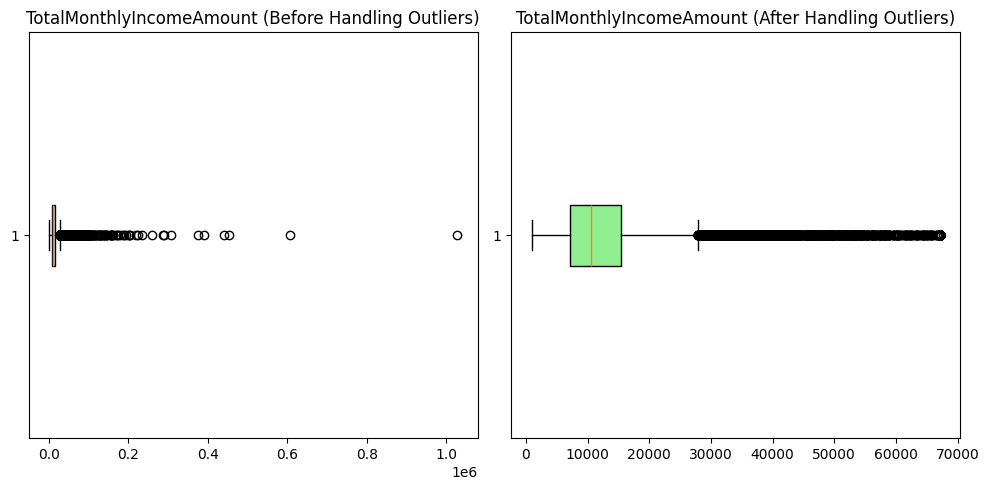

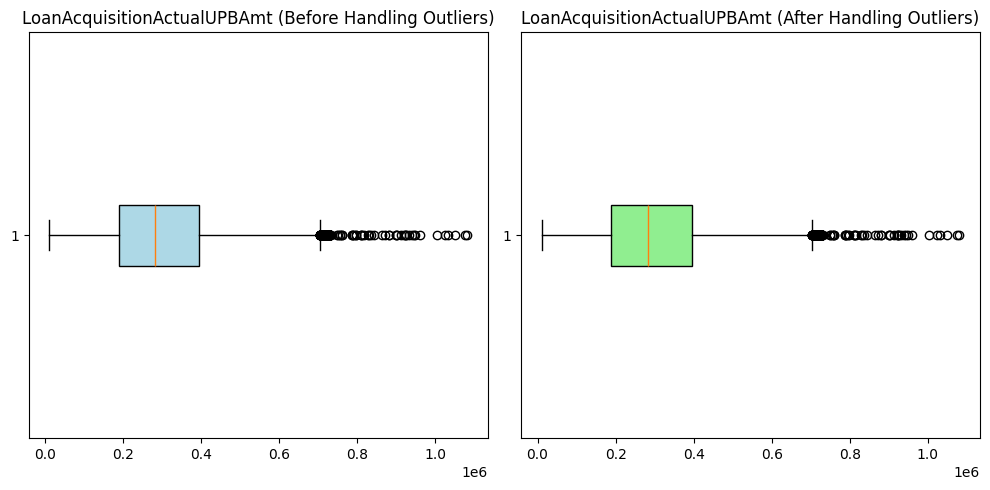

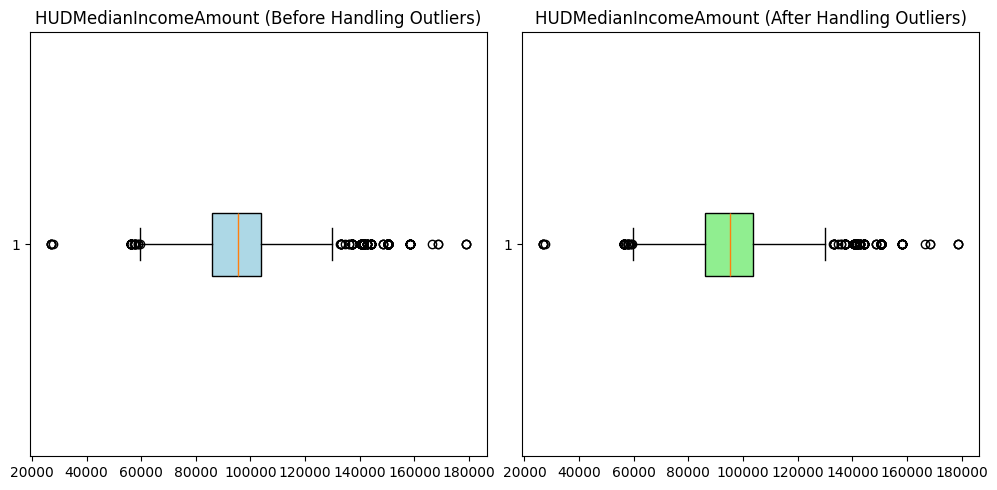

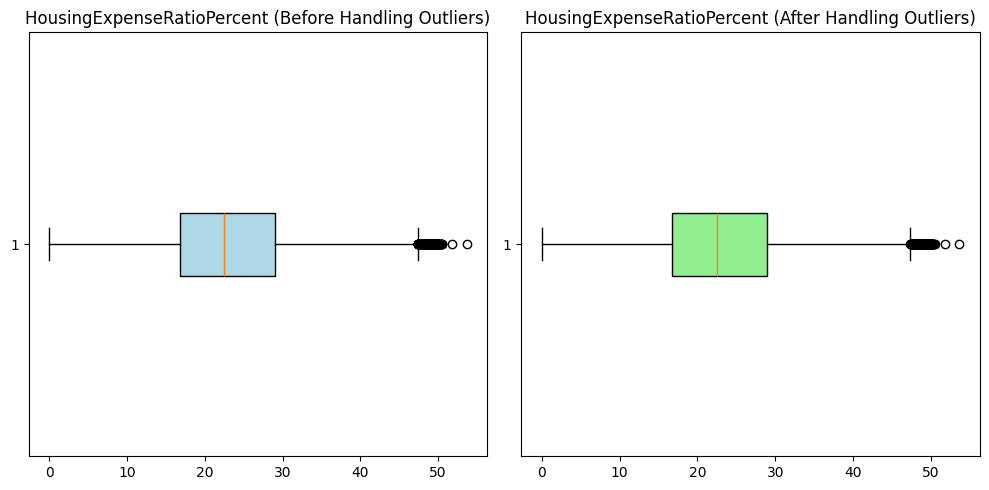

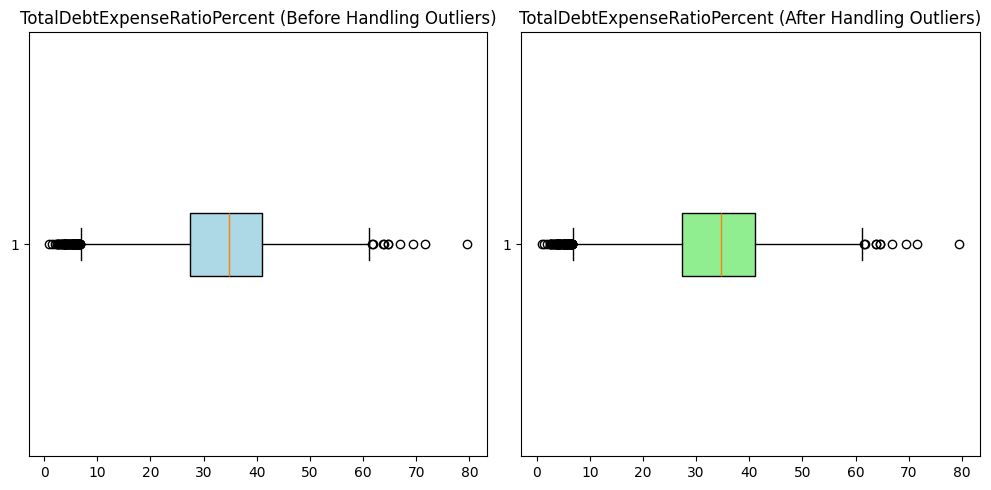

In [38]:
# List of columns you want to treat for outliers
columns_to_handle = [
    "FIPSCountyCode", "CensusTractMinorityRatioPercent", "CensusTractMedFamIncomeAmount",
    "LocalAreaMedianIncomeAmount", "TotalMonthlyIncomeAmount", "LoanAcquisitionActualUPBAmt",
    "HUDMedianIncomeAmount", "HousingExpenseRatioPercent", "TotalDebtExpenseRatioPercent"
]

# Create a copy of the original dataframe to preserve the original data
df_outliers_handled = df.copy()

# Function to handle outliers for a given column
def handle_outliers(data):
    Q1 = np.percentile(data, 5)
    Q3 = np.percentile(data, 95)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Count outliers before treatment
    num_outliers_before = ((data < lower_bound) | (data > upper_bound)).sum()

    # Handle outliers by capping (Winsorization)
    data_capped = data.copy()
    data_capped[data_capped < lower_bound] = lower_bound
    data_capped[data_capped > upper_bound] = upper_bound

    # Count outliers after treatment (should be zero)
    num_outliers_after = ((data_capped < lower_bound) | (data_capped > upper_bound)).sum()

    return data_capped, lower_bound, upper_bound, num_outliers_before, num_outliers_after

# Loop through each column to handle outliers
outlier_stats = []
for column_name in columns_to_handle:
    if column_name in df.columns:
        data = df[column_name].dropna()
        df_outliers_handled[column_name], lower_bound, upper_bound, num_outliers_before, num_outliers_after = handle_outliers(data)
        
        # Store outlier counts
        outlier_stats.append((column_name, num_outliers_before, num_outliers_after))

        print(f"Column: {column_name}")
        print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")
        print(f"Outliers Before: {num_outliers_before}, Outliers After: {num_outliers_after}\n")

    else:
        print(f"Column '{column_name}' not found in the dataset.")

# Convert outlier statistics to DataFrame for better visualization
outlier_df = pd.DataFrame(outlier_stats, columns=["Feature", "Outliers Before", "Outliers After"])
print("\nOutlier Summary:\n", outlier_df)

#Plot boxplots for each column before and after handling outliers
for column_name in columns_to_handle:
    if column_name in df.columns:
        plt.figure(figsize=(10, 5))

        # Before handling outliers
        plt.subplot(1, 2, 1)
        plt.boxplot(df[column_name].dropna(), vert=False, patch_artist=True, boxprops=dict(facecolor="lightblue"))
        plt.title(f"{column_name} (Before Handling Outliers)")

        # After handling outliers
        plt.subplot(1, 2, 2)
        plt.boxplot(df_outliers_handled[column_name].dropna(), vert=False, patch_artist=True, boxprops=dict(facecolor="lightgreen"))
        plt.title(f"{column_name} (After Handling Outliers)")

        plt.tight_layout()
        plt.show()



# Loop through each column to handle outliers

Irrelevant Features (Highly Correlated) Recommended for Removal:
{'Borrower2Race1Type', 'Borrower2CreditScoreValue', 'BorrowerCount', 'Borrower2SexType', 'LoanAcquisitionActualUPBAmt', 'LocalAreaMedianIncomeAmount'}


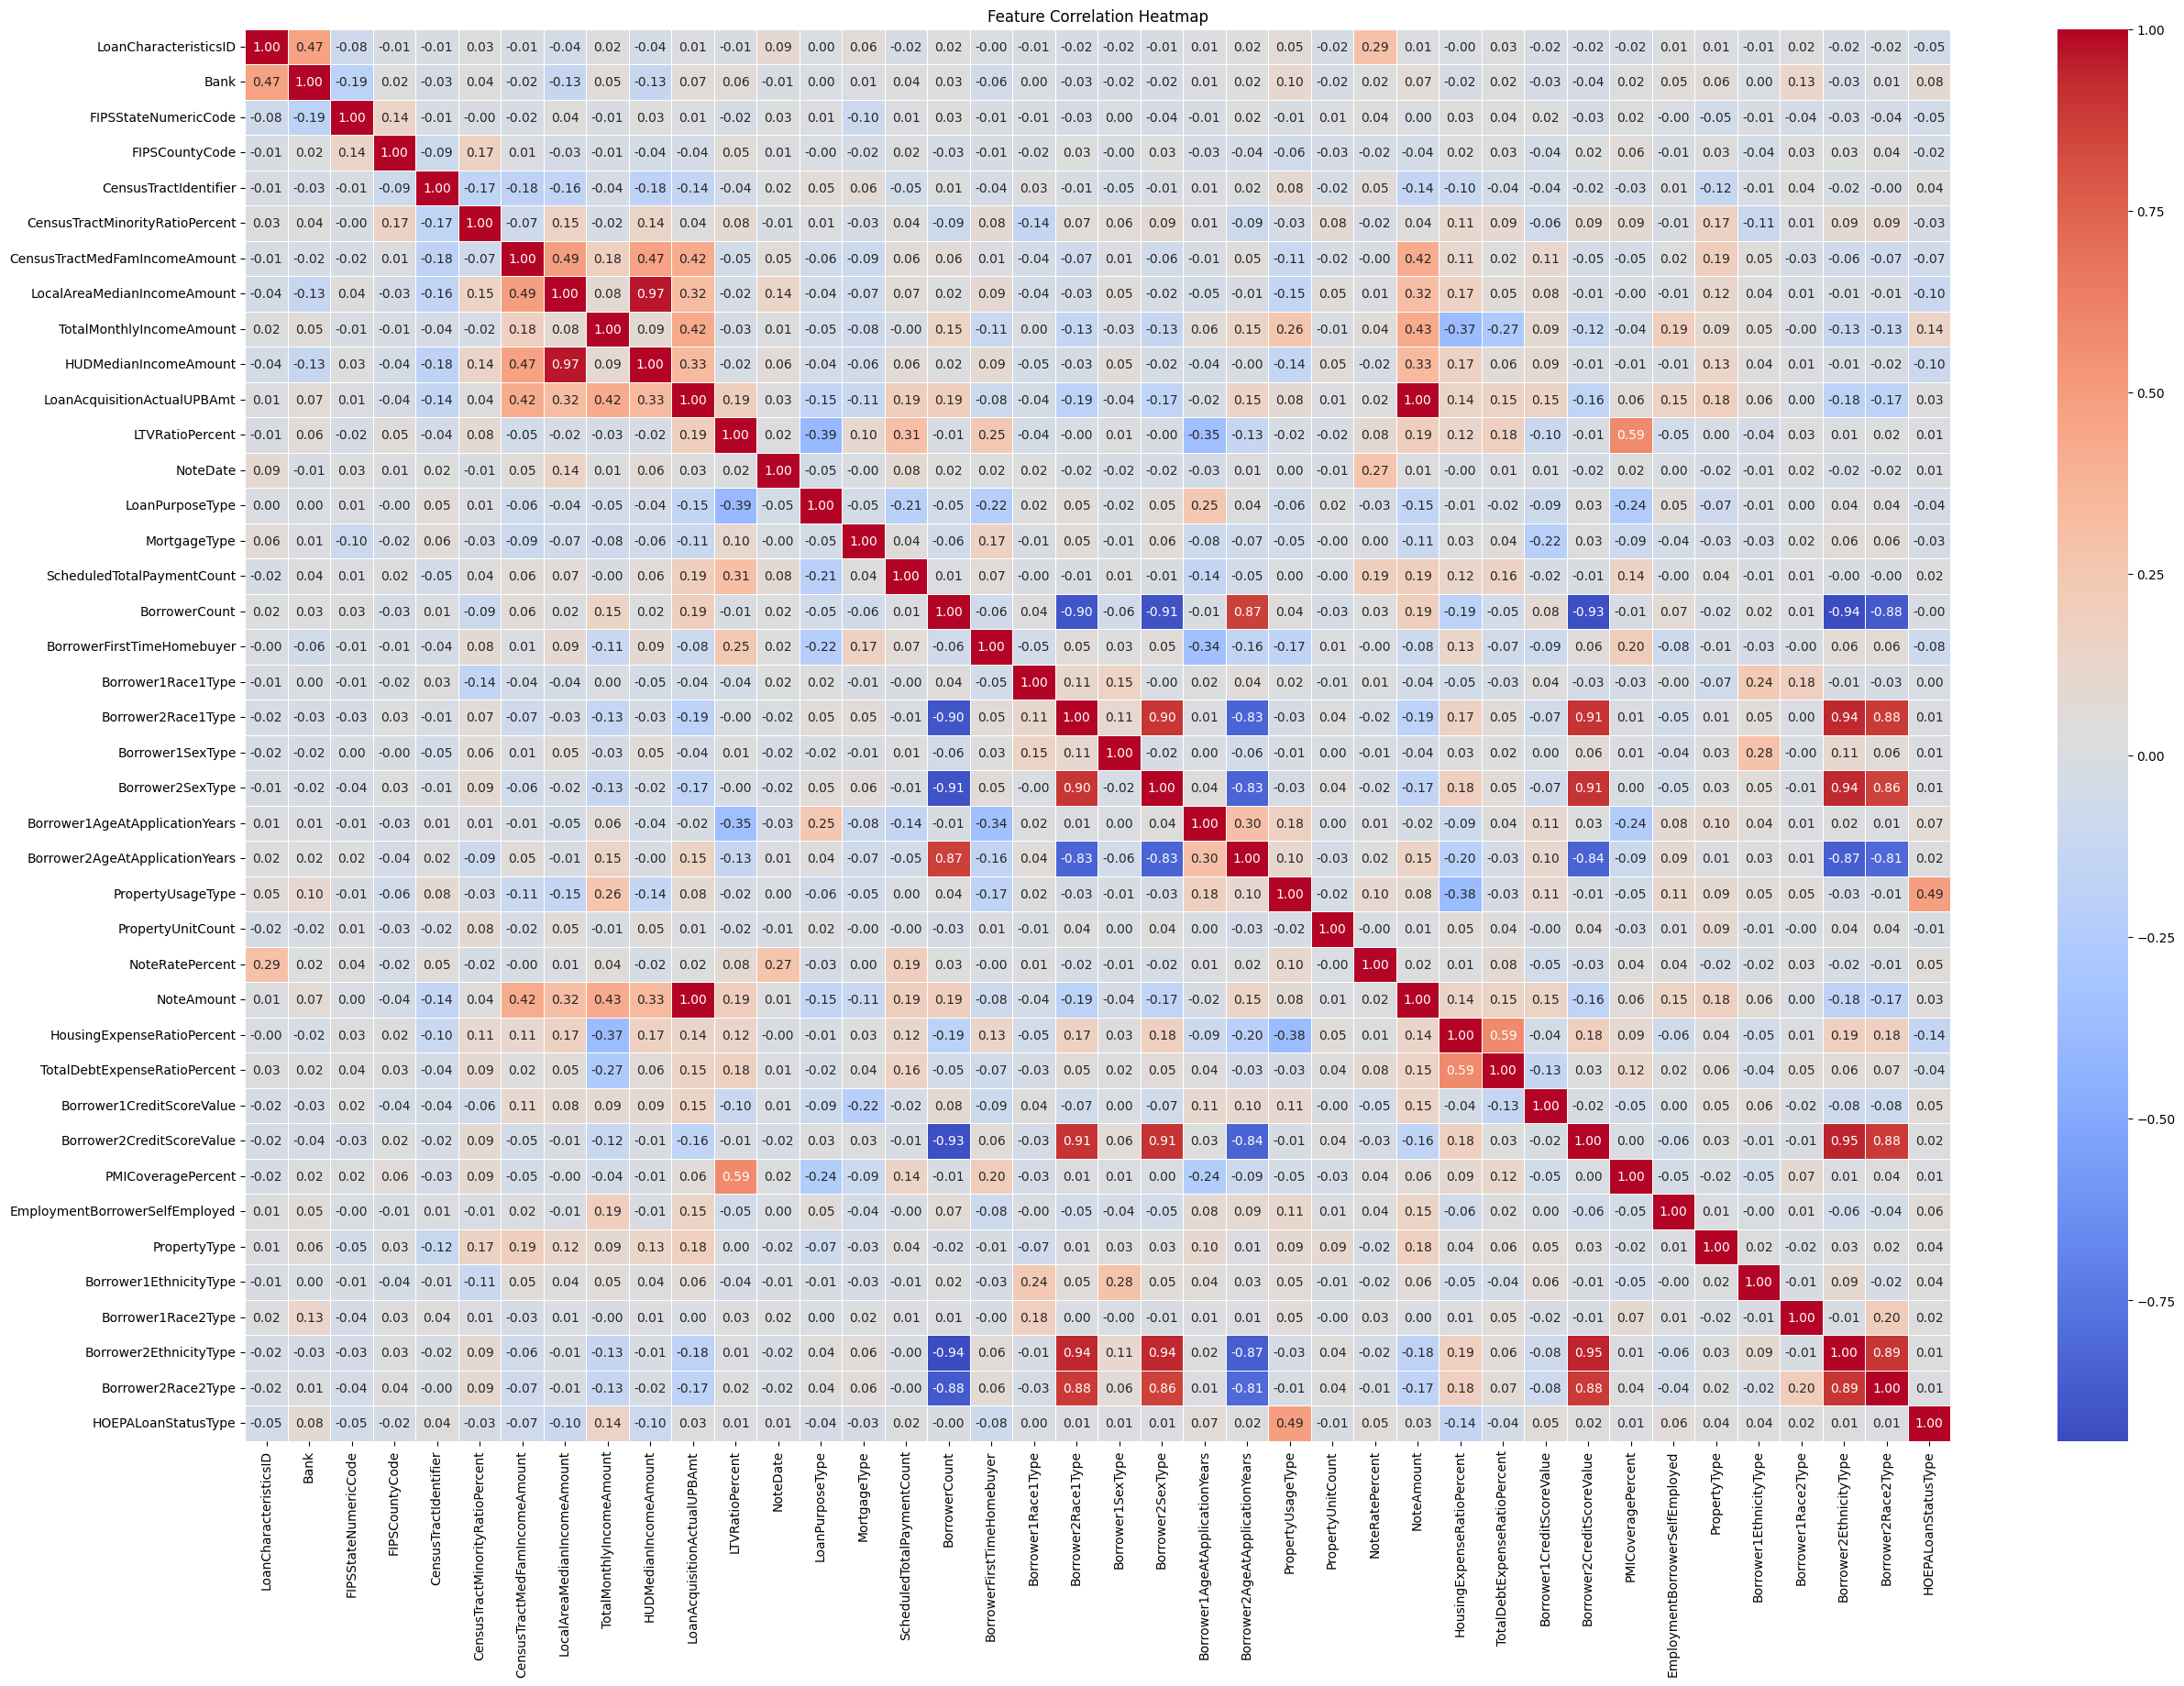

In [39]:
# Select only numerical columns
numerical_df = df.select_dtypes(include=[np.number])

# Compute the correlation matrix
correlation_matrix = numerical_df.corr()

# Identify highly correlated features (correlation coefficient > 0.9)
threshold = 0.9
high_corr_pairs = set()
irrelevant_features = set()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            feature1 = correlation_matrix.columns[i]
            feature2 = correlation_matrix.columns[j]
            high_corr_pairs.add((feature1, feature2))
            irrelevant_features.add(feature2)  # Mark one as redundant

# Print irrelevant features
print("Irrelevant Features (Highly Correlated) Recommended for Removal:")
print(irrelevant_features)

# Plot heatmap of correlation matrix
plt.figure(figsize=(30, 20))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

## visualisation

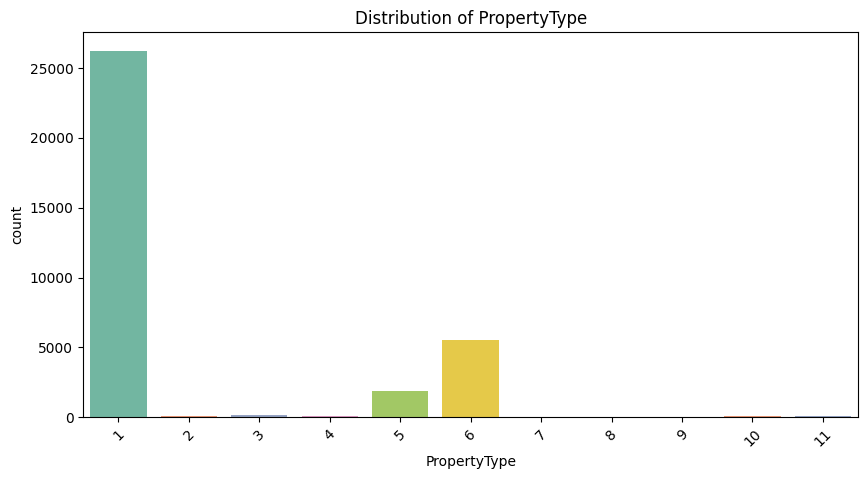

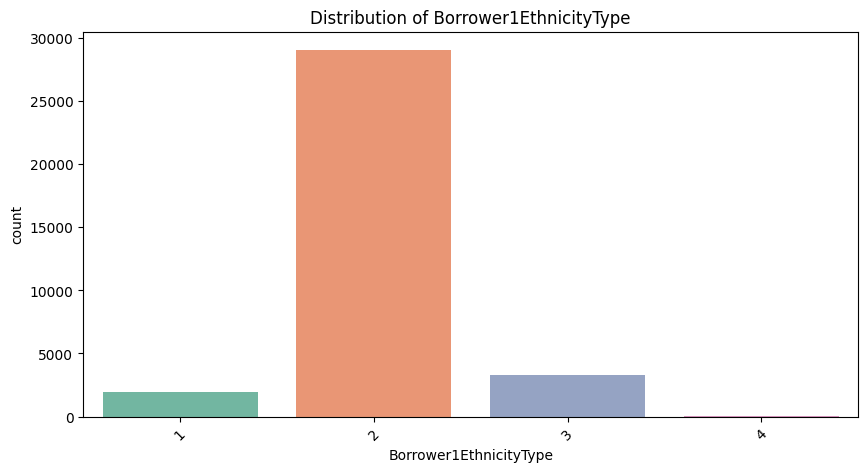

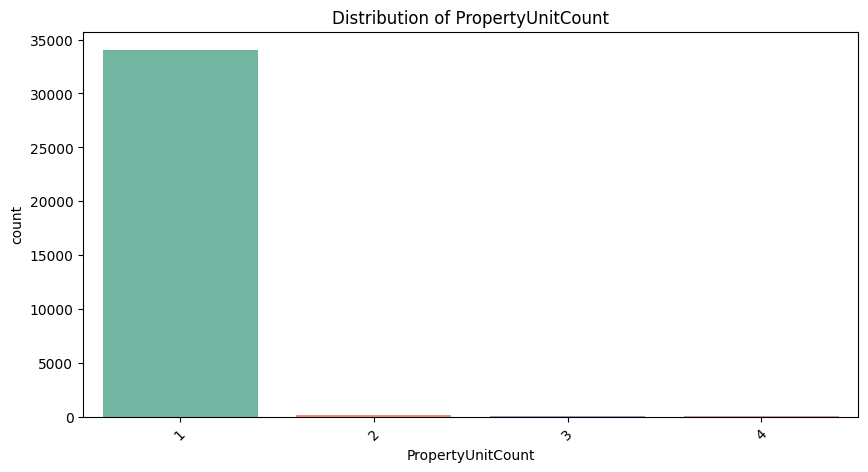

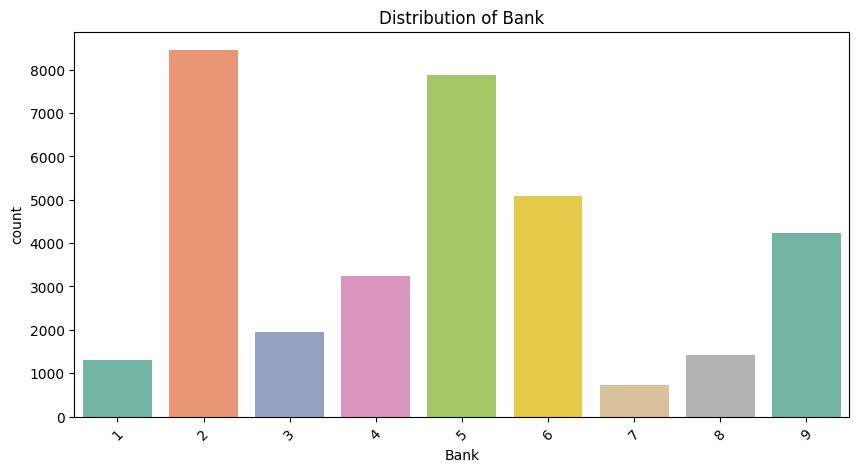

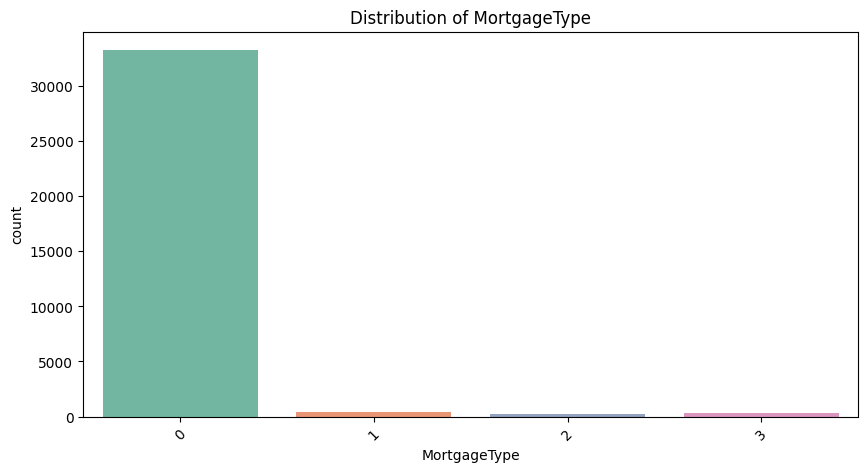

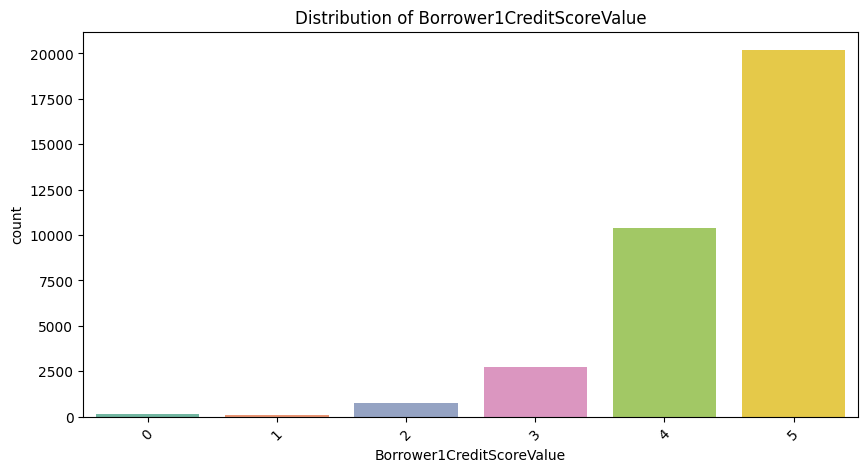

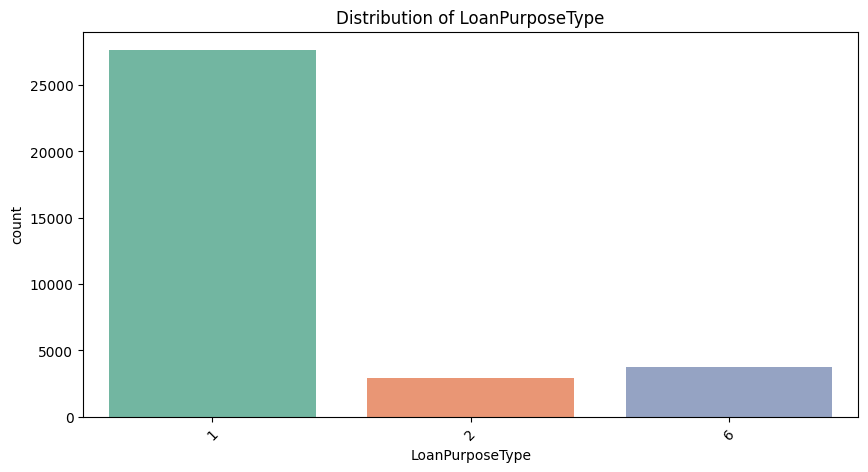

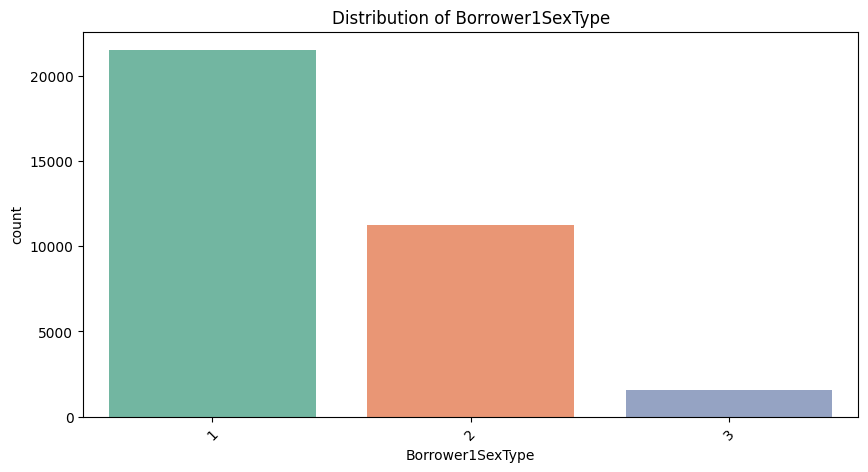

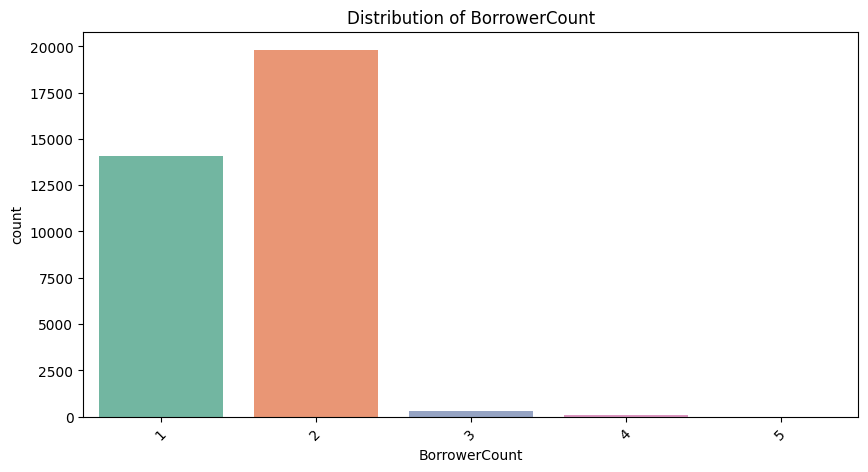

In [40]:
categorical_cols = [
    'PropertyType', 'Borrower1EthnicityType',
    'PropertyUnitCount', 
    'Bank', 'MortgageType', 'Borrower1CreditScoreValue', 
    'LoanPurposeType', 'Borrower1SexType',
    'BorrowerCount'
]

# Loop through each categorical column
for col in categorical_cols:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=col, data=numerical_df, palette='Set2', hue=col, legend=False)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)  # Rotating x-axis labels for better readability
    plt.show()


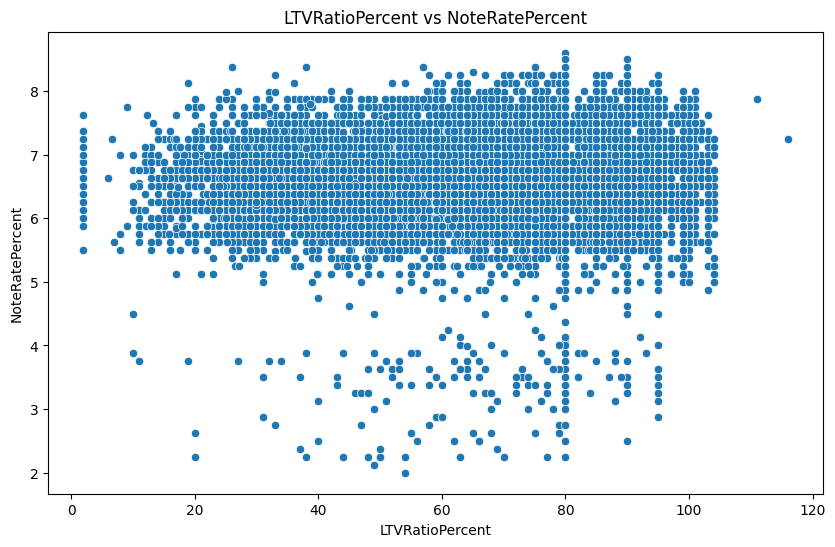

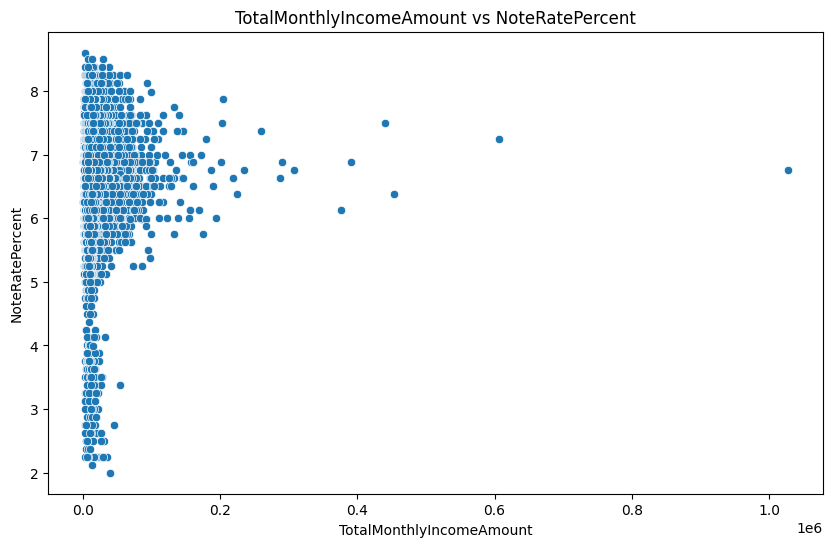

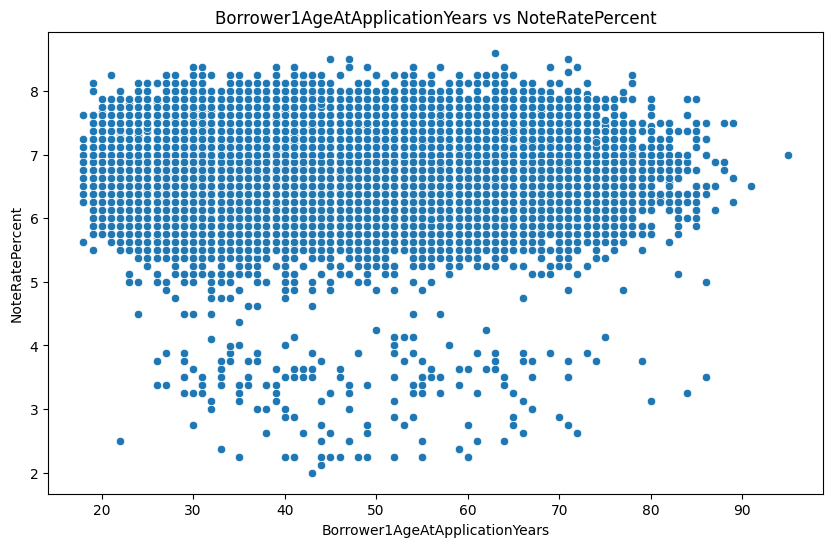

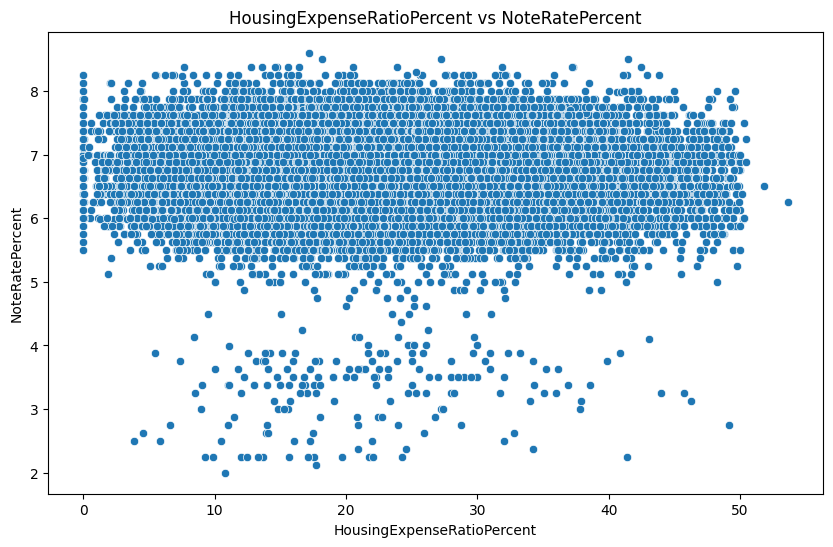

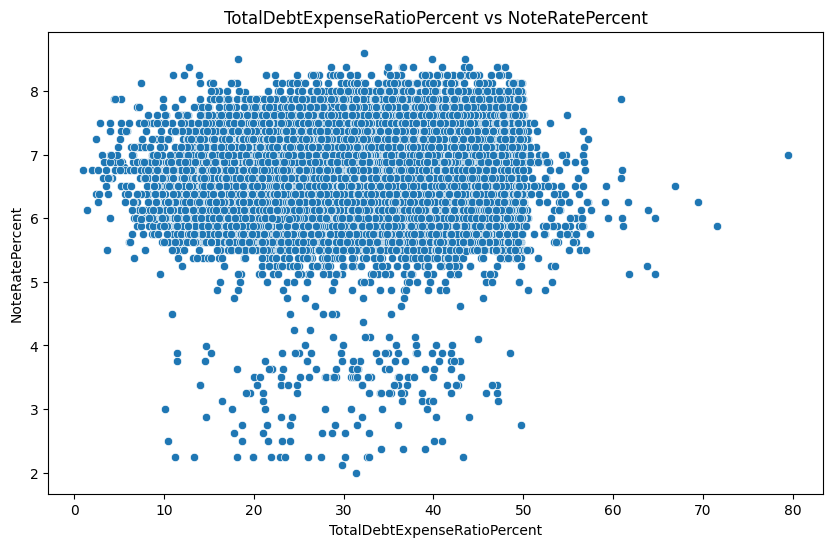

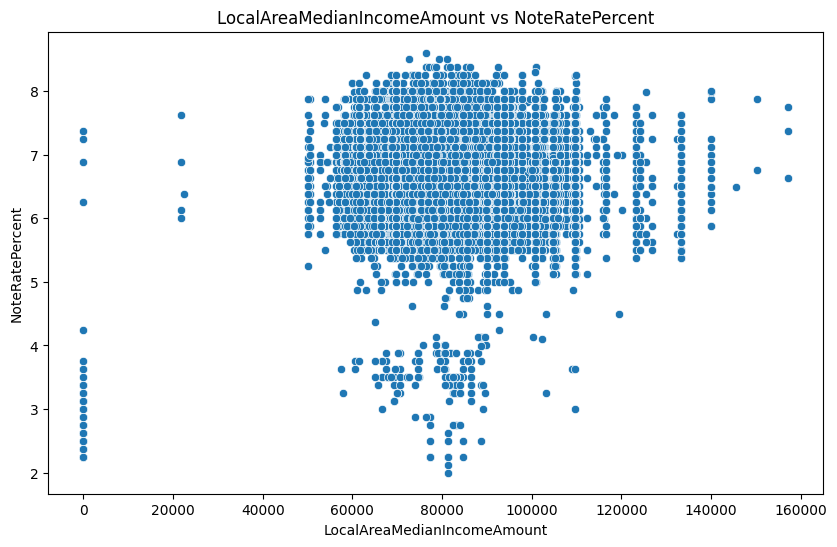

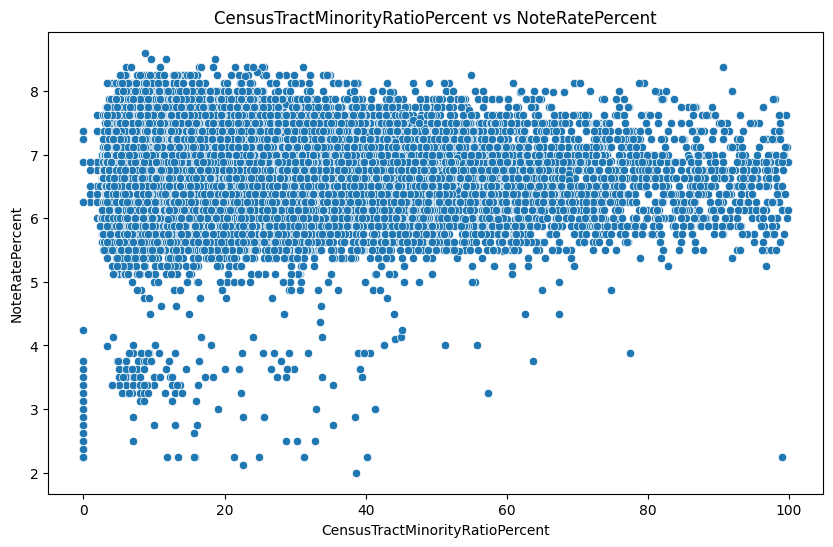

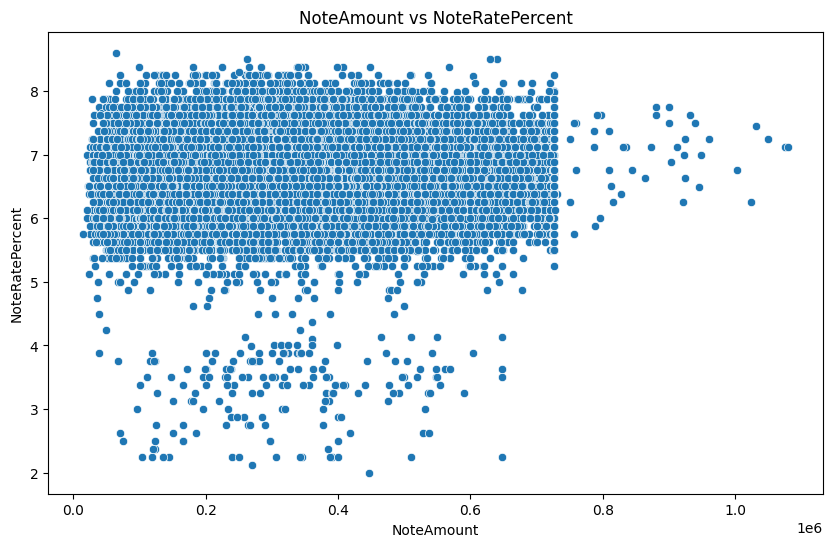

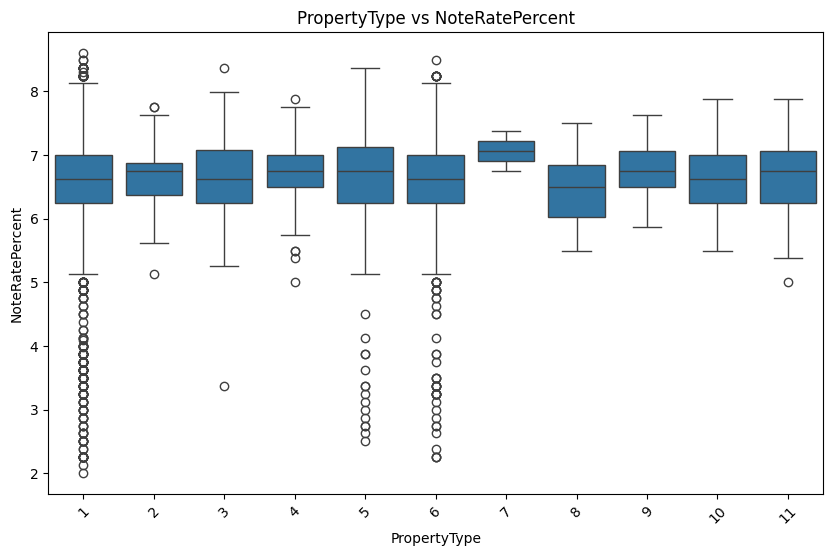

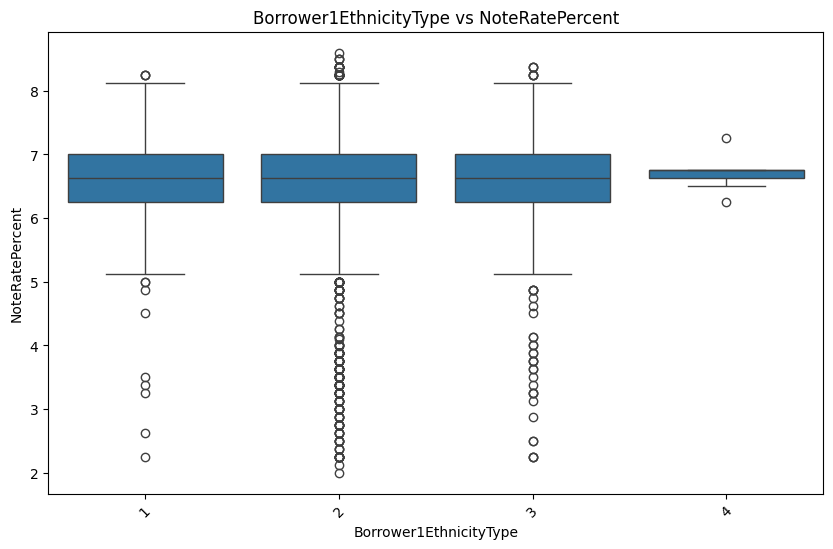

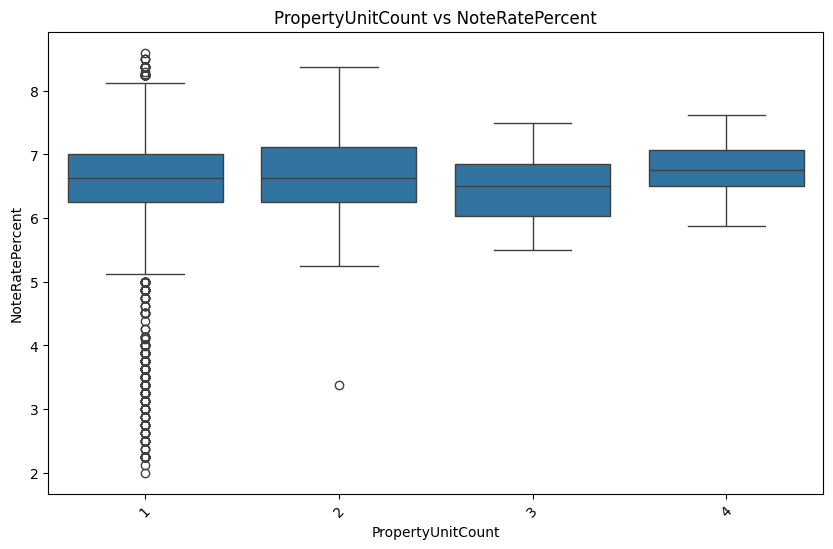

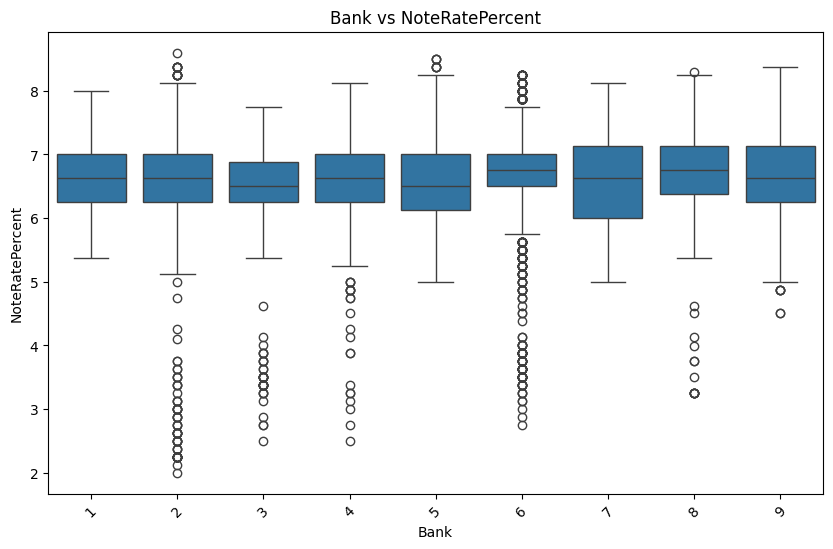

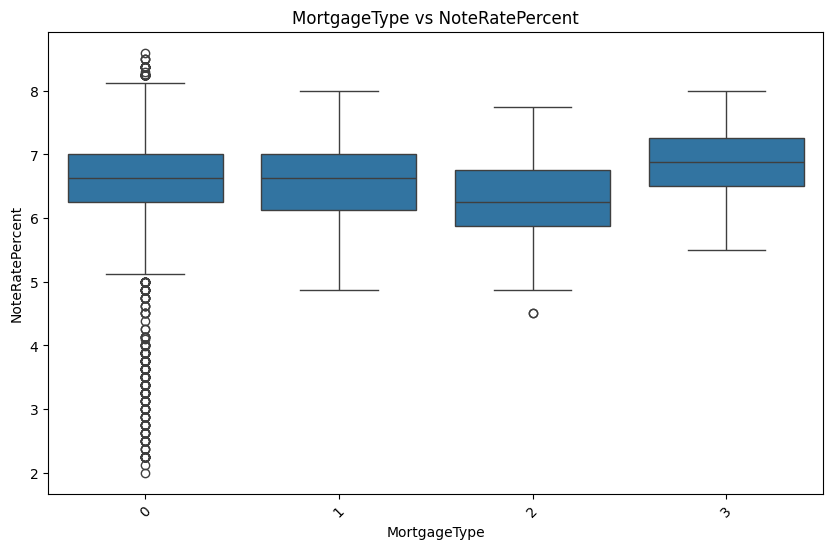

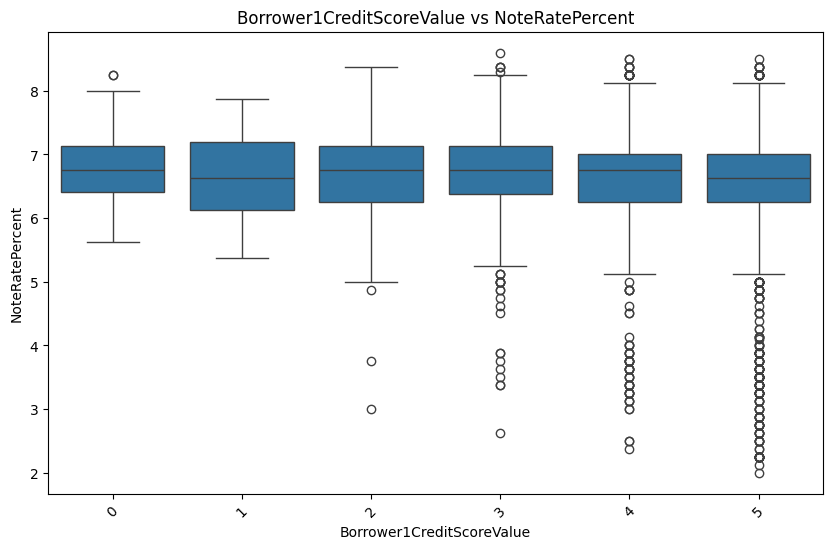

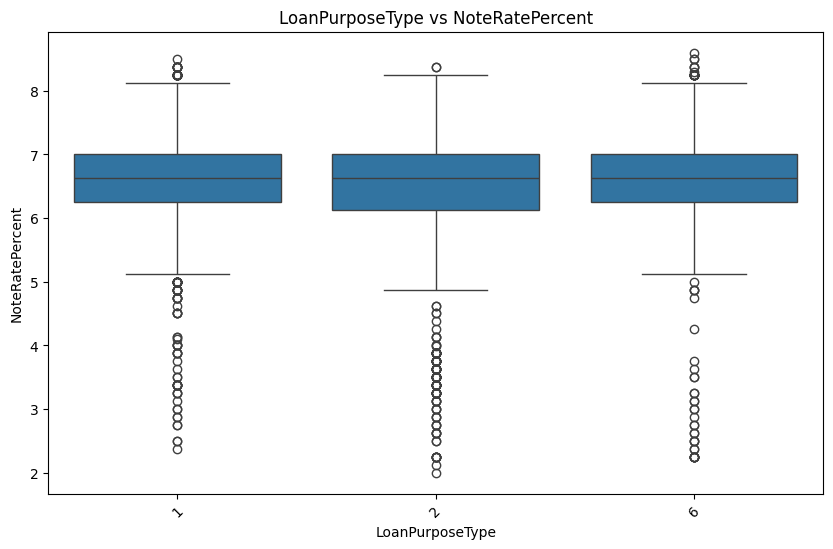

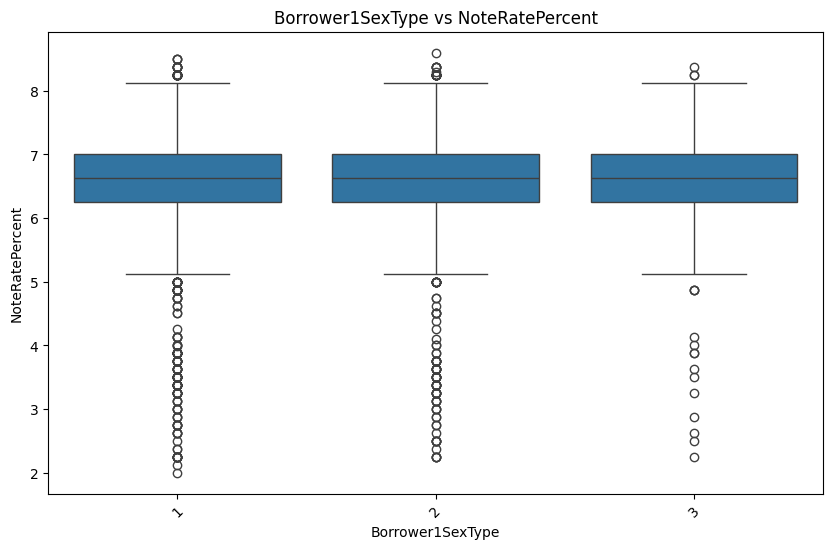

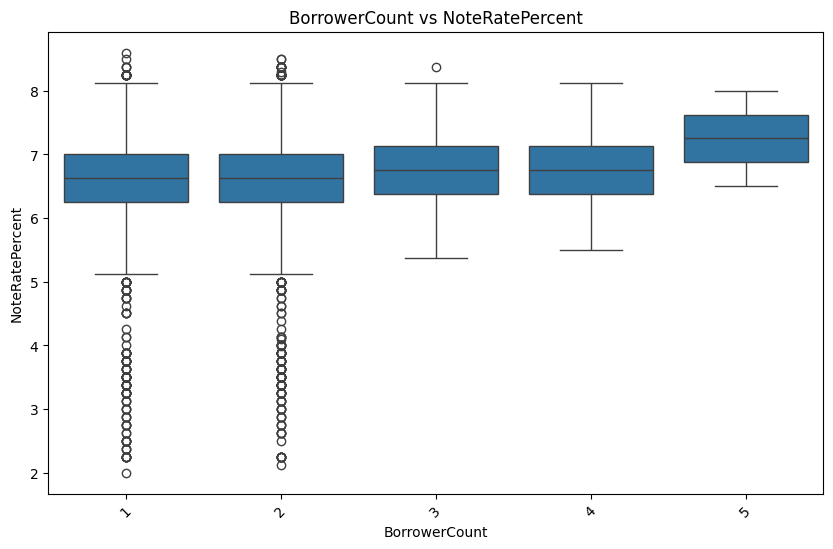

In [41]:
# Columns against NoteRatePercent
continuous_cols = [
    'LTVRatioPercent', 
    'TotalMonthlyIncomeAmount', 'Borrower1AgeAtApplicationYears', 
    'HousingExpenseRatioPercent', 
    'TotalDebtExpenseRatioPercent', 
    'LocalAreaMedianIncomeAmount', 
    'CensusTractMinorityRatioPercent', 
    'NoteAmount'
]

categorical_cols = [
    'PropertyType', 'Borrower1EthnicityType',
    'PropertyUnitCount', 
    'Bank', 'MortgageType', 'Borrower1CreditScoreValue',
    'LoanPurposeType', 'Borrower1SexType',
    'BorrowerCount'
]

# Loop through continuous columns and plot scatter plots
for col in continuous_cols:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=col, y='NoteRatePercent', data=numerical_df)
    plt.title(f'{col} vs NoteRatePercent')
    plt.xlabel(col)
    plt.ylabel('NoteRatePercent')
    plt.show()

# Loop through categorical columns and plot boxplots
for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=col, y='NoteRatePercent', data=numerical_df)
    plt.title(f'{col} vs NoteRatePercent')
    plt.xlabel(col)
    plt.ylabel('NoteRatePercent')
    plt.xticks(rotation=45)  # Rotate for better readability if needed
    plt.show()

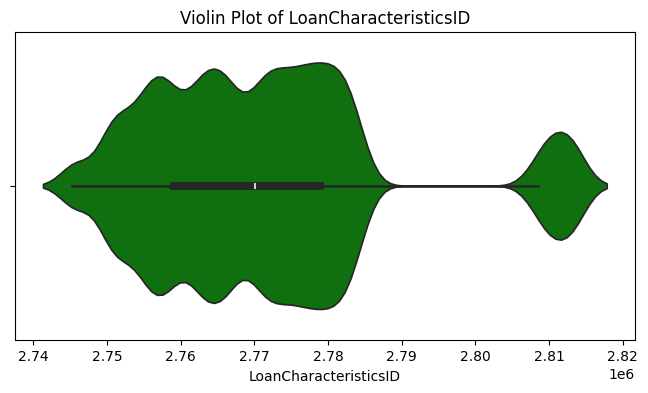

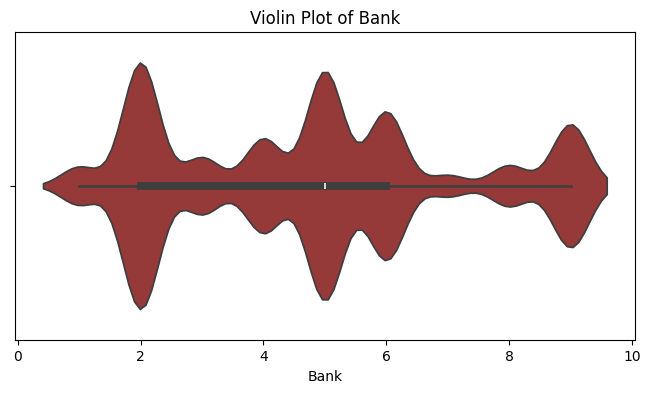

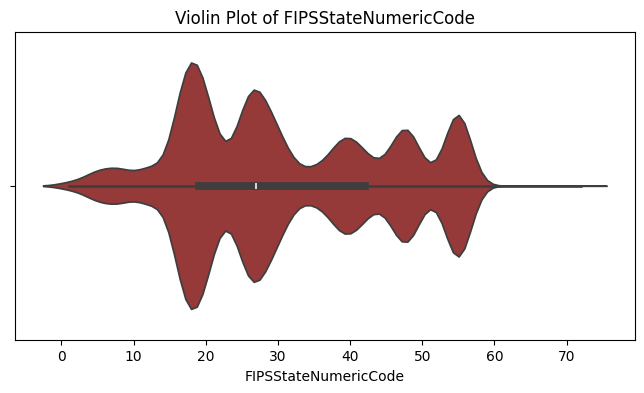

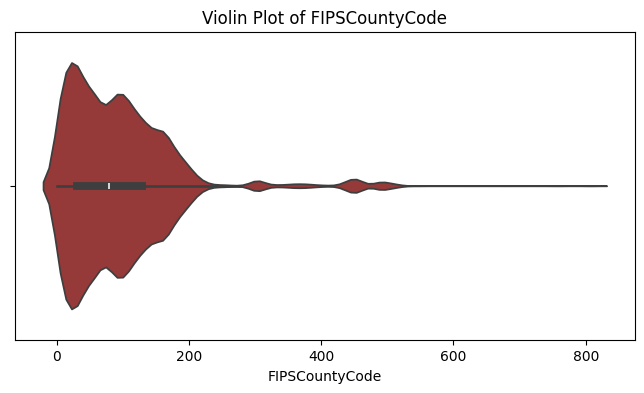

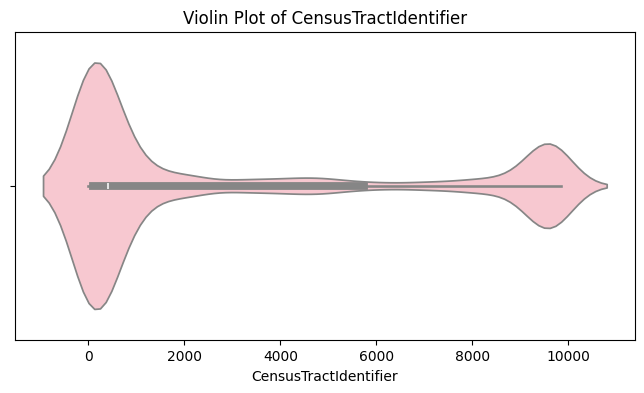

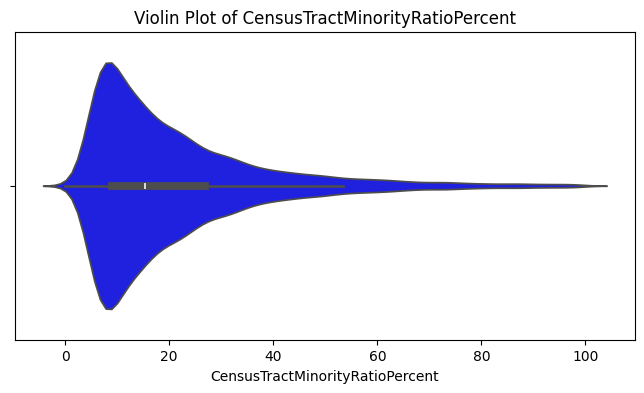

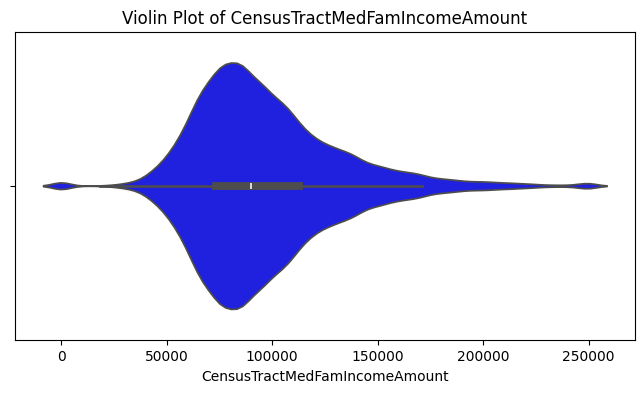

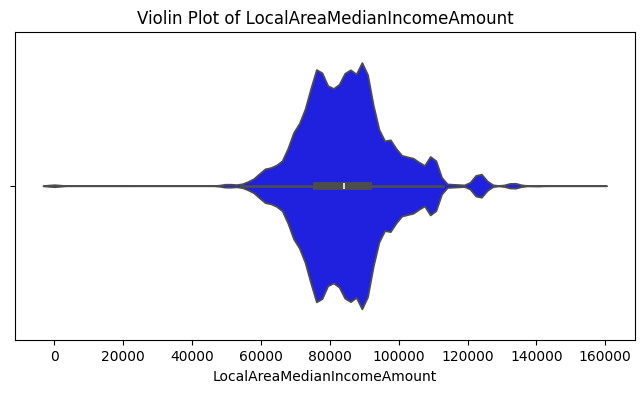

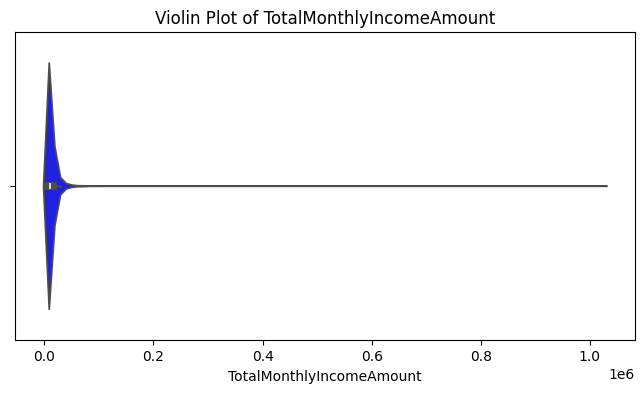

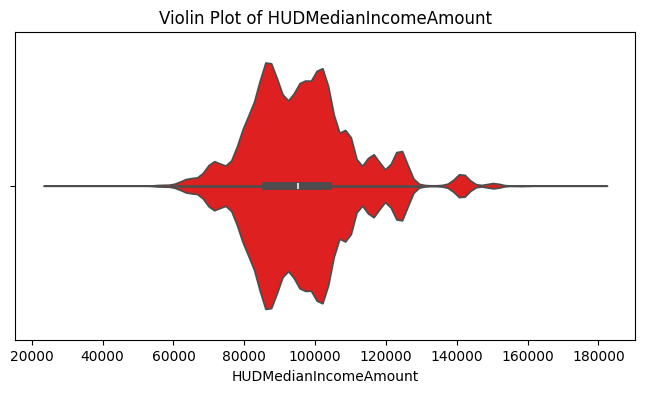

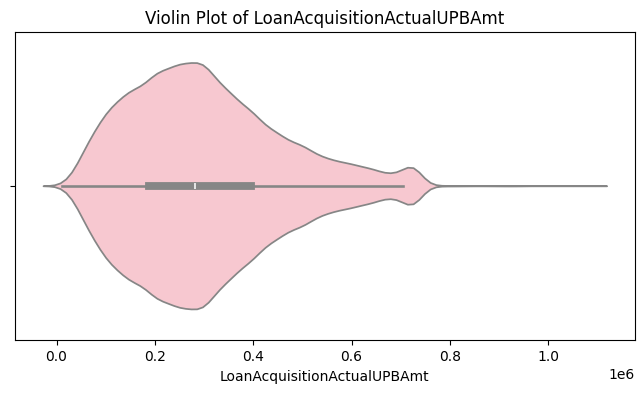

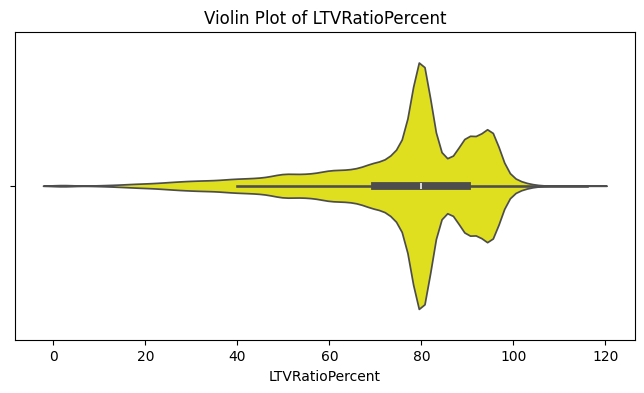

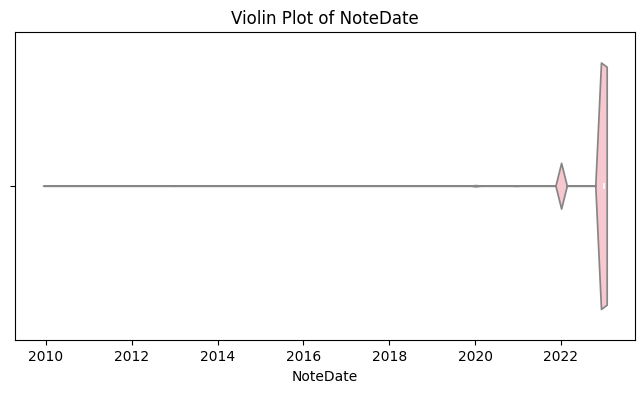

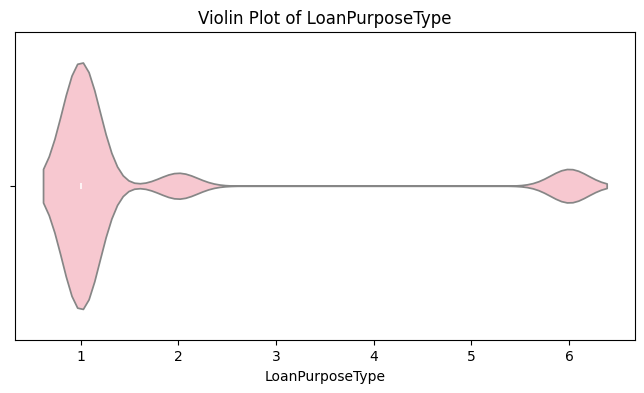

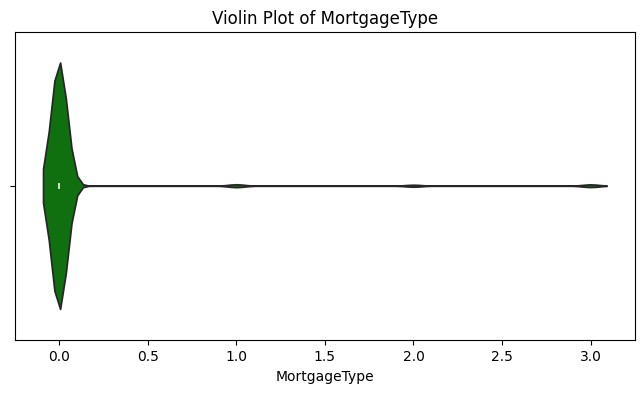

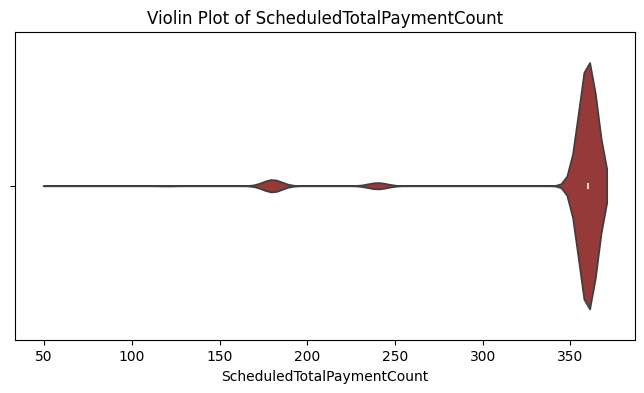

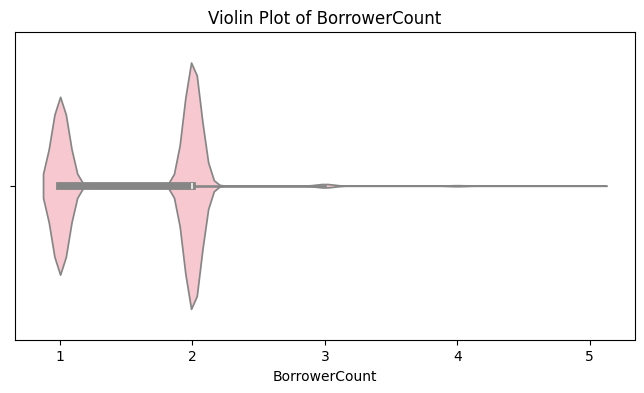

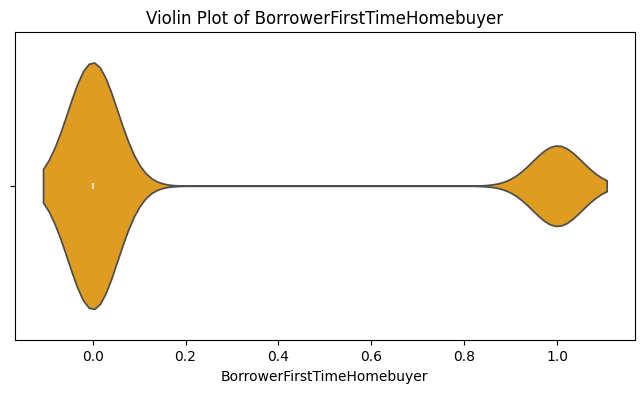

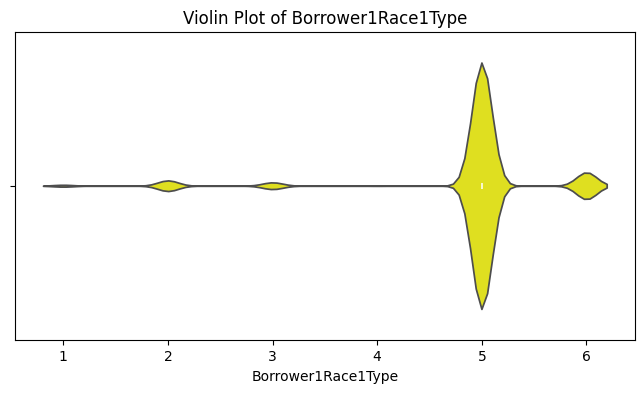

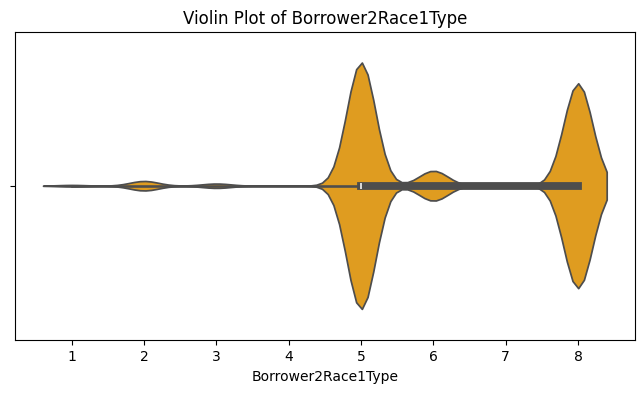

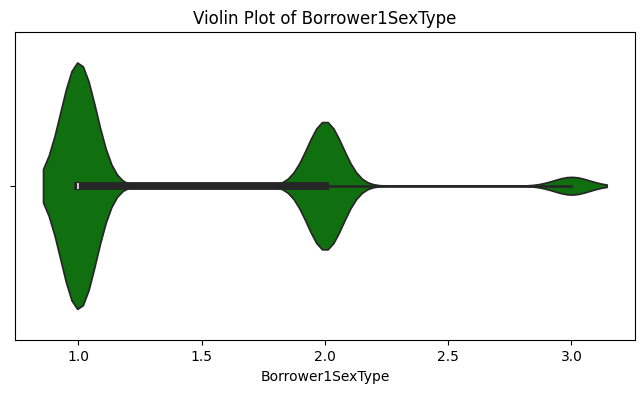

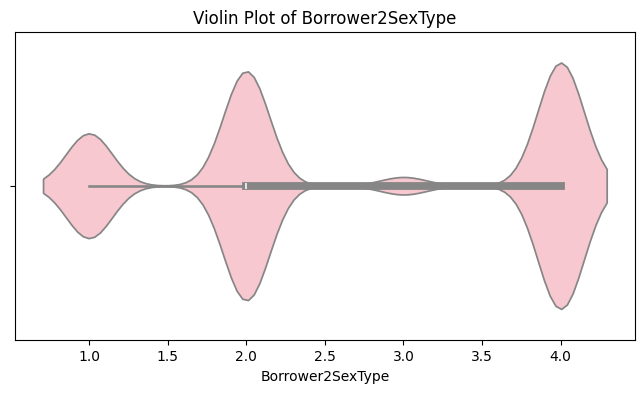

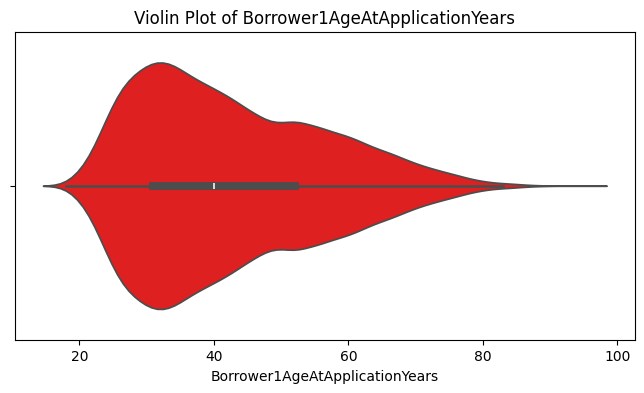

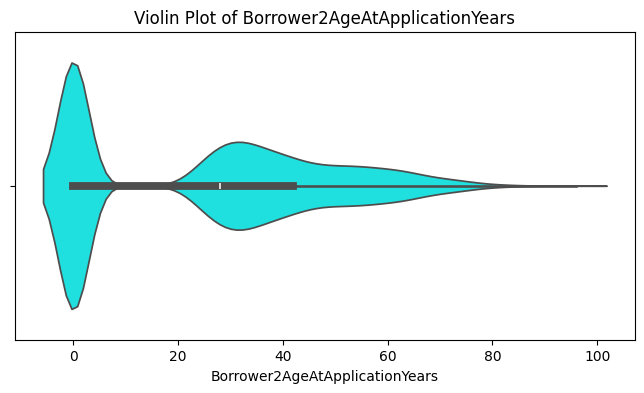

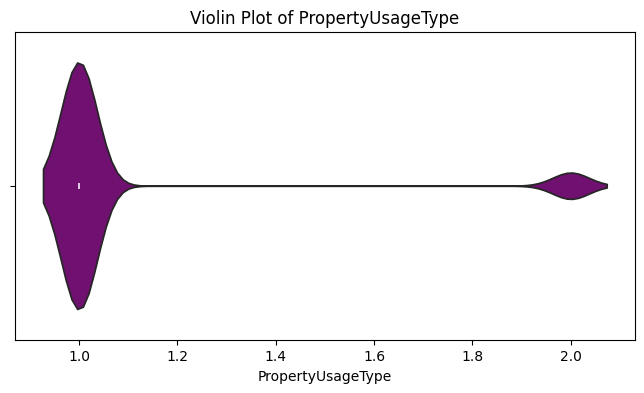

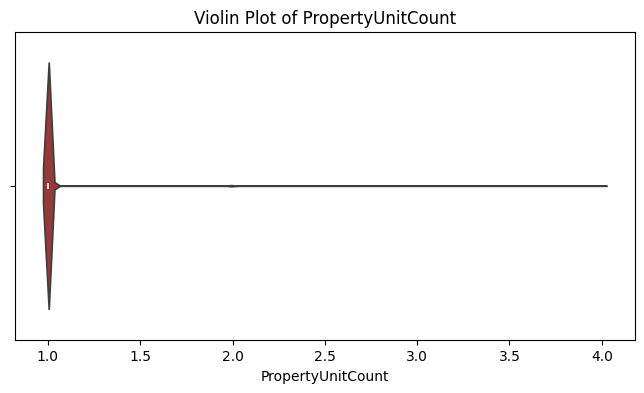

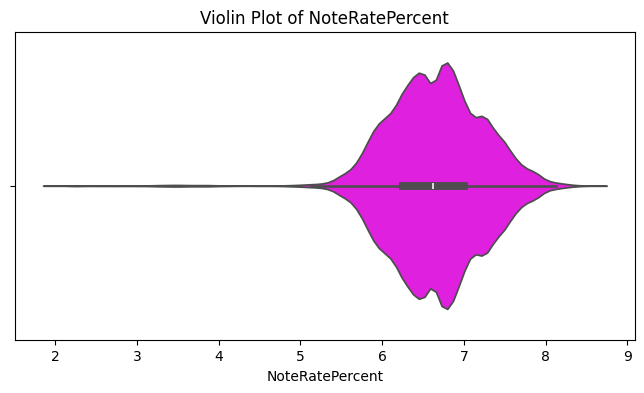

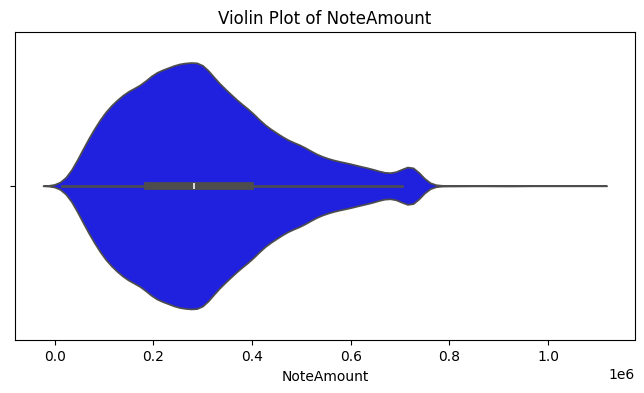

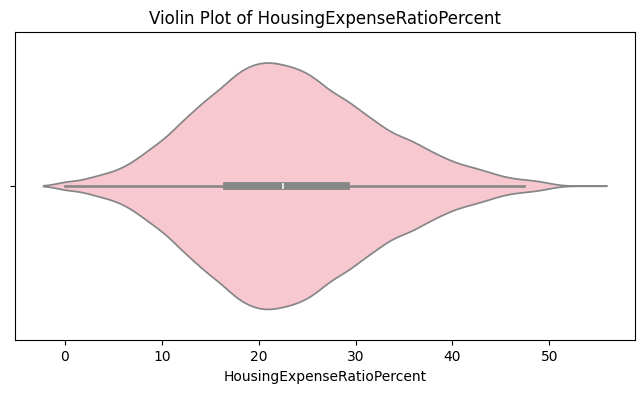

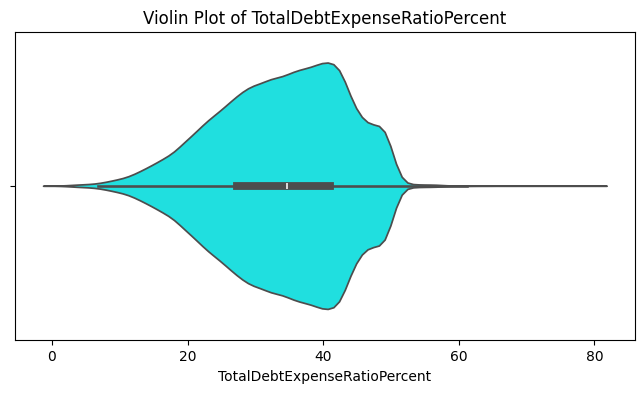

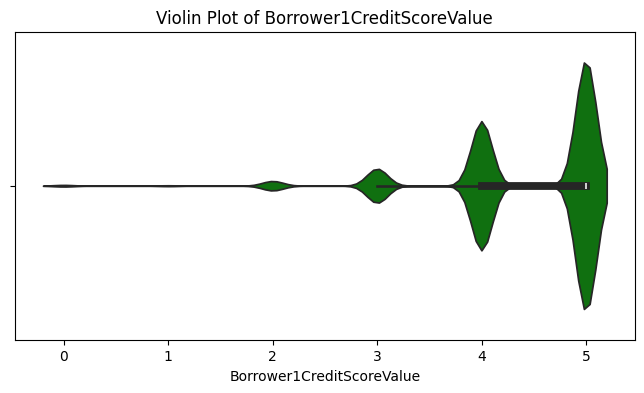

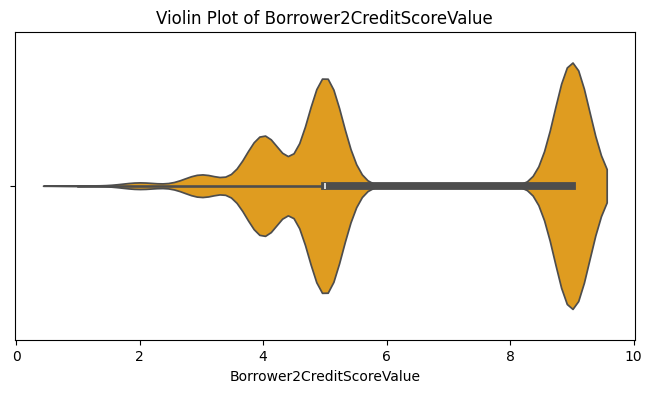

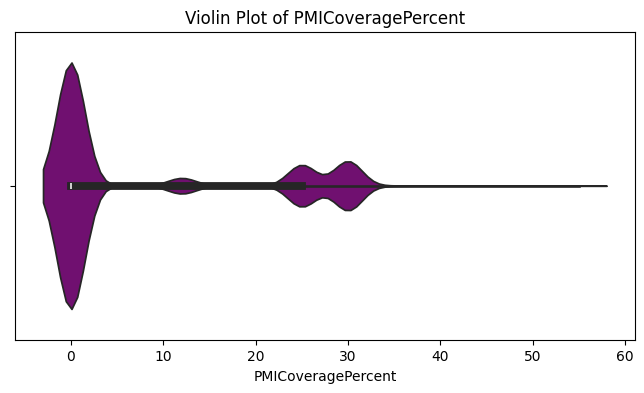

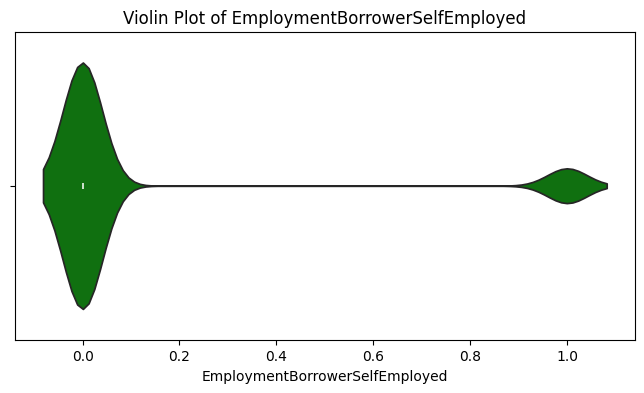

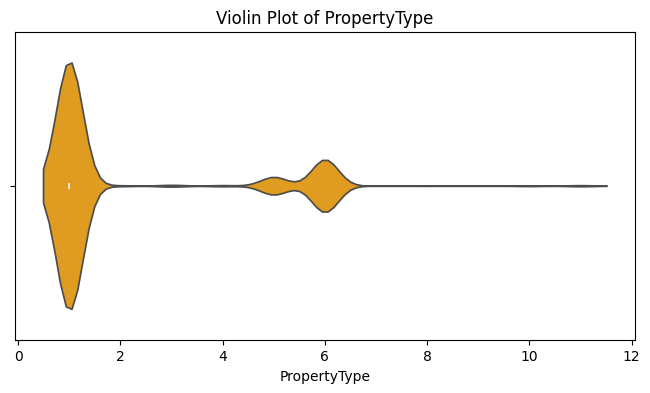

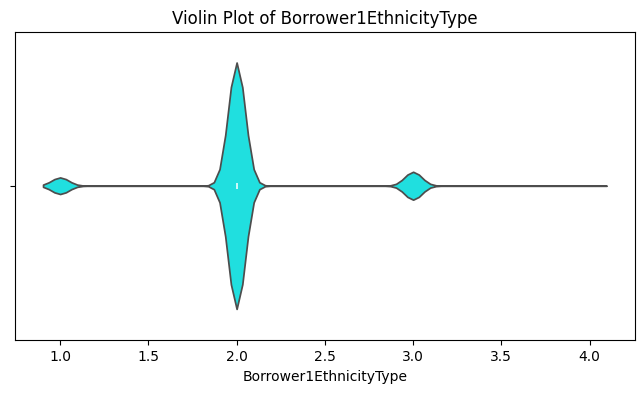

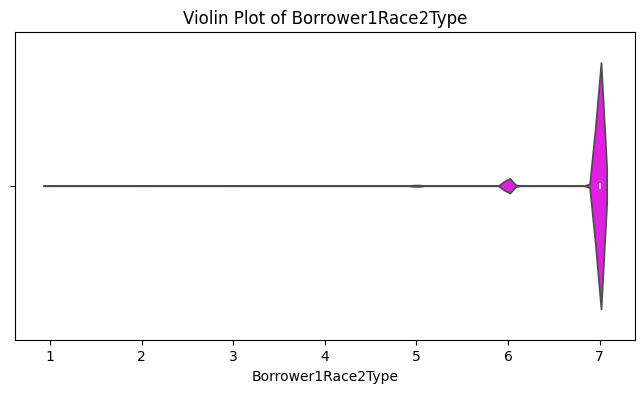

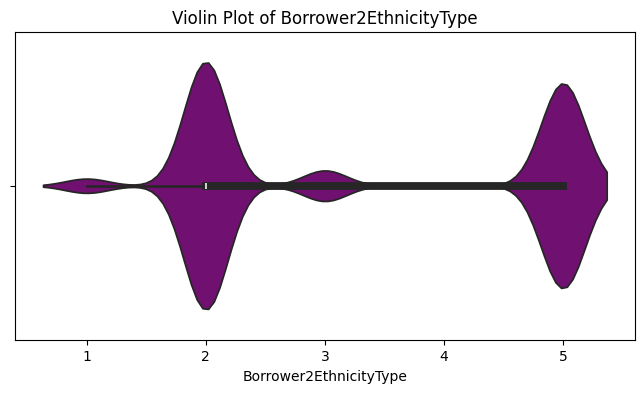

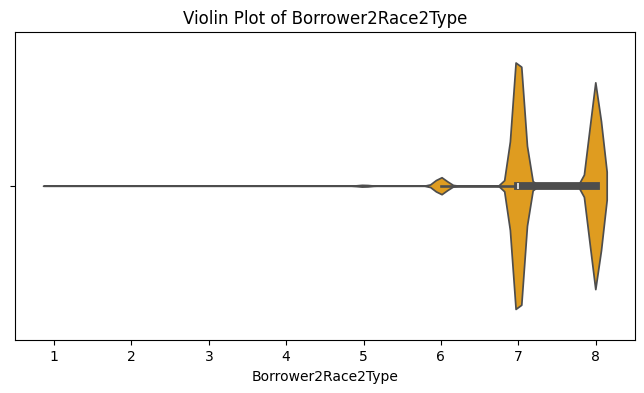

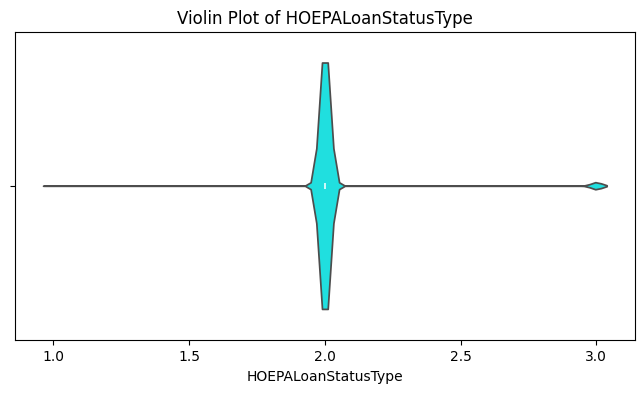

In [42]:


# Define a list of colors for variation
colors = ['blue', 'green', 'red', 'purple', 'orange', 'cyan', 'magenta', 'yellow', 'pink', 'brown']

# Selecting numeric features for visualization
numeric_features = numerical_df.select_dtypes(include=[float, int]).columns

# Creating violin plots for each numeric feature with different colors
for feature in numeric_features:
    plt.figure(figsize=(8, 4))
    color_choice = random.choice(colors)  # Randomly select a color for each plot
    sns.violinplot(x=numerical_df[feature], color=color_choice)
    plt.title(f'Violin Plot of {feature}')
    plt.show()


# scaling

In [45]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# # Fit and transform all numeric columns
# df_standardized= pd.DataFrame(scaler.fit_transform(numerical_df), columns=numerical_df.columns)


In [46]:
# df_standardized.head().T

In [47]:
# df_standardized.info()

## VIF (perform with scaling)

In [49]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

df_numeric = numerical_df.copy()

# Drop columns with constant values (as VIF cannot be computed for them)
df_numeric = df_numeric.loc[:, df_numeric.nunique() > 1]

# Compute VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = df_numeric.columns
vif_data["VIF"] = [variance_inflation_factor(df_numeric.values, i) for i in range(df_numeric.shape[1])]

# Display VIF scores
print(vif_data.sort_values(by="VIF", ascending=False))

                            Feature           VIF
12                         NoteDate  45889.148538
0             LoanCharacteristicsID  44511.265953
27                       NoteAmount   2982.412014
10      LoanAcquisitionActualUPBAmt   2972.103245
38               Borrower2Race2Type   1327.089848
36               Borrower1Race2Type    741.940294
7       LocalAreaMedianIncomeAmount    741.152729
9             HUDMedianIncomeAmount    729.701558
39              HOEPALoanStatusType    232.574815
19               Borrower2Race1Type    181.287603
37           Borrower2EthnicityType    156.109371
26                  NoteRatePercent    154.519019
16                    BorrowerCount    127.347597
31        Borrower2CreditScoreValue    109.841270
25                PropertyUnitCount     92.824811
15       ScheduledTotalPaymentCount     80.797829
21                 Borrower2SexType     64.945656
18               Borrower1Race1Type     57.265010
11                  LTVRatioPercent     43.645918


In [50]:
# for regression we will consider only note amount as we are predicting noterateinterest which is more preferred for predicting
#🚨 Real Talk: If you’re doing performance or risk analysis, UPB (*LoanAcquisitionActualUPBAmt*) is usually the better choice.
#Why? Because the risk (or remaining exposure) is based on how much is still outstanding, not what was originally borrowed.

In [51]:
#w eare dropping Borrower2EthnicityType as it has high multicollinearity with borrower2creditscorevalue, borrower2race1type

In [52]:
df_numeric.drop(columns=['LoanAcquisitionActualUPBAmt','Borrower2EthnicityType'], errors='ignore', inplace=True)

In [53]:
df_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34273 entries, 0 to 34272
Data columns (total 38 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   LoanCharacteristicsID            34273 non-null  int64  
 1   Bank                             34273 non-null  int64  
 2   FIPSStateNumericCode             34273 non-null  int64  
 3   FIPSCountyCode                   34273 non-null  int64  
 4   CensusTractIdentifier            34273 non-null  float64
 5   CensusTractMinorityRatioPercent  34273 non-null  float64
 6   CensusTractMedFamIncomeAmount    34273 non-null  int64  
 7   LocalAreaMedianIncomeAmount      34273 non-null  int64  
 8   TotalMonthlyIncomeAmount         34273 non-null  int64  
 9   HUDMedianIncomeAmount            34273 non-null  int64  
 10  LTVRatioPercent                  34273 non-null  float64
 11  NoteDate                         34273 non-null  int64  
 12  LoanPurposeType   

In [54]:
df_numeric = df_numeric.loc[:, df_numeric.nunique() > 1]

# Compute VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = df_numeric.columns
vif_data["VIF"] = [variance_inflation_factor(df_numeric.values, i) for i in range(df_numeric.shape[1])]

# Display VIF scores
print(vif_data.sort_values(by="VIF", ascending=False))

                            Feature           VIF
11                         NoteDate  45867.996585
0             LoanCharacteristicsID  44471.532508
36               Borrower2Race2Type   1310.963683
35               Borrower1Race2Type    740.285049
7       LocalAreaMedianIncomeAmount    723.981672
9             HUDMedianIncomeAmount    715.892634
37              HOEPALoanStatusType    232.549514
18               Borrower2Race1Type    163.184620
25                  NoteRatePercent    153.050171
15                    BorrowerCount    117.645427
30        Borrower2CreditScoreValue     96.811177
24                PropertyUnitCount     92.818116
14       ScheduledTotalPaymentCount     80.721293
17               Borrower1Race1Type     56.107536
20                 Borrower2SexType     55.890413
10                  LTVRatioPercent     43.628254
29        Borrower1CreditScoreValue     37.753632
34           Borrower1EthnicityType     35.098304
28     TotalDebtExpenseRatioPercent     27.040738


In [55]:
#we can create a correlation matrix to figure out which among localareamedianincomeamount and HUD is influential in predicting target var

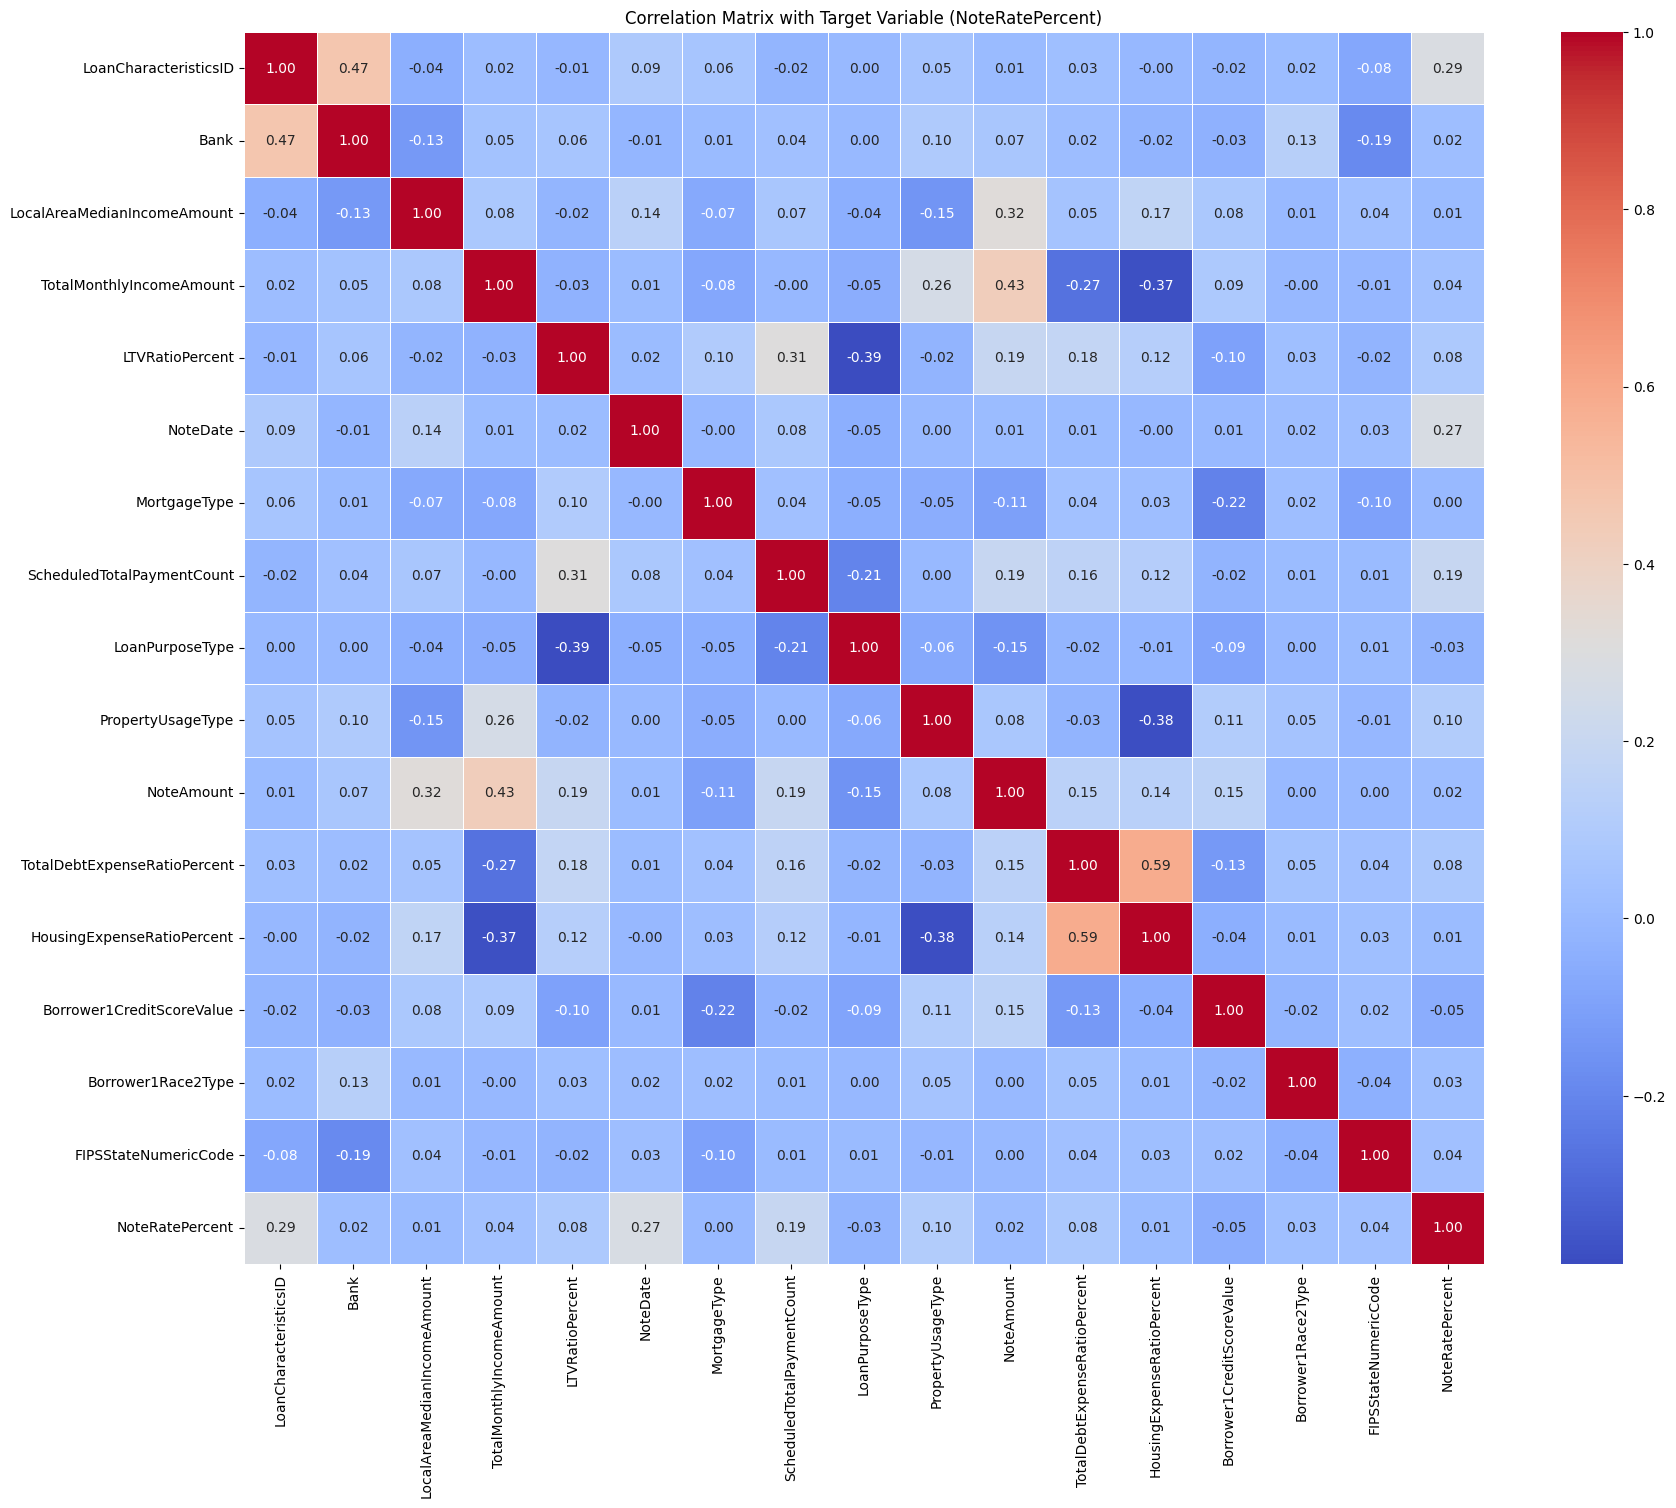

In [56]:

# Selecting relevant columns
#selected_columns = ['LocalAreaMedianIncomeAmount','BorrowerCount','TotalMonthlyIncomeAmount', 'Bank','LTVRatioPercent','NoteRatePercent']
selected_columns = ['LoanCharacteristicsID', 'Bank','LocalAreaMedianIncomeAmount',
                     'TotalMonthlyIncomeAmount', 'LTVRatioPercent', 'NoteDate',
                     'MortgageType', 'ScheduledTotalPaymentCount','LoanPurposeType',
                      'PropertyUsageType', 'NoteAmount','TotalDebtExpenseRatioPercent',
                     'HousingExpenseRatioPercent','Borrower1CreditScoreValue',
                    'Borrower1Race2Type','FIPSStateNumericCode', 'NoteRatePercent']
# Compute correlation matrix
corr_matrix = df_numeric[selected_columns].corr()

# Plot correlation heatmap
plt.figure(figsize=(20, 16))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix with Target Variable (NoteRatePercent)")
plt.show()


In [57]:
#based on above matrix we will drop HUD

In [58]:
df_numeric.drop(columns=['HUDMedianIncomeAmount'], errors='ignore', inplace=True)

In [59]:
df_numeric = df_numeric.loc[:, df_numeric.nunique() > 1]

# Compute VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = df_numeric.columns
vif_data["VIF"] = [variance_inflation_factor(df_numeric.values, i) for i in range(df_numeric.shape[1])]

# Display VIF scores
print(vif_data.sort_values(by="VIF", ascending=False))

                            Feature           VIF
10                         NoteDate  45787.846583
0             LoanCharacteristicsID  44345.480885
35               Borrower2Race2Type   1310.902379
34               Borrower1Race2Type    739.867504
36              HOEPALoanStatusType    232.516662
17               Borrower2Race1Type    163.184224
24                  NoteRatePercent    150.424710
14                    BorrowerCount    117.641473
29        Borrower2CreditScoreValue     96.809728
23                PropertyUnitCount     92.817890
13       ScheduledTotalPaymentCount     80.716355
7       LocalAreaMedianIncomeAmount     65.469173
16               Borrower1Race1Type     56.096779
19                 Borrower2SexType     55.883402
9                   LTVRatioPercent     43.595721
28        Borrower1CreditScoreValue     37.753595
33           Borrower1EthnicityType     35.097461
27     TotalDebtExpenseRatioPercent     27.040574
22                PropertyUsageType     26.827741


In [60]:
df_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34273 entries, 0 to 34272
Data columns (total 37 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   LoanCharacteristicsID            34273 non-null  int64  
 1   Bank                             34273 non-null  int64  
 2   FIPSStateNumericCode             34273 non-null  int64  
 3   FIPSCountyCode                   34273 non-null  int64  
 4   CensusTractIdentifier            34273 non-null  float64
 5   CensusTractMinorityRatioPercent  34273 non-null  float64
 6   CensusTractMedFamIncomeAmount    34273 non-null  int64  
 7   LocalAreaMedianIncomeAmount      34273 non-null  int64  
 8   TotalMonthlyIncomeAmount         34273 non-null  int64  
 9   LTVRatioPercent                  34273 non-null  float64
 10  NoteDate                         34273 non-null  int64  
 11  LoanPurposeType                  34273 non-null  int64  
 12  MortgageType      

### Model feature selection

In [62]:
# Compute correlation matrix
correlation_matrix = df_numeric.corr()

# Select features with strong correlation (absolute value > 0.1)
selected_features_corr = correlation_matrix['NoteRatePercent'].abs().sort_values(ascending=False)
print(selected_features_corr)


NoteRatePercent                    1.000000
LoanCharacteristicsID              0.286922
NoteDate                           0.273576
ScheduledTotalPaymentCount         0.193676
PropertyUsageType                  0.104384
LTVRatioPercent                    0.083666
TotalDebtExpenseRatioPercent       0.081271
Borrower1CreditScoreValue          0.051008
HOEPALoanStatusType                0.049562
CensusTractIdentifier              0.045103
TotalMonthlyIncomeAmount           0.044148
PMICoveragePercent                 0.042881
EmploymentBorrowerSelfEmployed     0.037527
FIPSStateNumericCode               0.036468
Borrower1Race2Type                 0.031371
Borrower2CreditScoreValue          0.029480
BorrowerCount                      0.025868
LoanPurposeType                    0.025423
Borrower2AgeAtApplicationYears     0.024607
Borrower2SexType                   0.024274
CensusTractMinorityRatioPercent    0.023396
PropertyType                       0.023331
Bank                            

In [63]:
from sklearn.feature_selection import mutual_info_regression

X_num = df_numeric.select_dtypes(include=['float64', 'int64']).drop(columns=['NoteRatePercent'])
y = df_numeric['NoteRatePercent']

# Compute mutual information
mi_scores = mutual_info_regression(X_num, y)
mi_scores = pd.Series(mi_scores, index=X_num.columns).sort_values(ascending=False)
print(mi_scores)


LoanCharacteristicsID              0.488532
LocalAreaMedianIncomeAmount        0.100428
FIPSStateNumericCode               0.072700
Bank                               0.070451
CensusTractIdentifier              0.034182
FIPSCountyCode                     0.031315
NoteDate                           0.023367
CensusTractMedFamIncomeAmount      0.021141
ScheduledTotalPaymentCount         0.020253
CensusTractMinorityRatioPercent    0.020015
TotalDebtExpenseRatioPercent       0.014333
LoanPurposeType                    0.012392
PropertyUsageType                  0.012331
PMICoveragePercent                 0.008575
NoteAmount                         0.007604
LTVRatioPercent                    0.007114
TotalMonthlyIncomeAmount           0.006317
BorrowerFirstTimeHomebuyer         0.004536
Borrower1AgeAtApplicationYears     0.003565
Borrower1Race1Type                 0.003553
Borrower1EthnicityType             0.003434
Borrower1CreditScoreValue          0.003428
Borrower1Race2Type              

## Model

In [64]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [65]:
# from sklearn.feature_selection import SequentialFeatureSelector
# from xgboost import XGBRegressor

# # Define the model
# xgb = XGBRegressor(objective='reg:squarederror', random_state=42, verbosity=0)
# X=X_num 
# # Perform Forward Stepwise Selection
# sfs_forward = SequentialFeatureSelector(xgb, n_features_to_select=10, direction='forward', cv=5)
# sfs_forward.fit(X, y)

# # Get selected feature names
# selected_features_forward = X.columns[sfs_forward.get_support()]
# print("Selected Features using Forward Selection:", selected_features_forward)


In [66]:
# RFE

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Initialize model
model = LinearRegression()
X=X_num 
# Perform RFE
selector = RFE(model, n_features_to_select=15)  # Keep top 15 features
X_rfe = selector.fit_transform(X, y)

# Get selected features
selected_features = X.columns[selector.support_]
print("Selected Features using RFE:", selected_features)

Selected Features using RFE: Index(['NoteDate', 'LoanPurposeType', 'MortgageType',
       'BorrowerFirstTimeHomebuyer', 'Borrower1Race1Type', 'PropertyUsageType',
       'PropertyUnitCount', 'TotalDebtExpenseRatioPercent',
       'Borrower1CreditScoreValue', 'Borrower2CreditScoreValue',
       'EmploymentBorrowerSelfEmployed', 'PropertyType',
       'Borrower1EthnicityType', 'Borrower1Race2Type', 'Borrower2Race2Type'],
      dtype='object')


In [67]:
from sklearn.feature_selection import RFE
from xgboost import XGBRegressor

# Define the model
xgb = XGBRegressor(objective='reg:squarederror', random_state=42, verbosity=0)
X = X_num 
# Perform RFE to select top features
selector = RFE(xgb, n_features_to_select=10)  # Change n_features_to_select as needed
selector.fit(X, y)

# Get selected feature names
selected_features_rfe = X.columns[selector.support_]
print("Selected Features using RFE:", selected_features_rfe)


Selected Features using RFE: Index(['LoanCharacteristicsID', 'Bank', 'FIPSStateNumericCode', 'NoteDate',
       'LoanPurposeType', 'MortgageType', 'ScheduledTotalPaymentCount',
       'PropertyUsageType', 'Borrower1Race2Type', 'HOEPALoanStatusType'],
      dtype='object')


MSE: 0.1441362742159211
MAE: 0.2909639236939901
RMSE: 0.37965283380467624
R² Score: 0.5987728642566434


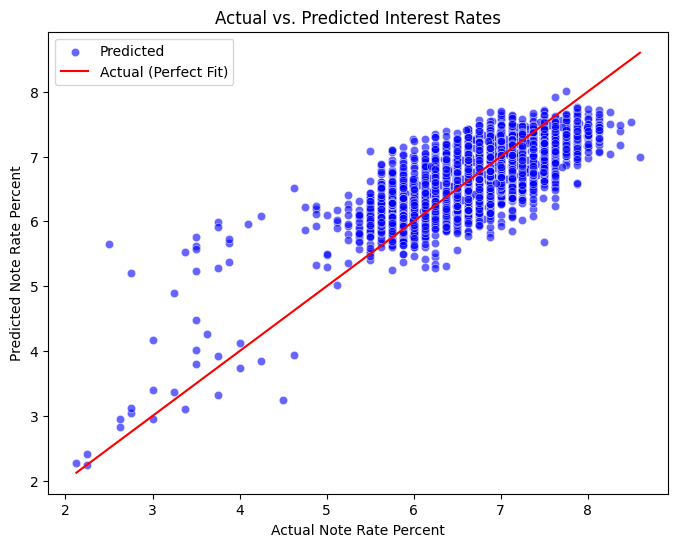

In [68]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from xgboost import XGBRegressor

# Define the selected features from RFE
selected_features = ['LoanCharacteristicsID', 'Bank', 'LocalAreaMedianIncomeAmount',
                     'TotalMonthlyIncomeAmount', 'LTVRatioPercent', 'NoteDate',
                     'MortgageType', 'ScheduledTotalPaymentCount', 'LoanPurposeType',
                     'PropertyUsageType', 'NoteAmount', 'TotalDebtExpenseRatioPercent',
                     'HousingExpenseRatioPercent', 'Borrower1CreditScoreValue',
                     'Borrower1Race2Type', 'FIPSStateNumericCode']

# Step 1: Select only the required columns
X = df_numeric[selected_features]
y = df_numeric[['NoteRatePercent']]  # Keeping as DataFrame for inverse transform later

# Step 2: Handle missing values
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X)
y_imputed = imputer.fit_transform(y)  # Ensure no missing values in target

# Step 3: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y_imputed, test_size=0.2, random_state=42)

# Step 4: Create and Train XGBoost Model
model = XGBRegressor(objective='reg:squarederror', random_state=42, verbosity=0)
model.fit(X_train, y_train.ravel())  # Flatten target variable

# Step 5: Make Predictions
y_pred = model.predict(X_test)


# Step 6: Evaluate Model
mse_xg = mean_squared_error(y_test, y_pred)
mae_xg = mean_absolute_error(y_test, y_pred)
rmse_xg = np.sqrt(mse_xg)
r2_xg = r2_score(y_test, y_pred)

# Step 7: Print Metrics
print("MSE:", mse_xg)
print("MAE:", mae_xg)
print("RMSE:", rmse_xg)
print("R² Score:", r2_xg)

# Step 8: Visualization - Actual vs Predicted
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test.flatten(), y=y_pred, alpha=0.6, color="blue", label="Predicted")
sns.lineplot(x=y_test.flatten(), y=y_test.flatten(), color="red", label="Actual (Perfect Fit)")
plt.xlabel("Actual Note Rate Percent")
plt.ylabel("Predicted Note Rate Percent")
plt.title("Actual vs. Predicted Interest Rates")
plt.legend()
plt.show()


In [69]:
# Train the model
xgb.fit(X, y)

# Get feature importance scores
feature_importances = xgb.feature_importances_

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display top features
print("Feature Importance:\n", importance_df)


Feature Importance:
                          Feature  Importance
5                       NoteDate    0.314291
0          LoanCharacteristicsID    0.178819
7     ScheduledTotalPaymentCount    0.143028
9              PropertyUsageType    0.074350
6                   MortgageType    0.053923
1                           Bank    0.033857
14            Borrower1Race2Type    0.031627
13     Borrower1CreditScoreValue    0.028919
8                LoanPurposeType    0.027584
15          FIPSStateNumericCode    0.023594
10                    NoteAmount    0.018262
4                LTVRatioPercent    0.015608
3       TotalMonthlyIncomeAmount    0.015040
2    LocalAreaMedianIncomeAmount    0.014603
12    HousingExpenseRatioPercent    0.013936
11  TotalDebtExpenseRatioPercent    0.012557


In [70]:
from sklearn.feature_selection import mutual_info_regression

# Compute mutual information scores
mi_scores = mutual_info_regression(X, y)

# Create a DataFrame
mi_df = pd.DataFrame({'Feature': X.columns, 'MI Score': mi_scores})
mi_df = mi_df.sort_values(by='MI Score', ascending=False)

# Display top features
print("Mutual Information Scores:\n", mi_df)


C:\Users\Chirag\Desktop\College_python_venvs\capstone\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mutual Information Scores:
                          Feature  MI Score
0          LoanCharacteristicsID  0.487560
2    LocalAreaMedianIncomeAmount  0.104327
15          FIPSStateNumericCode  0.078086
1                           Bank  0.063311
5                       NoteDate  0.028537
7     ScheduledTotalPaymentCount  0.022410
8                LoanPurposeType  0.015748
4                LTVRatioPercent  0.013997
11  TotalDebtExpenseRatioPercent  0.011762
10                    NoteAmount  0.006943
9              PropertyUsageType  0.006536
3       TotalMonthlyIncomeAmount  0.006366
12    HousingExpenseRatioPercent  0.003022
13     Borrower1CreditScoreValue  0.002360
14            Borrower1Race2Type  0.000369
6                   MortgageType  0.000000


In [71]:
#XGBOOST
# Step 1: Import Required Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from xgboost import XGBRegressor



# Step 4: Separate Features and Target
X = df_numeric.drop(columns=['NoteRatePercent'])
y = df_numeric['NoteRatePercent']

# Step 5: Identify Numeric and Categorical Features
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

# Step 6: Build Preprocessing Pipelines
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

# Step 7: Create XGBoost Pipeline
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', XGBRegressor(objective='reg:squarederror', random_state=42, verbosity=0))
])

# Step 8: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 9: Fit the Model
model_pipeline.fit(X_train, y_train)

# Step 10: Make Predictions
y_pred = model_pipeline.predict(X_test)

# Step 11: Evaluate Model
mse= mean_squared_error(y_test, y_pred)
mae= mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Step 12: Print Metrics
print("MSE:", mse)
print("MAE:", mae)
print("RMSE:", rmse)
print("R² Score:", r2)


MSE: 0.14728905327244005
MAE: 0.2926492564444121
RMSE: 0.38378255988572496
R² Score: 0.5899965828010554


MSE: 0.1441362742159211
MAE: 0.2909639236939901
RMSE: 0.37965283380467624
R² Score: 0.5987728642566434


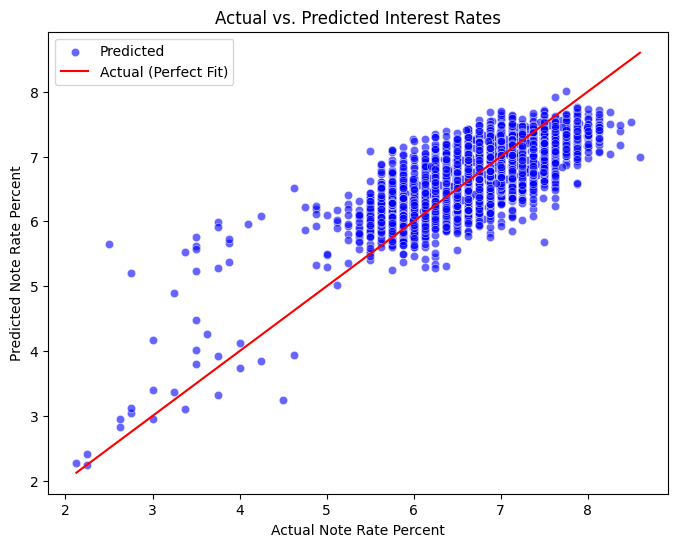

In [72]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from xgboost import XGBRegressor

# Define the selected features from RFE
selected_features = ['LoanCharacteristicsID', 'Bank', 'LocalAreaMedianIncomeAmount',
                     'TotalMonthlyIncomeAmount', 'LTVRatioPercent', 'NoteDate',
                     'MortgageType', 'ScheduledTotalPaymentCount', 'LoanPurposeType',
                     'PropertyUsageType', 'NoteAmount', 'TotalDebtExpenseRatioPercent',
                     'HousingExpenseRatioPercent', 'Borrower1CreditScoreValue',
                     'Borrower1Race2Type', 'FIPSStateNumericCode']

# Step 1: Select only the required columns
X = df_numeric[selected_features]
y = df_numeric[['NoteRatePercent']]  # Keeping as DataFrame for inverse transform later

# Step 2: Handle missing values
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X)
y_imputed = imputer.fit_transform(y)  # Ensure no missing values in target

# Step 3: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y_imputed, test_size=0.2, random_state=42)

# Step 4: Create and Train XGBoost Model
model = XGBRegressor(objective='reg:squarederror', random_state=42, verbosity=0)
model.fit(X_train, y_train.ravel())  # Flatten target variable

# Step 5: Make Predictions
y_pred = model.predict(X_test)


# Step 6: Evaluate Model
mse_xg = mean_squared_error(y_test, y_pred)
mae_xg = mean_absolute_error(y_test, y_pred)
rmse_xg = np.sqrt(mse_xg)
r2_xg = r2_score(y_test, y_pred)

# Step 7: Print Metrics
print("MSE:", mse_xg)
print("MAE:", mae_xg)
print("RMSE:", rmse_xg)
print("R² Score:", r2_xg)

# Step 8: Visualization - Actual vs Predicted
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test.flatten(), y=y_pred, alpha=0.6, color="blue", label="Predicted")
sns.lineplot(x=y_test.flatten(), y=y_test.flatten(), color="red", label="Actual (Perfect Fit)")
plt.xlabel("Actual Note Rate Percent")
plt.ylabel("Predicted Note Rate Percent")
plt.title("Actual vs. Predicted Interest Rates")
plt.legend()
plt.show()


In [73]:

print--

SyntaxError: invalid syntax (717264624.py, line 1)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
df = df_numeric  # Replace with actual file path

# Define target variable
y = df["NoteRatePercent"]

# Define selected features
features = ['LoanCharacteristicsID', 'Bank','LocalAreaMedianIncomeAmount',
                     'TotalMonthlyIncomeAmount', 'LTVRatioPercent', 'NoteDate',
                     'MortgageType', 'ScheduledTotalPaymentCount','LoanPurposeType',
                      'PropertyUsageType', 'NoteAmount','TotalDebtExpenseRatioPercent',
                     'HousingExpenseRatioPercent','Borrower1CreditScoreValue',
                    'Borrower1Race2Type','FIPSStateNumericCode']

X = df[features]

# Handle missing values (fill with median)
#X = X.fillna(X.median())


# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate model
r2 = r2_score(y_test, y_pred)
mse= mean_squared_error(y_test, y_pred)
mae= mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Model Performance: Linear Regression")
print(f"R² Score: {r2:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")

In [ ]:
print--

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
df = df_numeric

# Define dependent variable
y = df["NoteRatePercent"]

# Define independent variables (all except the target)
X = df.drop(columns=["NoteRatePercent"])  # Exclude unique ID

# Identify categorical and numerical columns
categorical_features = ["Bank", "PropertyUsageType", "LoanPurposeType", "MortgageType", "PropertyType"]
numerical_features = [col for col in X.columns if col not in categorical_features]

# Define preprocessing pipeline
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), numerical_features),
    ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features)
])

# Create a pipeline for regression
pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("model", LinearRegression())
])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Model Performance:")
print(f"R² Score: {r2:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

# Visualization: Actual vs. Predicted
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.xlabel("Actual Note Rate Percent")
plt.ylabel("Predicted Note Rate Percent")
plt.title("Actual vs. Predicted Interest Rates")
plt.show()


In [ ]:
from sklearn.linear_model import LassoCV

# Use Lasso for feature selection
lasso = LassoCV(cv=5, random_state=42).fit(X_train, y_train)

# Display feature importance
feature_importance = pd.Series(lasso.coef_, index=X.columns)
print("Feature Importance:\n", feature_importance.sort_values(ascending=False))


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Create a pipeline with polynomial features
poly_pipeline = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())

# Train & evaluate the new model
poly_pipeline.fit(X_train, y_train)
y_pred_poly = poly_pipeline.predict(X_test)

# Evaluate the model
r2_poly = r2_score(y_test, y_pred_poly)
mae_poly= mean_absolute_error(y_test, y_pred_poly)
mse_poly= mean_squared_error(y_test, y_pred_poly)
rmse_poly = np.sqrt(mean_squared_error(y_test, y_pred_poly))

print(f"Polynomial Regression Performance:")
print(f"MAE: {mae_poly:.4f}")
print(f"MSE: {mse_poly:.4f}")
print(f"R² Score: {r2_poly:.4f}")
print(f"RMSE: {rmse_poly:.4f}")


In [ ]:
from sklearn.linear_model import RidgeCV

ridge = RidgeCV(alphas=[0.1, 1.0, 10.0], cv=5)
ridge.fit(X_train, y_train)

# Evaluate the model
y_pred_ridge = ridge.predict(X_test)
r2_ridge = r2_score(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))

print(f"Ridge Regression Performance:")
print(f"R² Score: {r2_ridge:.4f}")
print(f"RMSE: {rmse_ridge:.4f}")


In [ ]:
!pip install xgboost

In [ ]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(n_estimators=500, learning_rate=0.1, max_depth=5, random_state=42)
xgb_model.fit(X_train, y_train)

# Evaluate XGBoost model
y_pred_xgb = xgb_model.predict(X_test)
r2_xgb = r2_score(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))

print(f"XGBoost Model Performance:")
print(f"R² Score: {r2_xgb:.4f}")
print(f"RMSE: {rmse_xgb:.4f}")


In [ ]:
# Create a DataFrame to compare actual vs. predicted values
df_comparison = pd.DataFrame({
    "Actual NoteRatePercent": y_test.values,
    "Predicted NoteRatePercent": y_pred
})

# Display the first 100 observations
print(df_comparison.head(100))


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Assuming df_numeric contains your dataset
X = df_numeric[[
    'LoanCharacteristicsID', 'Bank','LocalAreaMedianIncomeAmount',
                     'TotalMonthlyIncomeAmount', 'LTVRatioPercent', 'NoteDate',
                     'MortgageType', 'ScheduledTotalPaymentCount','LoanPurposeType',
                      'PropertyUsageType', 'NoteAmount','TotalDebtExpenseRatioPercent',
                     'HousingExpenseRatioPercent','Borrower1CreditScoreValue',
                    'Borrower1Race2Type','FIPSStateNumericCode'
]]
y = df_numeric['NoteRatePercent']

# Splitting dataset into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features (SVR performs better with scaled data)

# Training the SVR model
svr_model = SVR(kernel='rbf', C=1.0, epsilon=0.1)
svr_model.fit(X_train, y_train)

# Making predictions
y_pred = svr_model.predict(X_test)

# Model Evaluation
mse = mean_squared_error(y_test, y_pred)
mae_svm= mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae_svm}")
print(f"R2 Score: {r2}")
print(f"RMSE: {rmse}")


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score

# Assuming df_numeric contains your dataset
X = df_numeric[[
    'LoanCharacteristicsID', 'Bank', 'NoteDate',
            'ScheduledTotalPaymentCount', 'PropertyUsageType', 'LoanPurposeType',
            'NoteAmount', 'LTVRatioPercent', 'TotalMonthlyIncomeAmount',
            'HousingExpenseRatioPercent'
]]
y = df_numeric['NoteRatePercent']

# Splitting dataset into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features (XGBoost can handle unscaled data, but scaling can help in some cases)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Training the XGBoost model
xg_reg = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=0.3, learning_rate=0.1,
                          max_depth=5, alpha=10, n_estimators=100)
xg_reg.fit(X_train_scaled, y_train)

# Making predictions
y_pred = xg_reg.predict(X_test_scaled)

# Model Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")
print(f"RMSE: {rmse}")


In [ ]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.model_selection import train_test_split, GridSearchCV
# from sklearn.preprocessing import StandardScaler
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import mean_squared_error, r2_score

# # Assuming df_numeric contains your dataset
# X = df_numeric[[
#     'LoanCharacteristicsID', 'Bank', 'NoteDate',
#             'ScheduledTotalPaymentCount', 'PropertyUsageType', 'LoanPurposeType',
#             'NoteAmount', 'LTVRatioPercent', 'TotalMonthlyIncomeAmount',
#             'HousingExpenseRatioPercent'
# ]]
# y = df_numeric['NoteRatePercent']

# # Splitting dataset into train and test sets (80% train, 20% test)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Standardizing the features
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# # Define parameter grid for tuning
# param_grid = {
#     'n_estimators': [100, 200, 300],  # Number of trees
#     'max_depth': [None, 10, 20, 30],  # Maximum depth of trees
#     'min_samples_split': [2, 5, 10],  # Minimum samples required to split a node
#     'min_samples_leaf': [1, 2, 4],    # Minimum samples per leaf
#     'max_features': ['auto', 'sqrt', 'log2']  # Number of features considered per split
# }

# # Initialize Random Forest Regressor
# rf = RandomForestRegressor(random_state=42)

# # Grid Search with 5-fold Cross-Validation
# grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
#                            cv=5, n_jobs=-1, verbose=2, scoring='r2')

# # Fit model to training data
# grid_search.fit(X_train_scaled, y_train)

# # Best parameters found
# print("Best Hyperparameters:", grid_search.best_params_)

# # Train final model with best parameters
# best_rf = grid_search.best_estimator_

# # Predict on test data
# y_pred = best_rf.predict(X_test_scaled)

# # Model Evaluation
# mse = mean_squared_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)

# print(f"Optimized Random Forest Regressor Performance:")
# print(f"Mean Squared Error: {mse}")
# print(f"R2 Score: {r2}")

# # --------------------------------------
# # FEATURE IMPORTANCE ANALYSIS
# # --------------------------------------
# # Get feature importances
# # feature_importances = best_rf.feature_importances_

# # # Convert to DataFrame
# # importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
# # importance_df = importance_df.sort_values(by='Importance', ascending=False)

# # # Print top important features
# # print("\nTop 10 Most Important Features:")
# # print(importance_df.head(10))

# # # Plot feature importance
# # plt.figure(figsize=(12, 6))
# # plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
# # plt.xlabel("Feature Importance Score")
# # plt.ylabel("Features")
# # plt.title("Feature Importance in Random Forest Regressor")
# # plt.gca().invert_yaxis()  # Invert y-axis to show highest at the top
# # plt.show()

In [ ]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Assuming df_numeric contains your dataset
X = df_numeric[[
    'LoanCharacteristicsID', 'Bank','LocalAreaMedianIncomeAmount',
                     'TotalMonthlyIncomeAmount', 'LTVRatioPercent', 'NoteDate',
                     'MortgageType', 'ScheduledTotalPaymentCount','LoanPurposeType',
                      'PropertyUsageType', 'NoteAmount','TotalDebtExpenseRatioPercent',
                     'HousingExpenseRatioPercent','Borrower1CreditScoreValue',
                    'Borrower1Race2Type','FIPSStateNumericCode'
]]
y = df_numeric['NoteRatePercent']

# Splitting dataset into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features (RandomForestRegressor can handle unscaled data, but it's okay to scale)


# Training the Random Forest model
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42, max_depth=10)
rf_regressor.fit(X_train, y_train)

# Making predictions
y_pred = rf_regressor.predict(X_test)

# Model Evaluation
mse = mean_squared_error(y_test, y_pred)
mae_rf = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae_rf}")
print(f"R2 Score: {r2}")
print(f"RMSE: {rmse}")


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor

# 🔹 Load Data (Assuming df_numeric is your dataset)
df = df_numeric.copy()

# 🔹 Feature Engineering
df['Year'] = pd.to_datetime(df['NoteDate']).dt.year
df['Month'] = pd.to_datetime(df['NoteDate']).dt.month
df['Income_to_Loan_Ratio'] = df['TotalMonthlyIncomeAmount'] / df['NoteAmount']
df['LTV_Ratio_Adjusted'] = df['LTVRatioPercent'] ** 2

# 🔹 Selecting Features & Target Variable
X = df[[
    'LoanCharacteristicsID', 'Year', 'Month', 'ScheduledTotalPaymentCount',
    'PropertyUsageType', 'LoanPurposeType', 'NoteAmount', 'LTVRatioPercent',
    'TotalMonthlyIncomeAmount', 'HousingExpenseRatioPercent',
    'Income_to_Loan_Ratio', 'LTV_Ratio_Adjusted'
]]
y = df['NoteRatePercent']

# 🔹 Encoding Categorical Variables
X = pd.get_dummies(X, columns=['PropertyUsageType', 'LoanPurposeType'], drop_first=True)

# 🔹 Splitting the Dataset (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🔹 Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 🔹 Hyperparameter Tuning for Random Forest
param_dist = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', 0.5, None]
}

rf = RandomForestRegressor(random_state=42)

rf_random = RandomizedSearchCV(
    estimator=rf, param_distributions=param_dist,
    n_iter=50, cv=5, n_jobs=-1, verbose=2, random_state=42,
    error_score='raise'
)

rf_random.fit(X_train_scaled, y_train)
best_rf = rf_random.best_estimator_

# 🔹 Train XGBoost Model
xgb_model = XGBRegressor(n_estimators=200, learning_rate=0.2, max_depth=5, random_state=42)
xgb_model.fit(X_train_scaled, y_train)

# 🔹 Make Predictions
y_pred_rf = best_rf.predict(X_test_scaled)
y_pred_xgb = xgb_model.predict(X_test_scaled)

# 🔹 Evaluate Models
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
rmse= np.sqrt(mse_rf)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
rmse2=np.sqrt(mse_xgb)

# 🔹 Print Results
print(f"Random Forest MSE: {mse_rf:.4f}, R² Score: {r2_rf:.4f}, RMSE:{rmse:.4f}")
print(f"XGBoost MSE: {mse_xgb:.4f}, R² Score: {r2_xgb:.4f}, RMSE:{rmse2:.4f}")


# 🔹 Feature Importance Plot (Random Forest)
feature_importances = best_rf.feature_importances_
feature_names = X.columns

plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importances)
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance (Random Forest)")
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor

# Define the selected features from RFE
selected_features = ['LoanCharacteristicsID', 'Bank', 'CensusTractMinorityRatioPercent',
                     'TotalMonthlyIncomeAmount', 'LTVRatioPercent', 'NoteDate',
                     'MortgageType', 'ScheduledTotalPaymentCount',
                     'Borrower1AgeAtApplicationYears', 'PropertyUsageType', 'NoteAmount',
                     'HousingExpenseRatioPercent', 'Borrower1CreditScoreValue',
                     'Borrower2CreditScoreValue', 'Borrower2Race2Type']

# Step 4: Select only the required columns
X = df_numeric[selected_features]
y = df_numeric['NoteRatePercent']

# Step 5: Identify Numeric and Categorical Features
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

# Step 6: Build Preprocessing Pipelines
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

# Step 7: Create XGBoost Pipeline
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', XGBRegressor(objective='reg:squarederror', random_state=42, verbosity=0))
])

# Step 8: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 9: Fit the Model
model_pipeline.fit(X_train, y_train)

# Step 10: Make Predictions
y_pred = model_pipeline.predict(X_test)

# Step 11: Evaluate Model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Step 12: Print Metrics
print("RMSE:", rmse)
print("R² Score:", r2)


## SMOTE

In [74]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.utils import resample

# Load data

# Create quantile bins from NoteRatePercent
df_numeric['NoteRateQuantile'] = pd.qcut(df_numeric['NoteRatePercent'], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])

# Stratified train-test split based on quantiles
train_df, test_df = train_test_split(
    df_numeric,
    test_size=0.2,
    stratify=df_numeric['NoteRateQuantile'],
    random_state=42
)

# Upsample each quantile group in training set to the size of the largest group
q_groups = [train_df[train_df['NoteRateQuantile'] == q] for q in ['Q1', 'Q2', 'Q3', 'Q4']]
max_size = max(len(group) for group in q_groups)

upsampled_groups = [
    resample(group, replace=True, n_samples=max_size, random_state=42)
    for group in q_groups
]

# Combine and shuffle the upsampled training data
train_upsampled_df = pd.concat(upsampled_groups).sample(frac=1, random_state=42).reset_index(drop=True)

# Optional: drop quantile column before training
train_upsampled_df.drop(columns='NoteRateQuantile', inplace=True)
test_df.drop(columns='NoteRateQuantile', inplace=True)

# (Optional) Save to CSV
# train_upsampled_df.to_csv("train_upsampled.csv", index=False)
# test_df.to_csv("test.csv", index=False)

print("Balanced training dataset ready!")

Balanced training dataset ready!


In [75]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score
import warnings

warnings.filterwarnings("ignore")

# Load the data
df = df_numeric

# Bin NoteRatePercent into quantiles
df['NoteRateQuantile'] = pd.qcut(df['NoteRatePercent'], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])

# Stratified train-test split
train_df, test_df = train_test_split(df, test_size=0.2, stratify=df['NoteRateQuantile'], random_state=42)

# Upsample each quantile group
q_groups = [train_df[train_df['NoteRateQuantile'] == q] for q in ['Q1', 'Q2', 'Q3', 'Q4']]
max_size = max(len(group) for group in q_groups)
upsampled_groups = [
    resample(group, replace=True, n_samples=max_size, random_state=42)
    for group in q_groups
]
train_upsampled_df = pd.concat(upsampled_groups).sample(frac=1, random_state=42).reset_index(drop=True)

# Select numerical features only
X_train = train_upsampled_df.select_dtypes(include=['int64', 'float64']).drop(columns=['NoteRatePercent'])
y_train = train_upsampled_df['NoteRatePercent']
X_test = test_df[X_train.columns]
y_test = test_df['NoteRatePercent']

# Reduce sample size for memory safety (optional)
X_train = X_train.sample(n=5000, random_state=42)
y_train = y_train.loc[X_train.index]
X_test = X_test.sample(n=2000, random_state=42)
y_test = y_test.loc[X_test.index]

# Define models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'SVM': SVR(),
    'XGBoost': XGBRegressor(random_state=42, verbosity=0),
    'Polynomial Regression': make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
}

# Train and evaluate
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    mse = mean_squared_error(y_test, preds)
    r2 = r2_score(y_test, preds)
    results.append({'Model': name, 'MSE': round(mse, 4), 'R2 Score': round(r2, 4)})

# Show results
results_df = pd.DataFrame(results)
print("\nModel Performance Summary:")
print(results_df.to_string(index=False))


Model Performance Summary:
                Model    MSE  R2 Score
    Linear Regression 0.3282    0.1991
        Random Forest 0.1849    0.5487
                  SVM 0.3904    0.0472
              XGBoost 0.1885    0.5399
Polynomial Regression 0.2882    0.2965


In [76]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [77]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression
from imblearn.over_sampling import SMOTE
import warnings

warnings.filterwarnings("ignore")

# Load your data
df = df_numeric

# Drop rows with missing target
df = df.dropna(subset=['NoteRatePercent'])

# Create quantile-based bins for SMOTE
df['NoteRateBin'] = pd.qcut(df['NoteRatePercent'], q=4, labels=False)

# Select only numerical features

features = df.select_dtypes(include=['int64', 'float64']).drop(columns=['NoteRatePercent'])
target = df['NoteRatePercent']
smote_labels = df['NoteRateBin']  # For SMOTE

# Train-test split
X_train, X_test, y_train, y_test, smote_labels_train, _ = train_test_split(
    features, target, smote_labels, test_size=0.2, stratify=smote_labels, random_state=42
)

# Normalize features (optional for SMOTE and SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply SMOTE on scaled training data using bin labels
smote = SMOTE(random_state=42)
X_resampled, y_resampled_bins = smote.fit_resample(X_train_scaled, smote_labels_train)

# Map the oversampled bins back to the original y values
# We'll take median of original y values per bin
bin_to_value = y_train.groupby(smote_labels_train).median()
y_resampled = [bin_to_value[b] for b in y_resampled_bins]
y_resampled = np.array(y_resampled)

# Train regression model on oversampled data
model = LinearRegression()
model = LinearRegression()
model.fit(X_resampled, y_resampled)

# Evaluate on real test set
preds = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, preds)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, preds)
r2 = r2_score(y_test, preds)

print("\nSMOTE-based Regression Results:")
print(f"Mean Squared Error: {mse:.4f}")
print(f"RMSE : {rmse}")
print(f"R2 Score: {r2:.4f}")
print(f"MAE :{mae}")



SMOTE-based Regression Results:
Mean Squared Error: 0.0832
RMSE : 0.2884382693087146
R2 Score: 0.7727
MAE :0.1581193633891771


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from imblearn.over_sampling import SMOTE
from xgboost import XGBRegressor
import warnings

warnings.filterwarnings("ignore")

features = df_numeric
target = df['NoteRatePercent']
smote_labels = df['NoteRateBin']  # For SMOTE

# Train-test split
X_train, X_test, y_train, y_test, smote_labels_train, _ = train_test_split(
    features, target, smote_labels, test_size=0.2, stratify=smote_labels, random_state=42
)

# Normalize features (optional, not necessary for tree-based models like XGBoost)
# You can skip scaling for XGBoost if you prefer
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply SMOTE on scaled training data using bin labels
smote = SMOTE(random_state=42)
X_resampled, y_resampled_bins = smote.fit_resample(X_train_scaled, smote_labels_train)

# Map oversampled bins back to approximate NoteRatePercent
bin_to_value = y_train.groupby(smote_labels_train).median()
y_resampled = np.array([bin_to_value[b] for b in y_resampled_bins])

# Train XGBoost regressor
xgb_model = XGBRegressor(random_state=42, verbosity=0)
xgb_model.fit(X_resampled, y_resampled)

# Predict on test data
preds = xgb_model.predict(X_test_scaled)

# Evaluate
mse = mean_squared_error(y_test, preds)
r2 = r2_score(y_test, preds)

print("\nSMOTE-based XGBoost Regression Results:")
print(f"Mean Squared Error: {mse:.4f}")
print(f"R2 Score: {r2:.4f}")

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from imblearn.over_sampling import SMOTE
import warnings

warnings.filterwarnings("ignore")

# Load the dataset
df = df_numeric

# Drop rows with missing NoteRatePercent
df = df.dropna(subset=['NoteRatePercent'])

# Create quantile-based bins for SMOTE
df['NoteRateBin'] = pd.qcut(df['NoteRatePercent'], q=4, labels=False)

# Select numerical features only
features = df.select_dtypes(include=['int64', 'float64']).drop(columns=['NoteRatePercent'])
target = df['NoteRatePercent']
smote_labels = df['NoteRateBin']

# Train-test split (stratified on binned labels)
X_train, X_test, y_train, y_test, smote_labels_train, _ = train_test_split(
    features, target, smote_labels, test_size=0.2, stratify=smote_labels, random_state=42
)

# Scale features (optional for RF, included to match previous pipelines)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply SMOTE to training data
smote = SMOTE(random_state=42)
X_resampled, y_resampled_bins = smote.fit_resample(X_train_scaled, smote_labels_train)

# Reconstruct approximate continuous target values from bin medians
bin_to_value = y_train.groupby(smote_labels_train).median()
y_resampled = np.array([bin_to_value[b] for b in y_resampled_bins])

# Train Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_resampled, y_resampled)

# Predict on test set
preds = rf_model.predict(X_test_scaled)

# Evaluate
mse = mean_squared_error(y_test, preds)
r2 = r2_score(y_test, preds)

print("\nSMOTE-based Random Forest Regression Results:")
print(f"Mean Squared Error: {mse:.4f}")
print(f"R2 Score: {r2:.4f}")

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from imblearn.over_sampling import SMOTE
import warnings

warnings.filterwarnings("ignore")

# Load the dataset
df = df_numeric

# Drop rows with missing target
df = df.dropna(subset=['NoteRatePercent'])

# Create quantile bins of target for SMOTE
df['NoteRateBin'] = pd.qcut(df['NoteRatePercent'], q=4, labels=False)

# Select numeric features
features = df.select_dtypes(include=['int64', 'float64']).drop(columns=['NoteRatePercent'])
target = df['NoteRatePercent']
smote_labels = df['NoteRateBin']

# Train-test split (stratified on binned target)
X_train, X_test, y_train, y_test, smote_labels_train, _ = train_test_split(
    features, target, smote_labels, test_size=0.2, stratify=smote_labels, random_state=42
)

# Scale features (important for SVM!)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply SMOTE to upsample underrepresented bins
smote = SMOTE(random_state=42)
X_resampled, y_resampled_bins = smote.fit_resample(X_train_scaled, smote_labels_train)

# Re-map bins back to real NoteRatePercent values using medians
bin_to_value = y_train.groupby(smote_labels_train).median()
y_resampled = np.array([bin_to_value[b] for b in y_resampled_bins])

# Train SVM regressor
svm_model = SVR()
svm_model.fit(X_resampled, y_resampled)

# Predict on test set
preds = svm_model.predict(X_test_scaled)

# Evaluate performance
mse = mean_squared_error(y_test, preds)
r2 = r2_score(y_test, preds)

print("\nSMOTE-based SVM Regression Results:")
print(f"Mean Squared Error: {mse:.4f}")
print(f"R2 Score: {r2:.4f}")

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from imblearn.over_sampling import SMOTE
import warnings

warnings.filterwarnings("ignore")

# Load the dataset
df =df_numeric

# Drop rows with missing target
df = df.dropna(subset=['NoteRatePercent'])

# Create quantile bins of target for SMOTE
df['NoteRateBin'] = pd.qcut(df['NoteRatePercent'], q=4, labels=False)

# Select numeric features
features = df.select_dtypes(include=['int64', 'float64']).drop(columns=['NoteRatePercent'])
target = df['NoteRatePercent']
smote_labels = df['NoteRateBin']

# Train-test split (stratified on binned target)
X_train, X_test, y_train, y_test, smote_labels_train, _ = train_test_split(
    features, target, smote_labels, test_size=0.2, stratify=smote_labels, random_state=42
)

# Scale features before polynomial transformation
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply SMOTE to scaled training data
smote = SMOTE(random_state=42)
X_resampled, y_resampled_bins = smote.fit_resample(X_train_scaled, smote_labels_train)

# Approximate the original target values from bin medians
bin_to_value = y_train.groupby(smote_labels_train).median()
y_resampled = np.array([bin_to_value[b] for b in y_resampled_bins])

# Create polynomial regression pipeline
poly_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())

# Fit model on SMOTE-resampled data
poly_model.fit(X_resampled, y_resampled)

# Predict and evaluate
preds = poly_model.predict(X_test_scaled)
mse = mean_squared_error(y_test, preds)
r2 = r2_score(y_test, preds)

print("\nSMOTE-based Polynomial Regression Results:")
print(f"Mean Squared Error: {mse:.4f}")
print(f"R2 Score: {r2:.4f}")

## part 2 logistic regression

In [78]:
selected_features = ['LoanCharacteristicsID', 'Bank', 'CensusTractMinorityRatioPercent',
                     'TotalMonthlyIncomeAmount', 'LTVRatioPercent', 'NoteDate',
                     'MortgageType', 'ScheduledTotalPaymentCount', 'TotalDebtExpenseRatioPercent',
                     'Borrower1AgeAtApplicationYears', 'PropertyUsageType', 'NoteAmount',
                     'HousingExpenseRatioPercent', 'Borrower1CreditScoreValue',
                     'Borrower2CreditScoreValue', 'Borrower2Race2Type']

In [79]:
df['TotalMonthlyIncomeAmount'].describe().round(3)
df['Borrower1CreditScoreValue'].value_counts()

Borrower1CreditScoreValue
5    20190
4    10379
3     2747
2      760
0      130
1       67
Name: count, dtype: int64

In [80]:
# Step 1: Create a simulated "default" column
# Rule: Default if TotalDebtExpenseRatioPercent > 43 and Borrower1CreditScoreValue < 620

df['SimulatedDefault'] = (
    (df['TotalDebtExpenseRatioPercent'] > 40) & 
    (df['Borrower1CreditScoreValue'] < 620) &
    (df['TotalMonthlyIncomeAmount'] < 5000)
).astype(int)

# Display the distribution of the new target variable
df['SimulatedDefault'].value_counts()

SimulatedDefault
0    32956
1     1317
Name: count, dtype: int64

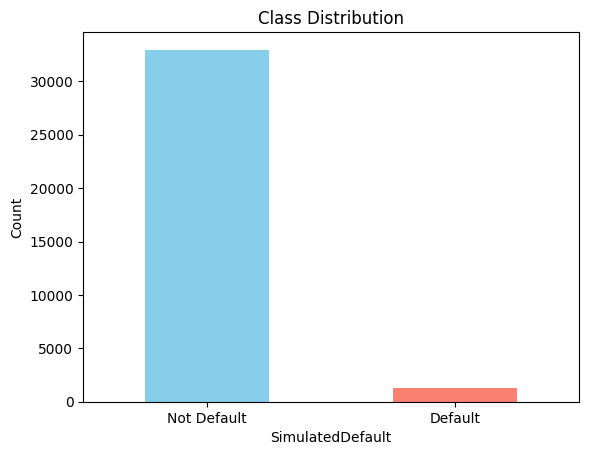

In [81]:
import matplotlib.pyplot as plt

df['SimulatedDefault'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title("Class Distribution")
plt.xticks([0, 1], ['Not Default', 'Default'], rotation=0)
plt.ylabel("Count")
plt.show()

In [82]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

# Step 2: Prepare data for classification
target = 'SimulatedDefault'
X = df.drop(columns=[target])
y = df[target]

# Separate columns by data type
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
# categorical_features = X.select_dtypes(include=['object']).columns.tolist()

# Build preprocessing for numerical and categorical features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# categorical_transformer = Pipeline(steps=[
#     ('imputer', SimpleImputer(strategy='most_frequent')),
#     ('encoder', OneHotEncoder(handle_unknown='ignore', sparse=False))])


preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)
        # 'cat', categorical_transformer, categorical_features)
    ]
)

# Split the data into train and test sets
X_train_raw, X_test_raw, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Apply preprocessing
X_train = preprocessor.fit_transform(X_train_raw)
X_test = preprocessor.transform(X_test_raw)

X_train.shape, X_test.shape

((27418, 38), (6855, 38))

In [83]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
print(y_train_resampled.value_counts())

SimulatedDefault
1    26364
0    26364
Name: count, dtype: int64


In [88]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


# Features: use only numerical columns, drop target
X = df.select_dtypes(include=['int64', 'float64']).drop(columns=['SimulatedDefault'])
y = df['SimulatedDefault']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# model=LogisticRegression()
# Logistic Regression + Hyperparameter Tuning
log_reg = LogisticRegression(solver='liblinear')
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}

#Grid search with 5-fold CV
grid = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy')
grid.fit(X_train_scaled, y_train)
model.fit(X_train_scaled, y_train)

# Predict + Evaluate
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test_scaled)
# y_pred = model.predict(X_test_scaled)

print("Best Hyperparameters:", grid.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Best Hyperparameters: {'C': 100, 'penalty': 'l1'}
Accuracy: 0.9808898614150255
Confusion Matrix:
 [[6549   43]
 [  88  175]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      6592
           1       0.80      0.67      0.73       263

    accuracy                           0.98      6855
   macro avg       0.89      0.83      0.86      6855
weighted avg       0.98      0.98      0.98      6855



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline



selected_features = ['LoanCharacteristicsID', 'Bank', 'CensusTractMinorityRatioPercent',
                     'TotalMonthlyIncomeAmount', 'LTVRatioPercent', 'NoteDate',
                     'MortgageType', 'ScheduledTotalPaymentCount', 'TotalDebtExpenseRatioPercent',
                     'Borrower1AgeAtApplicationYears', 'PropertyUsageType', 'NoteAmount',
                     'HousingExpenseRatioPercent', 'Borrower1CreditScoreValue',
                     'Borrower2CreditScoreValue', 'Borrower2Race2Type' ]
# Step 2: Select features

X = df[selected_features]
y = df['SimulatedDefault']

# Step 3: Drop missing values
X = X.dropna()
y = y.loc[X.index]

# Step 4: Split the data (stratified)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Step 5: Build a pipeline with SMOTE, scaling, and logistic regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42)),
    ('logreg', LogisticRegression(max_iter=1000, random_state=42))
])

# Step 6: Hyperparameter tuning using GridSearchCV
param_grid = {
    'logreg__C': [0.01, 0.1, 1, 10, 100],
    'logreg__penalty': ['l1', 'l2'],
    'logreg__solver': ['liblinear']  # 'liblinear' supports both l1 and l2
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid = GridSearchCV(pipeline, param_grid, cv=cv, scoring='roc_auc', n_jobs=-1)
grid.fit(X_train, y_train)

# Step 7: Best model evaluation
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]

# Step 8: Evaluation metrics
print("🔍 Best Parameters:", grid.best_params_)
print("\n✅ Accuracy:", accuracy_score(y_test, y_pred))
print("📉 ROC AUC Score:", roc_auc_score(y_test, y_proba))
print("\n🔎 Classification Report:\n", classification_report(y_test, y_pred))
print("\n📊 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Step 9: Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Default', 'Default'], yticklabels=['Not Default', 'Default'])
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

In [ ]:
pip install imblearn

In [ ]:
from sklearn.svm import SVC
from imblearn.pipeline import Pipeline

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score

# SVM pipeline with SMOTE and scaling
svm_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42)),
    ('svm', SVC(probability=True, random_state=42))
])

# Hyperparameters
svm_params = {
    'svm__C': [0.1, 1, 10],
    'svm__kernel': ['linear', 'rbf'],
    'svm__gamma': ['scale', 'auto']
}

# Cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

svm_grid = GridSearchCV(svm_pipeline, svm_params, cv=cv, scoring='roc_auc', n_jobs=-1)
svm_grid.fit(X_train, y_train)

# Evaluation
best_svm = svm_grid.best_estimator_
y_pred_svm = best_svm.predict(X_test)
y_proba_svm = best_svm.predict_proba(X_test)[:, 1]

print("🔍 Best SVM Params:", svm_grid.best_params_)
print("✅ Accuracy:", accuracy_score(y_test, y_pred_svm))
print("📉 ROC AUC Score:", roc_auc_score(y_test, y_proba_svm))
print("\n🔎 Classification Report:\n", classification_report(y_test, y_pred_svm))

# Confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt='d', cmap='Purples',
            xticklabels=['Not Default', 'Default'], yticklabels=['Not Default', 'Default'])
plt.title("Confusion Matrix - SVM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest pipeline
rf_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42)),
    ('rf', RandomForestClassifier(random_state=42))
])

# Hyperparameters
rf_params = {
    'rf__n_estimators': [100, 200],
    'rf__max_depth': [None, 10, 20],
    'rf__min_samples_split': [2, 5]
}

rf_grid = GridSearchCV(rf_pipeline, rf_params, cv=cv, scoring='roc_auc', n_jobs=-1)
rf_grid.fit(X_train, y_train)

# Evaluation
best_rf = rf_grid.best_estimator_
y_pred_rf = best_rf.predict(X_test)
y_proba_rf = best_rf.predict_proba(X_test)[:, 1]

print("🔍 Best RF Params:", rf_grid.best_params_)
print("✅ Accuracy:", accuracy_score(y_test, y_pred_rf))
print("📉 ROC AUC Score:", roc_auc_score(y_test, y_proba_rf))
print("\n🔎 Classification Report:\n", classification_report(y_test, y_pred_rf))

# Confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Greens',
            xticklabels=['Not Default', 'Default'], yticklabels=['Not Default', 'Default'])
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# Anomaly Detection

In [93]:
from sklearn.ensemble import IsolationForest

In [98]:


# Selected features from your project
selected_features = ['LoanCharacteristicsID', 'Bank', 'CensusTractMinorityRatioPercent',
                     'TotalMonthlyIncomeAmount', 'LTVRatioPercent', 'NoteDate',
                     'MortgageType', 'ScheduledTotalPaymentCount',
                     'Borrower1AgeAtApplicationYears', 'PropertyUsageType', 'NoteAmount',
                     'HousingExpenseRatioPercent', 'Borrower1CreditScoreValue',
                     'Borrower2CreditScoreValue', 'Borrower2Race2Type',
                     'NoteRatePercent', 'SimulatedDefault']

df_anomaly = df[selected_features].copy()


In [99]:
# Loan to Income ratio
df_anomaly["LoanToIncomeRatio"] = df_anomaly["NoteAmount"] / (df_anomaly["TotalMonthlyIncomeAmount"] + 1)

# Interaction terms
df_anomaly["LTV_CreditScore"] = df_anomaly["LTVRatioPercent"] * df_anomaly["Borrower1CreditScoreValue"]
df_anomaly["Age_LoanAmount"] = df_anomaly["Borrower1AgeAtApplicationYears"] * df_anomaly["NoteAmount"]

# Flag extreme values (could be used later)
df_anomaly["LowCreditScoreFlag"] = (df_anomaly["Borrower1CreditScoreValue"] < 500).astype(int)

# Avoid divide-by-zero or inf
df_anomaly.replace([np.inf, -np.inf], np.nan, inplace=True)


In [100]:
# Build preprocessing pipeline
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), selected_features),
    
])

In [104]:
# Create preprocessing + anomaly detection pipeline
pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('iso_forest', IsolationForest(n_estimators=100, contamination=0.02, random_state=42))
])

# Fit the pipeline
pipeline.fit(df_anomaly)

# Predict anomalies (-1 = anomaly, 1 = normal)
df_anomaly['Anomaly_Label'] = pipeline.predict(df_anomaly)


Anomaly_Label
 1    33587
-1      686
Name: count, dtype: int64


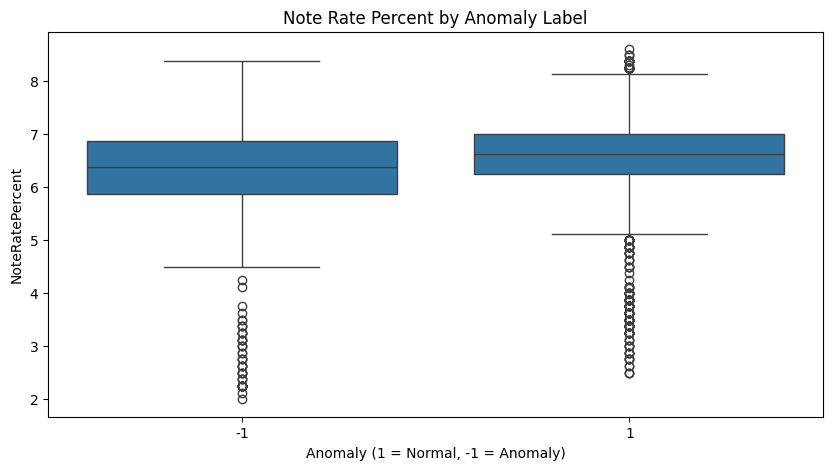

       LoanCharacteristicsID  Bank  CensusTractMinorityRatioPercent  \
13923                2774134     4                           25.941   
15888                2751454     5                           95.283   
19312                2766117     5                            4.394   
18532                2765337     5                            7.049   
22132                2780898     5                            9.996   
21562                2780328     5                           25.097   
21116                2779882     5                           12.088   
31778                2808957     9                           13.313   
30337                2781864     9                           26.113   
9352                 2779115     2                           40.437   

       TotalMonthlyIncomeAmount  LTVRatioPercent  NoteDate  MortgageType  \
13923                     99226             59.0      2023             0   
15888                     68955             85.0      2023        

In [109]:
# Summary of anomalies
print(df_anomaly["Anomaly_Label"].value_counts())

# Visualize Note Rate Percent distribution
plt.figure(figsize=(10, 5))
sns.boxplot(x="Anomaly_Label", y="NoteRatePercent", data=df_anomaly)
plt.title("Note Rate Percent by Anomaly Label")
plt.xlabel("Anomaly (1 = Normal, -1 = Anomaly)")
plt.show()

# Show top anomalies
top_anomalies = df_anomaly[df_anomaly["Anomaly_Label"] == -1].sort_values(by="NoteAmount", ascending=False)
print(top_anomalies.head(10))


visualisation for above

In [115]:
df["Anomaly_Label"] = df["Anomaly_Label"].astype(int)


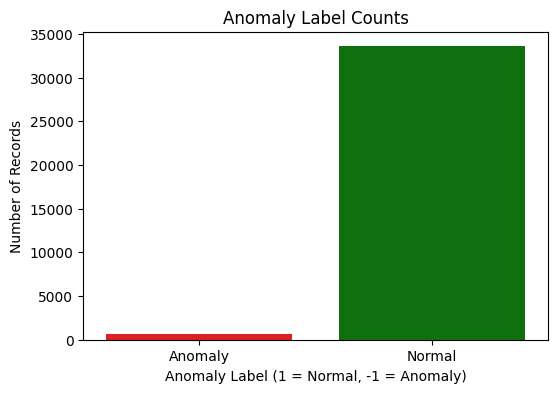

In [117]:
plt.figure(figsize=(6, 4))
sns.countplot(x="Anomaly_Label", data=df_anomaly, palette={"1": "green", "-1": "red"})
plt.title("Anomaly Label Counts")
plt.xlabel("Anomaly Label (1 = Normal, -1 = Anomaly)")
plt.ylabel("Number of Records")
plt.xticks([0, 1], labels=["Anomaly", "Normal"])
plt.show()


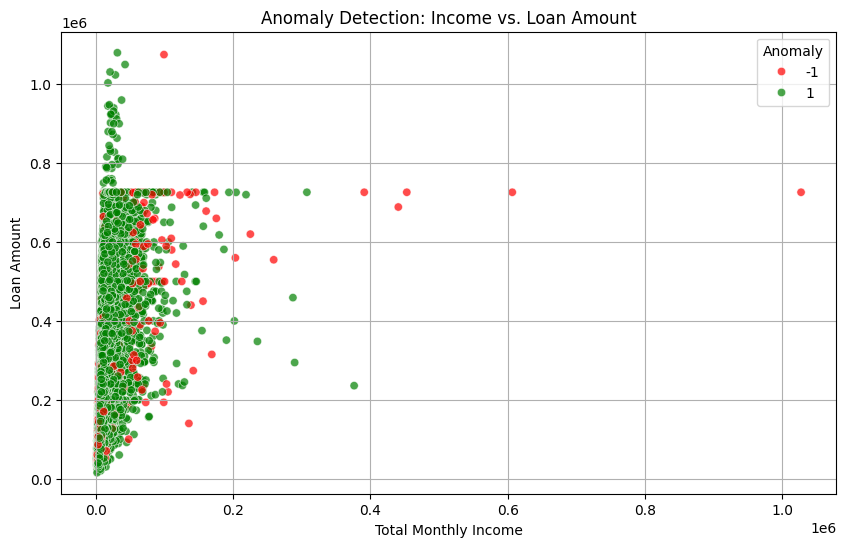

In [112]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x="TotalMonthlyIncomeAmount", 
    y="NoteAmount", 
    hue="Anomaly_Label", 
    palette={1: "green", -1: "red"},
    data=df_anomaly,
    alpha=0.7
)
plt.title("Anomaly Detection: Income vs. Loan Amount")
plt.xlabel("Total Monthly Income")
plt.ylabel("Loan Amount")
plt.legend(title="Anomaly")
plt.grid(True)
plt.show()


In [120]:
import matplotlib.pyplot as plt
import seaborn as sns

def visualize_anomalies(df_anomaly, label_col="Anomaly_Label"):
    """
    Generates multiple visualizations to interpret anomalies detected via Isolation Forest.

    Parameters:
        df (pd.DataFrame): The dataset containing anomaly labels and relevant features.
        label_col (str): The name of the column containing anomaly labels (-1 = anomaly, 1 = normal)
    """

    # Ensure Anomaly_Label is integer
    df_anomaly[label_col] = df_anomaly[label_col].astype(int)

    # Set plot style
    sns.set(style="whitegrid")

    # 1. Count of Anomalies
    plt.figure(figsize=(6, 4))
    sns.countplot(x=label_col, data=df_anomaly, palette={"1": "green", "-1": "red"})
    plt.title("Anomaly Label Counts")
    plt.xlabel("Anomaly Label (1 = Normal, -1 = Anomaly)")
    plt.ylabel("Number of Records")
    plt.xticks([0, 1], labels=["Anomaly", "Normal"])
    plt.show()

    # 2. Boxplots for important numeric features
    # features = [
    #     "NoteRatePercent", "NoteAmount", "TotalMonthlyIncomeAmount",
    #     "LoanToIncomeRatio", "Borrower1CreditScoreValue", "LTVRatioPercent"
    # ]
    
    # for feature in features:
    #     if feature in df.columns:
    #         plt.figure(figsize=(8, 5))
    #         sns.boxplot(x=label_col, y=feature, data=df, palette={1: "skyblue", -1: "salmon"})
    #         plt.title(f"{feature} Distribution by Anomaly Label")
    #         plt.xlabel("Anomaly Label (1 = Normal, -1 = Anomaly)")
    #         plt.ylabel(feature)
    #         plt.grid(True)
    #         plt.show()



    scatter_comparisons = [
        ("TotalMonthlyIncomeAmount", "NoteAmount"),
        ("Borrower1CreditScoreValue", "SimulatedDefault"),
        ("LTVRatioPercent", "SimulatedDefault"),
        ("LoanToIncomeRatio", "SimulatedDefault"),
        ("HousingExpenseRatioPercent", "SimulatedDefault"),
        ("Borrower1CreditScoreValue", "NoteAmount")
    ]

    for x_feature, y_feature in scatter_comparisons:
        if x_feature in df_anomaly.columns and y_feature in df_anomaly.columns:
            plt.figure(figsize=(10, 6))
            sns.scatterplot(
                x=x_feature, y=y_feature,
                hue=label_col, palette={1: "green", -1: "red"},
                data=df_anomaly, alpha=0.6
            )
            plt.title(f"{y_feature} vs. {x_feature} (Anomalies Highlighted)")
            plt.xlabel(x_feature)
            plt.ylabel(y_feature)
            plt.legend(title="Anomaly Label (1 = Normal, -1 = Anomaly)")
            plt.grid(True)
            plt.show()


    # # 3. Scatter Plot: Income vs Loan Amount
    # if "TotalMonthlyIncomeAmount" in df.columns and "NoteAmount" in df.columns:
    #     plt.figure(figsize=(10, 6))
    #     sns.scatterplot(
    #         x="TotalMonthlyIncomeAmount", y="NoteAmount",
    #         hue=label_col, palette={1: "green", -1: "red"},
    #         data=df, alpha=0.6
    #     )
    #     plt.title("Income vs Loan Amount (Anomalies Highlighted)")
    #     plt.xlabel("Total Monthly Income")
    #     plt.ylabel("Note Amount")
    #     plt.legend(title="Anomaly")
    #     plt.grid(True)
    #     plt.show()

    # # 4. Scatter Plot: Credit Score vs Note Rate
    # if "Borrower1CreditScoreValue" in df.columns and "NoteRatePercent" in df.columns:
    #     plt.figure(figsize=(10, 6))
    #     sns.scatterplot(
    #         x="Borrower1CreditScoreValue", y="NoteRatePercent",
    #         hue=label_col, palette={1: "blue", -1: "orange"},
    #         data=df, alpha=0.6
    #     )
    #     plt.title("Credit Score vs Note Rate (Anomalies Highlighted)")
    #     plt.xlabel("Borrower 1 Credit Score")
    #     plt.ylabel("Note Rate Percent")
    #     plt.grid(True)
    #     plt.show()

    # 5. Histogram of NoteRatePercent by anomaly label
    if "NoteRatePercent" in df.columns:
        plt.figure(figsize=(10, 6))
        sns.histplot(
            data=df_anomaly, x="NoteRatePercent", hue=label_col,
            kde=True, palette={1: "skyblue", -1: "red"}, bins=30
        )
        plt.title("Distribution of Note Rate Percent by Anomaly Label")
        plt.xlabel("Note Rate Percent")
        plt.ylabel("Frequency")
        plt.show()

    print("✅ All visualizations generated successfully.")


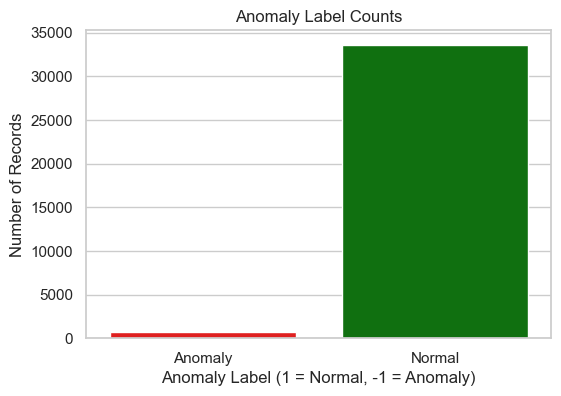

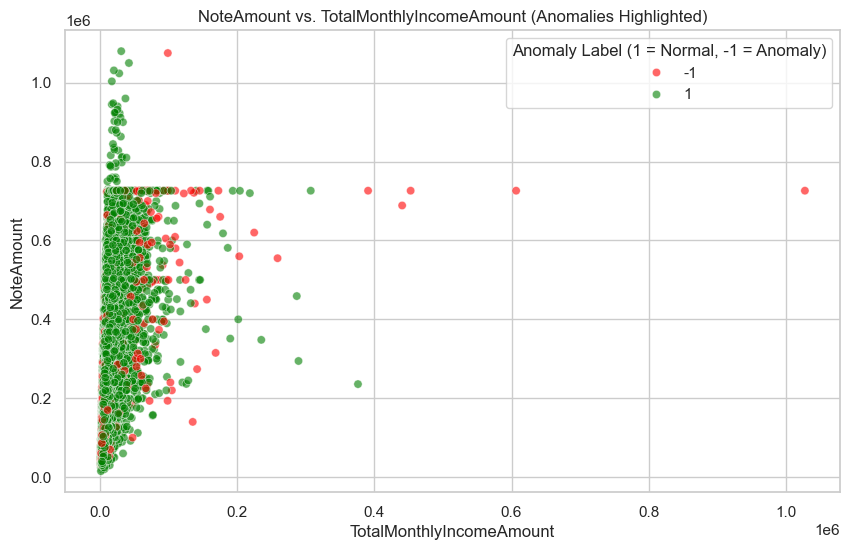

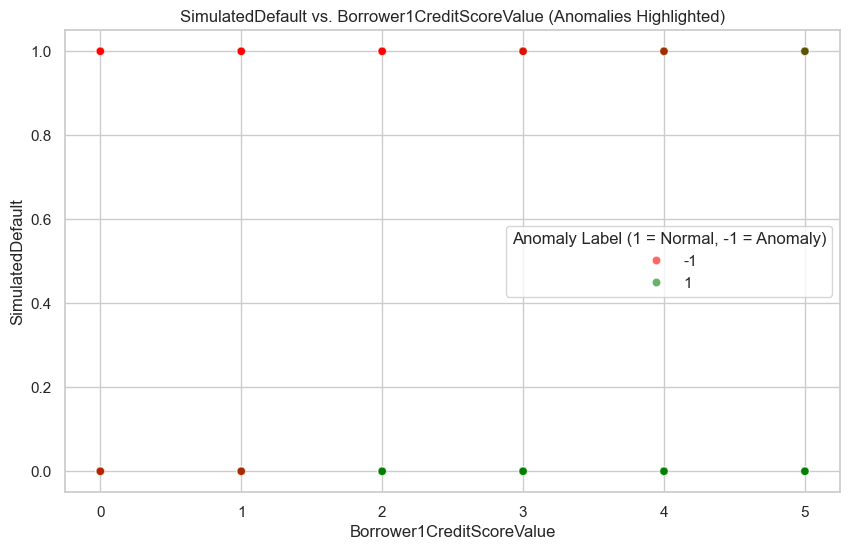

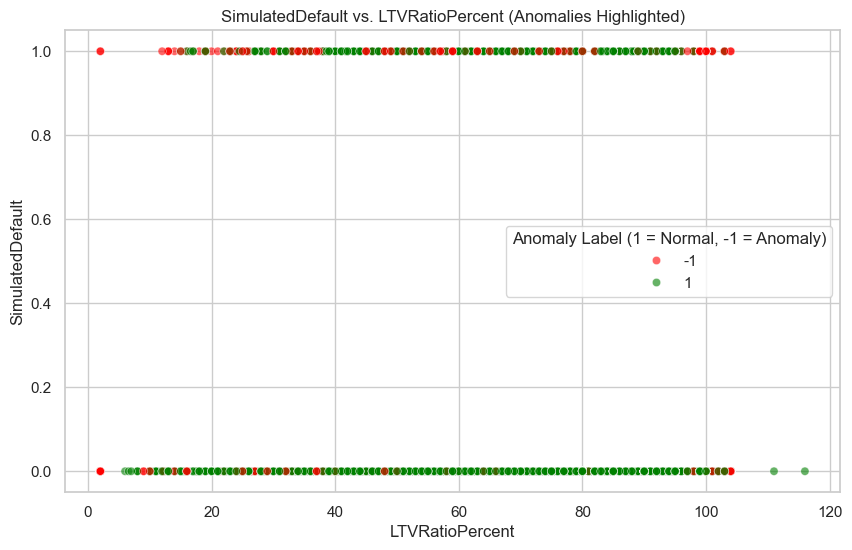

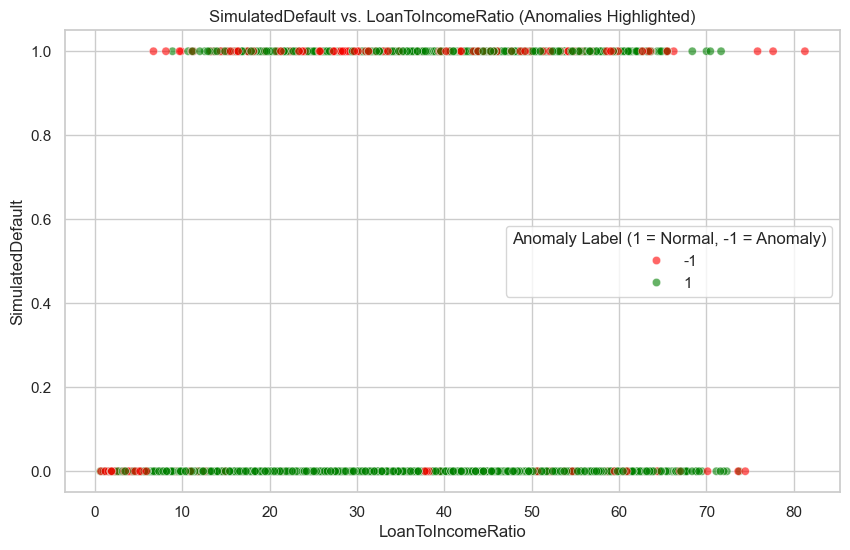

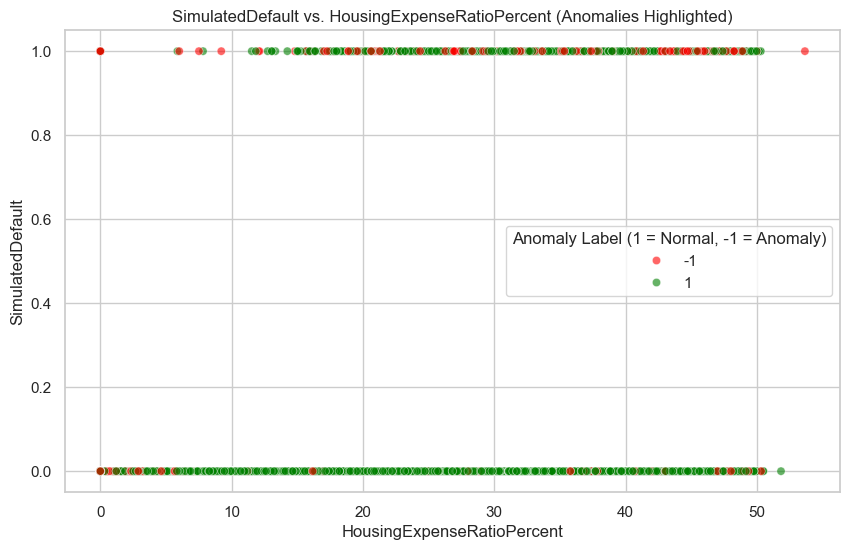

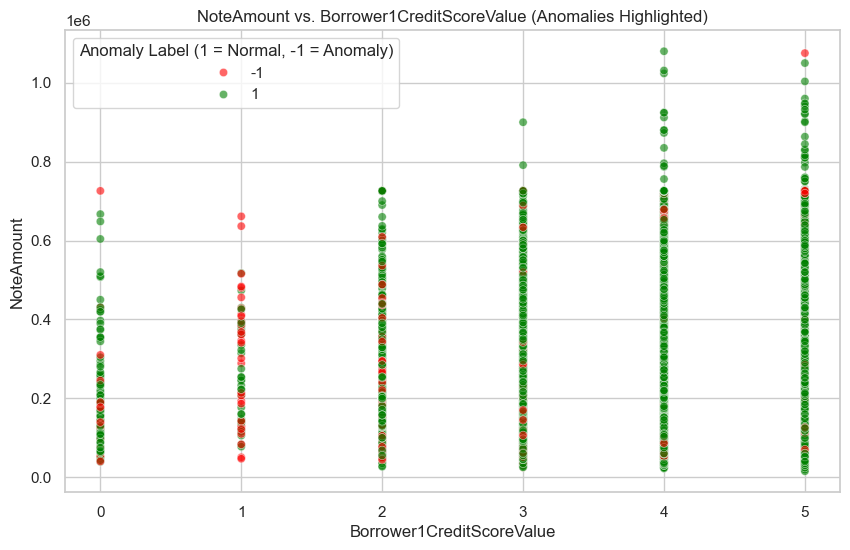

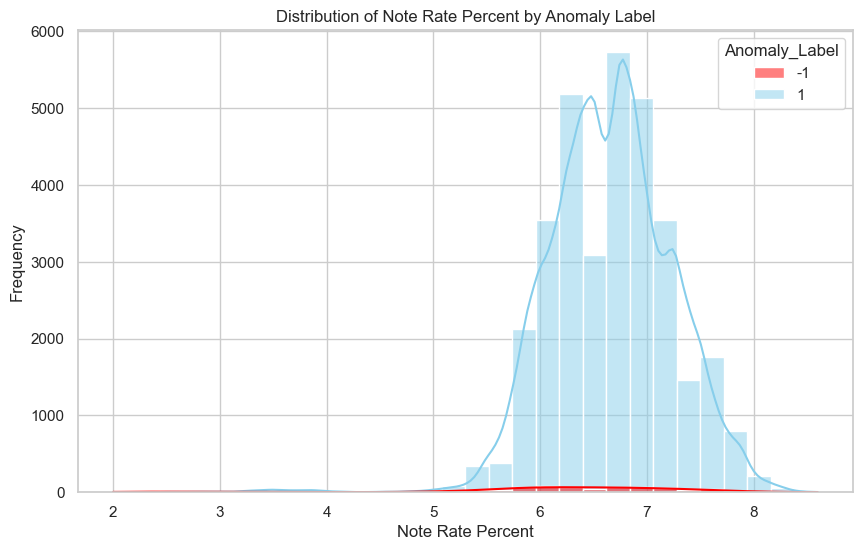

✅ All visualizations generated successfully.


In [121]:
visualize_anomalies(df_anomaly)

In [138]:
df_anomaly["Borrower1CreditScoreValue"].value_counts()



Borrower1CreditScoreValue
5    20190
4    10379
3     2747
2      760
0      130
1       67
Name: count, dtype: int64

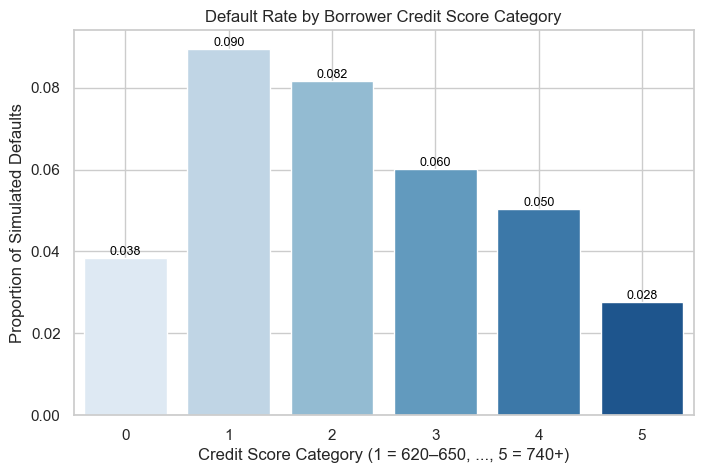

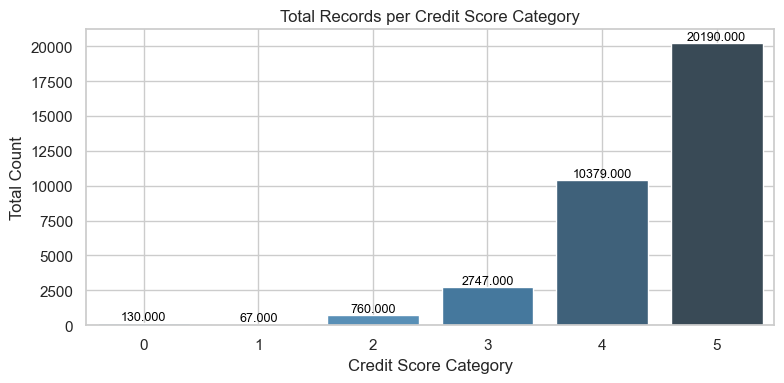

In [135]:
plt.figure(figsize=(8, 5))
ax=sns.barplot(
    x="Borrower1CreditScoreValue", 
    y="SimulatedDefault", 
    data=df_anomaly, 
    ci=None, palette="Blues"
)
plt.title("Default Rate by Borrower Credit Score Category")
plt.xlabel("Credit Score Category (1 = 620–650, ..., 5 = 740+)")
plt.ylabel("Proportion of Simulated Defaults")
plt.grid(True)
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(
            f'{height:.3f}', 
            (p.get_x() + p.get_width() / 2, height), 
            ha='center', 
            va='bottom',
            fontsize=9,
            color='black'
        )
plt.show()


plt.figure(figsize=(8, 4))
ax2 = sns.barplot(
    x=df_anomaly["Borrower1CreditScoreValue"].value_counts().index, 
    y=df_anomaly["Borrower1CreditScoreValue"].value_counts().values, 
    palette="Blues_d"
)

plt.title("Total Records per Credit Score Category")
plt.xlabel("Credit Score Category")
plt.ylabel("Total Count")
plt.grid(True)

for p in ax2.patches:
    height = p.get_height()
    if height > 0:
        ax2.annotate(
            f'{height:.3f}',
            (p.get_x() + p.get_width() / 2, height), 
            ha='center', 
            va='bottom',
            fontsize=9,
            color='black'
        )

plt.tight_layout()
plt.show()

Y-axis = percentage of defaults within each credit score group.

we can observe higher default rates in 4th and 5th categories.

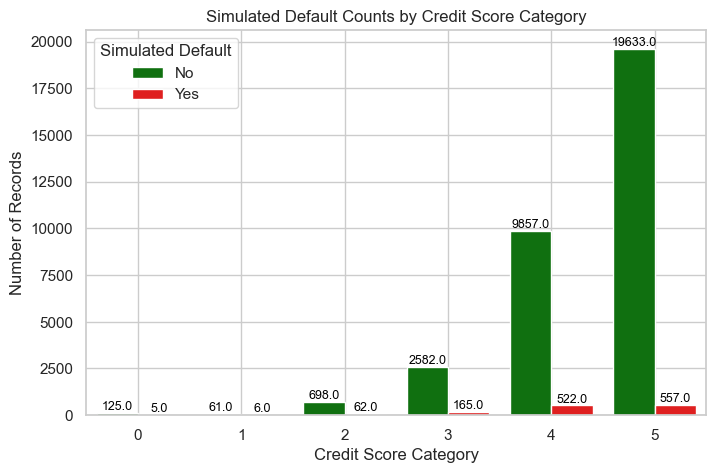

In [126]:
plt.figure(figsize=(8, 5))
ax=sns.countplot(
    x="Borrower1CreditScoreValue", 
    hue="SimulatedDefault", 
    data=df_anomaly, palette={0: "green", 1: "red"}
)
plt.title("Simulated Default Counts by Credit Score Category")
plt.xlabel("Credit Score Category")
plt.ylabel("Number of Records")
plt.legend(title="Simulated Default", labels=["No", "Yes"])
plt.grid(True)
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(
            f'{height}', 
            (p.get_x() + p.get_width() / 2, height), 
            ha='center', 
            va='bottom',
            fontsize=9,
            color='black'
        )

plt.show()


In [122]:
# Percentage of anomalies that are defaults
default_rate_anomalies = df_anomaly[df_anomaly["Anomaly_Label"] == -1]["SimulatedDefault"].mean()
default_rate_normal = df_anomaly[df_anomaly["Anomaly_Label"] == 1]["SimulatedDefault"].mean()

print(f"Default Rate (Anomalies): {default_rate_anomalies:.2%}")
print(f"Default Rate (Normal): {default_rate_normal:.2%}")


Default Rate (Anomalies): 31.49%
Default Rate (Normal): 3.28%


If default_rate_anomalies is significantly higher it proves Isolation Forest is doing a great job surfacing risky loans. We can also observe that nearly 32% of the people who are being flagged are going to default. This adds explainability to the anomaly detection output.

